In [1]:
# import python pieces
import os
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp



[utils](#utils)

### maps available

In [5]:
ls "/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/sims_maps/2017.05.08-4-gac432e6/"


DustMaps/  README.md  StarMaps/  TriMaps/  notebooks/  tests/  ups/


In [9]:
ls "/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/sims_maps/2017.05.08-4-gac432e6/StarMaps/"


starDensity_g_nside_64.npz          starDensity_u_nside_64.npz
starDensity_g_wdstars_nside_64.npz  starDensity_u_wdstars_nside_64.npz
starDensity_i_nside_64.npz          starDensity_y_nside_64.npz
starDensity_i_wdstars_nside_64.npz  starDensity_y_wdstars_nside_64.npz
starDensity_r_nside_64.npz          starDensity_z_nside_64.npz
starDensity_r_wdstars_nside_64.npz  starDensity_z_wdstars_nside_64.npz


In [13]:
ls "/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/sims_maps/2017.05.08-4-gac432e6/TriMaps/"


TRIstarDensity_g_nside_128.npz  TRIstarDensity_u_nside_128.npz
TRIstarDensity_g_nside_64.npz   TRIstarDensity_u_nside_64.npz
TRIstarDensity_i_nside_128.npz  TRIstarDensity_y_nside_128.npz
TRIstarDensity_i_nside_64.npz   TRIstarDensity_y_nside_64.npz
TRIstarDensity_r_nside_128.npz  TRIstarDensity_z_nside_128.npz
TRIstarDensity_r_nside_64.npz   TRIstarDensity_z_nside_64.npz


In [14]:
ls "/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/sims_maps/2017.05.08-4-gac432e6/DustMaps/"


SFD_dust_4096_ngp.fits  dust_nside_16.npz   dust_nside_4.npz
SFD_dust_4096_sgp.fits  dust_nside_2.npz    dust_nside_512.npz
dust_nside_1024.npz     dust_nside_256.npz  dust_nside_64.npz
dust_nside_128.npz      dust_nside_32.npz   dust_nside_8.npz


### prepare Fields.csv

In [102]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)



In [103]:
Fields = pd.DataFrame()
Fields['pixId'] = np.arange(NPIX)
Fields['fieldRa'], Fields['fieldDec'] = pix2radec(nside=NSIDE, ipix=Fields['pixId'].values )
Fields['fieldGl'], Fields['fieldGb'] = radec2gal(ra=Fields['fieldRa'].values, dec=Fields['fieldDec'].values)
Fields['fieldEl'], Fields['fieldEb'] = radec2ecliptic(ra=Fields['fieldRa'].values, dec=Fields['fieldDec'].values)



### load star map

In [98]:
starmap = load_starmap(flt='r', mapname='star')
nside = 64
NPIX = hp.nside2npix(nside)
pixIds = np.arange(NPIX)



load map  starDensity_r_nside_64.npz


In [99]:
starDens = []
for pid in pixIds:
    ra, dec = pix2radec(nside=nside, ipix=pid)
    den = get_starDensity(ra=ra, dec=dec, starMap=starmap)
    starDens.append(den)
    print(pid, ra, dec, den)
starDens = np.array(starDens)
#np.savez('starDens16.npz', starDens=starDens)



0 45.0 89.2690292915739 0
1 135.0 89.2690292915739 0
2 225.0 89.2690292915739 0
3 315.0 89.2690292915739 0
4 22.5 88.5380288373519 0
5 67.5 88.5380288373519 0
6 112.5 88.5380288373519 0
7 157.5 88.5380288373519 0
8 202.5 88.5380288373519 0
9 247.49999999999997 88.5380288373519 0
10 292.5 88.5380288373519 0
11 337.5 88.5380288373519 0
12 14.999999999999998 87.80696888064219 0
13 45.0 87.80696888064219 0
14 75.0 87.80696888064219 0
15 105.0 87.80696888064219 0
16 135.0 87.80696888064219 0
17 165.0 87.80696888064219 0
18 195.0 87.80696888064219 0
19 224.99999999999997 87.80696888064219 0
20 255.00000000000003 87.80696888064219 0
21 285.0 87.80696888064219 0
22 315.0 87.80696888064219 0
23 344.99999999999994 87.80696888064219 0
24 11.25 87.07581964294997 0
25 33.75 87.07581964294997 0
26 56.25 87.07581964294997 0
27 78.75 87.07581964294997 0
28 101.25 87.07581964294997 0
29 123.74999999999999 87.07581964294997 0
30 146.25 87.07581964294997 0
31 168.75 87.07581964294997 0
32 191.25 87.07581

244 200.45454545454544 81.95276407098082 0
245 208.63636363636363 81.95276407098082 0
246 216.8181818181818 81.95276407098082 0
247 225.00000000000003 81.95276407098082 0
248 233.1818181818182 81.95276407098082 0
249 241.36363636363635 81.95276407098082 0
250 249.54545454545453 81.95276407098082 0
251 257.72727272727275 81.95276407098082 0
252 265.9090909090909 81.95276407098082 0
253 274.09090909090907 81.95276407098082 0
254 282.2727272727273 81.95276407098082 0
255 290.45454545454544 81.95276407098082 0
256 298.6363636363636 81.95276407098082 0
257 306.8181818181818 81.95276407098082 0
258 315.0 81.95276407098082 0
259 323.1818181818182 81.95276407098082 0
260 331.3636363636364 81.95276407098082 0
261 339.54545454545456 81.95276407098082 0
262 347.7272727272727 81.95276407098082 0
263 355.9090909090909 81.95276407098082 0
264 3.7499999999999996 81.21982231598935 0
265 11.25 81.21982231598935 0
266 18.75 81.21982231598935 0
267 26.25 81.21982231598935 0
268 33.75 81.21982231598935 0


460 243.0 79.0187139489105 0
461 249.00000000000003 79.0187139489105 0
462 255.00000000000003 79.0187139489105 0
463 261.0 79.0187139489105 0
464 267.00000000000006 79.0187139489105 0
465 273.0 79.0187139489105 0
466 279.0 79.0187139489105 0
467 285.00000000000006 79.0187139489105 0
468 290.99999999999994 79.0187139489105 0
469 297.0 79.0187139489105 0
470 303.0 79.0187139489105 0
471 308.99999999999994 79.0187139489105 0
472 315.0 79.0187139489105 0
473 321.0 79.0187139489105 0
474 326.99999999999994 79.0187139489105 0
475 333.0 79.0187139489105 0
476 339.0 79.0187139489105 0
477 345.0 79.0187139489105 0
478 351.0 79.0187139489105 0
479 357.0 79.0187139489105 0
480 2.8125 78.28414760510762 0
481 8.4375 78.28414760510762 0
482 14.0625 78.28414760510762 0
483 19.6875 78.28414760510762 0
484 25.3125 78.28414760510762 0
485 30.937499999999996 78.28414760510762 0
486 36.5625 78.28414760510762 0
487 42.1875 78.28414760510762 0
488 47.8125 78.28414760510762 0
489 53.4375 78.28414760510762 0


687 16.57894736842105 76.07742270175356 0
688 21.31578947368421 76.07742270175356 0
689 26.052631578947366 76.07742270175356 0
690 30.78947368421053 76.07742270175356 0
691 35.526315789473685 76.07742270175356 0
692 40.26315789473685 76.07742270175356 0
693 45.0 76.07742270175356 0
694 49.73684210526316 76.07742270175356 0
695 54.47368421052631 76.07742270175356 0
696 59.21052631578947 76.07742270175356 0
697 63.94736842105264 76.07742270175356 0
698 68.6842105263158 76.07742270175356 0
699 73.42105263157895 76.07742270175356 0
700 78.15789473684211 76.07742270175356 0
701 82.89473684210526 76.07742270175356 0
702 87.63157894736842 76.07742270175356 0
703 92.36842105263158 76.07742270175356 0
704 97.10526315789473 76.07742270175356 0
705 101.84210526315789 76.07742270175356 0
706 106.57894736842105 76.07742270175356 0
707 111.31578947368422 76.07742270175356 0
708 116.05263157894737 76.07742270175356 0
709 120.7894736842105 76.07742270175356 0
710 125.52631578947368 76.07742270175356 0

901 263.57142857142856 74.60343607627445 0
902 267.85714285714283 74.60343607627445 0
903 272.1428571428571 74.60343607627445 0
904 276.42857142857144 74.60343607627445 0
905 280.7142857142857 74.60343607627445 0
906 285.0 74.60343607627445 0
907 289.2857142857143 74.60343607627445 0
908 293.5714285714286 74.60343607627445 0
909 297.85714285714283 74.60343607627445 0
910 302.14285714285717 74.60343607627445 0
911 306.42857142857144 74.60343607627445 0
912 310.7142857142857 74.60343607627445 0
913 315.0 74.60343607627445 0
914 319.2857142857143 74.60343607627445 0
915 323.57142857142856 74.60343607627445 0
916 327.85714285714283 74.60343607627445 0
917 332.14285714285717 74.60343607627445 0
918 336.4285714285714 74.60343607627445 0
919 340.7142857142857 74.60343607627445 0
920 345.0 74.60343607627445 0
921 349.2857142857143 74.60343607627445 0
922 353.5714285714285 74.60343607627445 0
923 357.8571428571429 74.60343607627445 0
924 2.0454545454545454 73.86549608859848 0
925 6.136363636363

1095 326.7391304347826 73.12688191450309 0
1096 330.6521739130435 73.12688191450309 0
1097 334.5652173913044 73.12688191450309 0
1098 338.4782608695652 73.12688191450309 0
1099 342.39130434782606 73.12688191450309 0
1100 346.304347826087 73.12688191450309 0
1101 350.2173913043478 73.12688191450309 0
1102 354.1304347826087 73.12688191450309 0
1103 358.0434782608695 73.12688191450309 0
1104 1.8749999999999998 72.38756092964962 0
1105 5.625 72.38756092964962 0
1106 9.375 72.38756092964962 0
1107 13.125 72.38756092964962 0
1108 16.875 72.38756092964962 0
1109 20.625 72.38756092964962 0
1110 24.375 72.38756092964962 0
1111 28.124999999999996 72.38756092964962 0
1112 31.875000000000004 72.38756092964962 0
1113 35.625 72.38756092964962 0
1114 39.375 72.38756092964962 0
1115 43.12499999999999 72.38756092964962 0
1116 46.87500000000001 72.38756092964962 0
1117 50.625 72.38756092964962 0
1118 54.375 72.38756092964962 0
1119 58.125 72.38756092964962 0
1120 61.87500000000001 72.38756092964962 0
11

1323 81.34615384615385 70.90666664467562 0
1324 84.8076923076923 70.90666664467562 0
1325 88.26923076923076 70.90666664467562 0
1326 91.73076923076924 70.90666664467562 0
1327 95.1923076923077 70.90666664467562 0
1328 98.65384615384615 70.90666664467562 0
1329 102.11538461538461 70.90666664467562 0
1330 105.57692307692308 70.90666664467562 0
1331 109.03846153846155 70.90666664467562 0
1332 112.5 70.90666664467562 0
1333 115.96153846153847 70.90666664467562 0
1334 119.42307692307692 70.90666664467562 0
1335 122.88461538461539 70.90666664467562 0
1336 126.34615384615384 70.90666664467562 0
1337 129.8076923076923 70.90666664467562 0
1338 133.26923076923077 70.90666664467562 0
1339 136.73076923076925 70.90666664467562 0
1340 140.1923076923077 70.90666664467562 0
1341 143.65384615384616 70.90666664467562 0
1342 147.1153846153846 70.90666664467562 0
1343 150.57692307692307 70.90666664467562 0
1344 154.03846153846155 70.90666664467562 0
1345 157.5 70.90666664467562 0
1346 160.96153846153845 7

1521 30.535714285714285 69.4225464945822 0
1522 33.75 69.4225464945822 0
1523 36.964285714285715 69.4225464945822 0
1524 40.17857142857143 69.4225464945822 0
1525 43.392857142857146 69.4225464945822 0
1526 46.607142857142854 69.4225464945822 0
1527 49.82142857142857 69.4225464945822 0
1528 53.035714285714285 69.4225464945822 0
1529 56.25 69.4225464945822 0
1530 59.464285714285715 69.4225464945822 0
1531 62.67857142857143 69.4225464945822 0
1532 65.89285714285714 69.4225464945822 0
1533 69.10714285714286 69.4225464945822 0
1534 72.32142857142857 69.4225464945822 0
1535 75.53571428571429 69.4225464945822 0
1536 78.75 69.4225464945822 0
1537 81.96428571428571 69.4225464945822 0
1538 85.17857142857143 69.4225464945822 0
1539 88.39285714285714 69.4225464945822 0
1540 91.60714285714286 69.4225464945822 0
1541 94.82142857142857 69.4225464945822 0
1542 98.03571428571429 69.4225464945822 0
1543 101.25 69.4225464945822 0
1544 104.46428571428571 69.4225464945822 0
1545 107.67857142857143 69.42254

1717 290.1724137931035 68.67919198537577 0
1718 293.2758620689655 68.67919198537577 0
1719 296.3793103448276 68.67919198537577 0
1720 299.48275862068965 68.67919198537577 0
1721 302.58620689655174 68.67919198537577 0
1722 305.6896551724137 68.67919198537577 0
1723 308.7931034482759 68.67919198537577 0
1724 311.8965517241379 68.67919198537577 0
1725 315.0 68.67919198537577 0
1726 318.10344827586204 68.67919198537577 0
1727 321.2068965517241 68.67919198537577 0
1728 324.3103448275862 68.67919198537577 0
1729 327.41379310344826 68.67919198537577 0
1730 330.51724137931035 68.67919198537577 0
1731 333.6206896551724 68.67919198537577 0
1732 336.7241379310345 68.67919198537577 0
1733 339.82758620689657 68.67919198537577 0
1734 342.93103448275866 68.67919198537577 0
1735 346.0344827586207 68.67919198537577 0
1736 349.13793103448273 68.67919198537577 0
1737 352.24137931034477 68.67919198537577 0
1738 355.34482758620686 68.67919198537577 0
1739 358.448275862069 68.67919198537577 0
1740 1.5 67.93

1933 213.38709677419354 67.18972162985978 0
1934 216.29032258064518 67.18972162985978 0
1935 219.19354838709677 67.18972162985978 0
1936 222.0967741935484 67.18972162985978 0
1937 225.0 67.18972162985978 0
1938 227.9032258064516 67.18972162985978 0
1939 230.80645161290326 67.18972162985978 0
1940 233.70967741935485 67.18972162985978 0
1941 236.61290322580646 67.18972162985978 0
1942 239.51612903225805 67.18972162985978 0
1943 242.4193548387097 67.18972162985978 0
1944 245.3225806451613 67.18972162985978 0
1945 248.2258064516129 67.18972162985978 0
1946 251.1290322580645 67.18972162985978 0
1947 254.0322580645161 67.18972162985978 0
1948 256.93548387096774 67.18972162985978 0
1949 259.83870967741933 67.18972162985978 0
1950 262.741935483871 67.18972162985978 0
1951 265.64516129032256 67.18972162985978 0
1952 268.5483870967742 67.18972162985978 0
1953 271.45161290322585 67.18972162985978 0
1954 274.35483870967744 67.18972162985978 0
1955 277.258064516129 67.18972162985978 0
1956 280.1612

2147 96.81818181818181 65.69633519657744 0
2148 99.54545454545453 65.69633519657744 0
2149 102.27272727272727 65.69633519657744 0
2150 105.0 65.69633519657744 0
2151 107.72727272727272 65.69633519657744 0
2152 110.45454545454545 65.69633519657744 0
2153 113.1818181818182 65.69633519657744 0
2154 115.9090909090909 65.69633519657744 0
2155 118.63636363636363 65.69633519657744 0
2156 121.36363636363636 65.69633519657744 0
2157 124.09090909090908 65.69633519657744 0
2158 126.8181818181818 65.69633519657744 0
2159 129.54545454545453 65.69633519657744 0
2160 132.27272727272725 65.69633519657744 0
2161 135.0 65.69633519657744 0
2162 137.72727272727272 65.69633519657744 0
2163 140.45454545454544 65.69633519657744 0
2164 143.1818181818182 65.69633519657744 0
2165 145.9090909090909 65.69633519657744 0
2166 148.63636363636363 65.69633519657744 0
2167 151.36363636363637 65.69633519657744 0
2168 154.0909090909091 65.69633519657744 0
2169 156.81818181818184 65.69633519657744 0
2170 159.5454545454545

2339 252.79411764705884 64.94808409550687 0
2340 255.4411764705882 64.94808409550687 0
2341 258.0882352941176 64.94808409550687 0
2342 260.735294117647 64.94808409550687 0
2343 263.3823529411765 64.94808409550687 0
2344 266.02941176470586 64.94808409550687 0
2345 268.6764705882353 64.94808409550687 0
2346 271.3235294117647 64.94808409550687 0
2347 273.97058823529414 64.94808409550687 0
2348 276.61764705882354 64.94808409550687 0
2349 279.2647058823529 64.94808409550687 0
2350 281.9117647058824 64.94808409550687 0
2351 284.5588235294117 64.94808409550687 0
2352 287.20588235294116 64.94808409550687 0
2353 289.8529411764706 64.94808409550687 0
2354 292.5 64.94808409550687 0
2355 295.1470588235294 64.94808409550687 0
2356 297.79411764705884 64.94808409550687 0
2357 300.44117647058823 64.94808409550687 0
2358 303.0882352941176 64.94808409550687 0
2359 305.7352941176471 64.94808409550687 0
2360 308.3823529411765 64.94808409550687 0
2361 311.02941176470586 64.94808409550687 0
2362 313.6764705

2537 43.75 63.44828368030105 0
2538 46.25 63.44828368030105 0
2539 48.74999999999999 63.44828368030105 0
2540 51.24999999999999 63.44828368030105 0
2541 53.74999999999999 63.44828368030105 0
2542 56.25 63.44828368030105 0
2543 58.75000000000001 63.44828368030105 0
2544 61.24999999999999 63.44828368030105 0
2545 63.75000000000001 63.44828368030105 0
2546 66.25 63.44828368030105 0
2547 68.75 63.44828368030105 0
2548 71.25 63.44828368030105 0
2549 73.74999999999999 63.44828368030105 0
2550 76.25 63.44828368030105 0
2551 78.75 63.44828368030105 0
2552 81.25 63.44828368030105 0
2553 83.75 63.44828368030105 0
2554 86.25 63.44828368030105 0
2555 88.75 63.44828368030105 0
2556 91.25 63.44828368030105 0
2557 93.75 63.44828368030105 0
2558 96.25 63.44828368030105 0
2559 98.75 63.44828368030105 0
2560 101.25 63.44828368030105 0
2561 103.75000000000001 63.44828368030105 0
2562 106.25 63.44828368030105 0
2563 108.74999999999999 63.44828368030105 0
2564 111.25 63.44828368030105 0
2565 113.75 63.4482

2750 210.4054054054054 62.696660020273754 0
2751 212.8378378378378 62.696660020273754 0
2752 215.2702702702703 62.696660020273754 0
2753 217.7027027027027 62.696660020273754 0
2754 220.13513513513513 62.696660020273754 0
2755 222.56756756756755 62.696660020273754 0
2756 224.99999999999997 62.696660020273754 0
2757 227.43243243243245 62.696660020273754 0
2758 229.86486486486487 62.696660020273754 0
2759 232.29729729729732 62.696660020273754 0
2760 234.7297297297297 62.696660020273754 0
2761 237.16216216216213 62.696660020273754 0
2762 239.59459459459458 62.696660020273754 0
2763 242.02702702702706 62.696660020273754 0
2764 244.45945945945945 62.696660020273754 0
2765 246.8918918918919 62.696660020273754 0
2766 249.32432432432432 62.696660020273754 0
2767 251.75675675675672 62.696660020273754 0
2768 254.1891891891892 62.696660020273754 0
2769 256.6216216216216 62.696660020273754 0
2770 259.05405405405406 62.696660020273754 0
2771 261.48648648648646 62.696660020273754 0
2772 263.918918918

2940 304.34210526315786 61.94383702315671 0
2941 306.7105263157894 61.94383702315671 0
2942 309.07894736842104 61.94383702315671 0
2943 311.44736842105266 61.94383702315671 0
2944 313.8157894736842 61.94383702315671 0
2945 316.1842105263158 61.94383702315671 0
2946 318.55263157894734 61.94383702315671 0
2947 320.92105263157896 61.94383702315671 0
2948 323.2894736842106 61.94383702315671 0
2949 325.65789473684214 61.94383702315671 0
2950 328.0263157894737 61.94383702315671 0
2951 330.39473684210526 61.94383702315671 0
2952 332.7631578947368 61.94383702315671 0
2953 335.13157894736844 61.94383702315671 0
2954 337.5 61.94383702315671 0
2955 339.86842105263156 61.94383702315671 0
2956 342.2368421052631 61.94383702315671 0
2957 344.6052631578947 61.94383702315671 0
2958 346.9736842105263 61.94383702315671 0
2959 349.3421052631579 61.94383702315671 0
2960 351.7105263157895 61.94383702315671 0
2961 354.07894736842104 61.94383702315671 0
2962 356.4473684210526 61.94383702315671 0
2963 358.8157

3132 28.125 60.43443884495229 0
3133 30.375 60.43443884495229 0
3134 32.625 60.43443884495229 0
3135 34.875 60.43443884495229 0
3136 37.125 60.43443884495229 0
3137 39.375 60.43443884495229 0
3138 41.625 60.43443884495229 0
3139 43.875 60.43443884495229 0
3140 46.12499999999999 60.43443884495229 0
3141 48.375 60.43443884495229 0
3142 50.625 60.43443884495229 0
3143 52.87500000000001 60.43443884495229 0
3144 55.12499999999999 60.43443884495229 0
3145 57.37499999999999 60.43443884495229 0
3146 59.62500000000001 60.43443884495229 0
3147 61.87500000000001 60.43443884495229 0
3148 64.125 60.43443884495229 0
3149 66.375 60.43443884495229 0
3150 68.625 60.43443884495229 0
3151 70.875 60.43443884495229 0
3152 73.125 60.43443884495229 0
3153 75.375 60.43443884495229 0
3154 77.625 60.43443884495229 0
3155 79.875 60.43443884495229 0
3156 82.125 60.43443884495229 0
3157 84.375 60.43443884495229 0
3158 86.625 60.43443884495229 0
3159 88.875 60.43443884495229 0
3160 91.125 60.43443884495229 0
3161 9

3350 154.7560975609756 59.67778522657882 0
3351 156.9512195121951 59.67778522657882 0
3352 159.14634146341464 59.67778522657882 0
3353 161.34146341463415 59.67778522657882 0
3354 163.53658536585368 59.67778522657882 0
3355 165.73170731707316 59.67778522657882 0
3356 167.9268292682927 59.67778522657882 0
3357 170.1219512195122 59.67778522657882 0
3358 172.3170731707317 59.67778522657882 0
3359 174.51219512195124 59.67778522657882 0
3360 176.7073170731707 59.67778522657882 0
3361 178.90243902439025 59.67778522657882 0
3362 181.09756097560972 59.67778522657882 0
3363 183.2926829268293 59.67778522657882 0
3364 185.4878048780488 59.67778522657882 0
3365 187.6829268292683 59.67778522657882 0
3366 189.8780487804878 59.67778522657882 0
3367 192.07317073170728 59.67778522657882 0
3368 194.26829268292684 59.67778522657882 0
3369 196.46341463414635 59.67778522657882 0
3370 198.65853658536585 59.67778522657882 0
3371 200.85365853658536 59.67778522657882 0
3372 203.04878048780486 59.67778522657882 

3543 213.21428571428572 58.91977535280316 0
3544 215.35714285714286 58.91977535280316 0
3545 217.5 58.91977535280316 0
3546 219.64285714285714 58.91977535280316 0
3547 221.78571428571425 58.91977535280316 0
3548 223.92857142857144 58.91977535280316 0
3549 226.07142857142858 58.91977535280316 0
3550 228.21428571428572 58.91977535280316 0
3551 230.35714285714286 58.91977535280316 0
3552 232.5 58.91977535280316 0
3553 234.64285714285717 58.91977535280316 0
3554 236.7857142857143 58.91977535280316 0
3555 238.92857142857142 58.91977535280316 0
3556 241.07142857142856 58.91977535280316 0
3557 243.21428571428572 58.91977535280316 0
3558 245.35714285714286 58.91977535280316 0
3559 247.50000000000003 58.91977535280316 0
3560 249.64285714285714 58.91977535280316 0
3561 251.78571428571428 58.91977535280316 0
3562 253.9285714285714 58.91977535280316 0
3563 256.07142857142856 58.91977535280316 0
3564 258.2142857142857 58.91977535280316 0
3565 260.3571428571429 58.91977535280316 0
3566 262.5 58.9197

3741 271.04651162790697 58.160368554338 0
3742 273.13953488372096 58.160368554338 0
3743 275.23255813953494 58.160368554338 0
3744 277.3255813953489 58.160368554338 0
3745 279.4186046511628 58.160368554338 0
3746 281.51162790697674 58.160368554338 0
3747 283.6046511627907 58.160368554338 0
3748 285.69767441860466 58.160368554338 0
3749 287.7906976744186 58.160368554338 0
3750 289.8837209302325 58.160368554338 0
3751 291.9767441860465 58.160368554338 0
3752 294.06976744186045 58.160368554338 0
3753 296.16279069767444 58.160368554338 0
3754 298.25581395348837 58.160368554338 0
3755 300.3488372093023 58.160368554338 0
3756 302.4418604651163 58.160368554338 0
3757 304.5348837209302 58.160368554338 0
3758 306.62790697674416 58.160368554338 0
3759 308.72093023255815 58.160368554338 0
3760 310.81395348837214 58.160368554338 0
3761 312.90697674418607 58.160368554338 0
3762 315.0 58.160368554338 0
3763 317.09302325581393 58.160368554338 0
3764 319.1860465116279 58.160368554338 0
3765 321.279069

3935 309.8863636363636 57.39952353962295 0
3936 311.9318181818182 57.39952353962295 0
3937 313.97727272727275 57.39952353962295 0
3938 316.02272727272725 57.39952353962295 0
3939 318.0681818181818 57.39952353962295 0
3940 320.1136363636363 57.39952353962295 0
3941 322.15909090909093 57.39952353962295 0
3942 324.20454545454544 57.39952353962295 0
3943 326.25 57.39952353962295 0
3944 328.2954545454545 57.39952353962295 0
3945 330.34090909090907 57.39952353962295 0
3946 332.3863636363636 57.39952353962295 0
3947 334.4318181818182 57.39952353962295 0
3948 336.47727272727275 57.39952353962295 0
3949 338.52272727272725 57.39952353962295 0
3950 340.5681818181818 57.39952353962295 0
3951 342.6136363636364 57.39952353962295 0
3952 344.6590909090909 57.39952353962295 0
3953 346.70454545454544 57.39952353962295 0
3954 348.75 57.39952353962295 0
3955 350.7954545454546 57.39952353962295 0
3956 352.8409090909091 57.39952353962295 0
3957 354.8863636363637 57.39952353962295 0
3958 356.9318181818182 57

4163 45.97826086956522 55.873350435251986 0
4164 47.93478260869565 55.873350435251986 0
4165 49.891304347826086 55.873350435251986 0
4166 51.84782608695652 55.873350435251986 0
4167 53.80434782608696 55.873350435251986 0
4168 55.76086956521739 55.873350435251986 0
4169 57.71739130434782 55.873350435251986 0
4170 59.673913043478265 55.873350435251986 0
4171 61.6304347826087 55.873350435251986 0
4172 63.58695652173913 55.873350435251986 0
4173 65.54347826086956 55.873350435251986 0
4174 67.5 55.873350435251986 0
4175 69.45652173913044 55.873350435251986 0
4176 71.41304347826087 55.873350435251986 0
4177 73.36956521739131 55.873350435251986 0
4178 75.32608695652173 55.873350435251986 0
4179 77.28260869565217 55.873350435251986 0
4180 79.23913043478261 55.873350435251986 0
4181 81.19565217391306 55.873350435251986 0
4182 83.15217391304348 55.873350435251986 0
4183 85.1086956521739 55.873350435251986 0
4184 87.06521739130436 55.873350435251986 0
4185 89.02173913043478 55.873350435251986 0
4

4350 50.74468085106383 55.107936425098195 0
4351 52.65957446808511 55.107936425098195 0
4352 54.57446808510638 55.107936425098195 0
4353 56.48936170212766 55.107936425098195 0
4354 58.404255319148945 55.107936425098195 0
4355 60.31914893617022 55.107936425098195 0
4356 62.234042553191486 55.107936425098195 0
4357 64.14893617021276 55.107936425098195 0
4358 66.06382978723404 55.107936425098195 0
4359 67.97872340425532 55.107936425098195 0
4360 69.8936170212766 55.107936425098195 0
4361 71.80851063829788 55.107936425098195 0
4362 73.72340425531915 55.107936425098195 0
4363 75.63829787234043 55.107936425098195 0
4364 77.55319148936171 55.107936425098195 0
4365 79.46808510638299 55.107936425098195 0
4366 81.38297872340426 55.107936425098195 0
4367 83.29787234042553 55.107936425098195 0
4368 85.2127659574468 55.107936425098195 0
4369 87.12765957446808 55.107936425098195 0
4370 89.04255319148936 55.107936425098195 0
4371 90.95744680851064 55.107936425098195 0
4372 92.8723404255319 55.1079364

4542 57.1875 54.34091230386124 0
4543 59.0625 54.34091230386124 0
4544 60.9375 54.34091230386124 0
4545 62.8125 54.34091230386124 0
4546 64.6875 54.34091230386124 0
4547 66.56250000000001 54.34091230386124 0
4548 68.43749999999999 54.34091230386124 0
4549 70.3125 54.34091230386124 0
4550 72.1875 54.34091230386124 0
4551 74.0625 54.34091230386124 0
4552 75.9375 54.34091230386124 0
4553 77.8125 54.34091230386124 0
4554 79.6875 54.34091230386124 0
4555 81.56249999999999 54.34091230386124 0
4556 83.4375 54.34091230386124 0
4557 85.3125 54.34091230386124 0
4558 87.1875 54.34091230386124 0
4559 89.0625 54.34091230386124 0
4560 90.93749999999999 54.34091230386124 0
4561 92.8125 54.34091230386124 0
4562 94.6875 54.34091230386124 0
4563 96.5625 54.34091230386124 0
4564 98.43750000000001 54.34091230386124 0
4565 100.3125 54.34091230386124 0
4566 102.18749999999999 54.34091230386124 0
4567 104.0625 54.34091230386124 0
4568 105.9375 54.34091230386124 0
4569 107.81250000000001 54.34091230386124 0
4

4758 100.10204081632652 53.57223328098856 0
4759 101.93877551020408 53.57223328098856 0
4760 103.77551020408163 53.57223328098856 0
4761 105.61224489795919 53.57223328098856 0
4762 107.44897959183675 53.57223328098856 0
4763 109.28571428571429 53.57223328098856 0
4764 111.12244897959184 53.57223328098856 0
4765 112.95918367346938 53.57223328098856 0
4766 114.79591836734694 53.57223328098856 0
4767 116.63265306122449 53.57223328098856 0
4768 118.46938775510203 53.57223328098856 0
4769 120.3061224489796 53.57223328098856 0
4770 122.14285714285714 53.57223328098856 0
4771 123.97959183673468 53.57223328098856 0
4772 125.81632653061226 53.57223328098856 0
4773 127.6530612244898 53.57223328098856 0
4774 129.48979591836735 53.57223328098856 0
4775 131.3265306122449 53.57223328098856 0
4776 133.16326530612247 53.57223328098856 0
4777 135.0 53.57223328098856 0
4778 136.83673469387753 53.57223328098856 0
4779 138.6734693877551 53.57223328098856 0
4780 140.51020408163265 53.57223328098856 0
4781 

4958 105.3 52.80185378173063 0
4959 107.1 52.80185378173063 0
4960 108.9 52.80185378173063 0
4961 110.7 52.80185378173063 0
4962 112.49999999999999 52.80185378173063 0
4963 114.3 52.80185378173063 0
4964 116.10000000000001 52.80185378173063 0
4965 117.89999999999999 52.80185378173063 0
4966 119.7 52.80185378173063 0
4967 121.5 52.80185378173063 0
4968 123.30000000000001 52.80185378173063 0
4969 125.10000000000001 52.80185378173063 0
4970 126.89999999999999 52.80185378173063 0
4971 128.70000000000002 52.80185378173063 0
4972 130.5 52.80185378173063 0
4973 132.3 52.80185378173063 0
4974 134.1 52.80185378173063 0
4975 135.9 52.80185378173063 0
4976 137.70000000000002 52.80185378173063 0
4977 139.5 52.80185378173063 0
4978 141.29999999999998 52.80185378173063 0
4979 143.1 52.80185378173063 0
4980 144.9 52.80185378173063 0
4981 146.7 52.80185378173063 0
4982 148.49999999999997 52.80185378173063 0
4983 150.3 52.80185378173063 0
4984 152.1 52.80185378173063 0
4985 153.9 52.80185378173063 0
49

5176 135.0 52.029727416464176 0
5177 136.76470588235293 52.029727416464176 0
5178 138.52941176470588 52.029727416464176 0
5179 140.29411764705884 52.029727416464176 0
5180 142.05882352941177 52.029727416464176 0
5181 143.8235294117647 52.029727416464176 0
5182 145.58823529411765 52.029727416464176 0
5183 147.3529411764706 52.029727416464176 0
5184 149.11764705882354 52.029727416464176 0
5185 150.88235294117646 52.029727416464176 0
5186 152.64705882352942 52.029727416464176 0
5187 154.41176470588235 52.029727416464176 0
5188 156.1764705882353 52.029727416464176 0
5189 157.94117647058823 52.029727416464176 0
5190 159.7058823529412 52.029727416464176 0
5191 161.47058823529412 52.029727416464176 0
5192 163.23529411764704 52.029727416464176 0
5193 165.00000000000003 52.029727416464176 0
5194 166.76470588235296 52.029727416464176 0
5195 168.52941176470588 52.029727416464176 0
5196 170.2941176470588 52.029727416464176 0
5197 172.05882352941177 52.029727416464176 0
5198 173.8235294117647 52.02

5366 108.17307692307692 51.25580694880489 0
5367 109.90384615384615 51.25580694880489 0
5368 111.63461538461537 51.25580694880489 0
5369 113.36538461538463 51.25580694880489 0
5370 115.09615384615384 51.25580694880489 0
5371 116.82692307692307 51.25580694880489 0
5372 118.55769230769232 51.25580694880489 0
5373 120.28846153846155 51.25580694880489 0
5374 122.01923076923076 51.25580694880489 0
5375 123.75000000000001 51.25580694880489 0
5376 125.48076923076924 51.25580694880489 0
5377 127.21153846153845 51.25580694880489 0
5378 128.94230769230768 51.25580694880489 0
5379 130.67307692307693 51.25580694880489 0
5380 132.40384615384616 51.25580694880489 0
5381 134.1346153846154 51.25580694880489 0
5382 135.86538461538458 51.25580694880489 0
5383 137.59615384615384 51.25580694880489 0
5384 139.32692307692307 51.25580694880489 0
5385 141.0576923076923 51.25580694880489 0
5386 142.78846153846152 51.25580694880489 0
5387 144.5192307692308 51.25580694880489 0
5388 146.25 51.25580694880489 0
538

5558 78.9622641509434 50.48004426244293 0
5559 80.66037735849056 50.48004426244293 0
5560 82.35849056603773 50.48004426244293 0
5561 84.05660377358491 50.48004426244293 0
5562 85.75471698113208 50.48004426244293 0
5563 87.45283018867924 50.48004426244293 0
5564 89.15094339622642 50.48004426244293 0
5565 90.84905660377358 50.48004426244293 0
5566 92.54716981132074 50.48004426244293 0
5567 94.24528301886794 50.48004426244293 0
5568 95.94339622641509 50.48004426244293 0
5569 97.64150943396227 50.48004426244293 0
5570 99.33962264150944 50.48004426244293 0
5571 101.0377358490566 50.48004426244293 0
5572 102.73584905660378 50.48004426244293 0
5573 104.43396226415094 50.48004426244293 0
5574 106.1320754716981 50.48004426244293 0
5575 107.8301886792453 50.48004426244293 0
5576 109.52830188679245 50.48004426244293 0
5577 111.22641509433963 50.48004426244293 0
5578 112.9245283018868 50.48004426244293 0
5579 114.62264150943395 50.48004426244293 0
5580 116.32075471698114 50.48004426244293 0
5581 1

5748 40.83333333333333 49.702390326630685 0
5749 42.49999999999999 49.702390326630685 0
5750 44.16666666666667 49.702390326630685 0
5751 45.833333333333336 49.702390326630685 0
5752 47.5 49.702390326630685 0
5753 49.166666666666664 49.702390326630685 0
5754 50.833333333333336 49.702390326630685 0
5755 52.50000000000001 49.702390326630685 0
5756 54.166666666666664 49.702390326630685 0
5757 55.83333333333333 49.702390326630685 0
5758 57.5 49.702390326630685 0
5759 59.16666666666667 49.702390326630685 0
5760 60.83333333333333 49.702390326630685 0
5761 62.49999999999999 49.702390326630685 0
5762 64.16666666666667 49.702390326630685 0
5763 65.83333333333334 49.702390326630685 0
5764 67.5 49.702390326630685 0
5765 69.16666666666667 49.702390326630685 0
5766 70.83333333333333 49.702390326630685 0
5767 72.5 49.702390326630685 0
5768 74.16666666666667 49.702390326630685 0
5769 75.83333333333333 49.702390326630685 0
5770 77.49999999999999 49.702390326630685 0
5771 79.16666666666667 49.7023903266

5946 10.636363636363638 48.922795160247304 0
5947 12.272727272727272 48.922795160247304 0
5948 13.90909090909091 48.922795160247304 0
5949 15.545454545454545 48.922795160247304 0
5950 17.181818181818183 48.922795160247304 0
5951 18.818181818181817 48.922795160247304 0
5952 20.454545454545457 48.922795160247304 0
5953 22.09090909090909 48.922795160247304 0
5954 23.727272727272727 48.922795160247304 0
5955 25.363636363636363 48.922795160247304 0
5956 27.0 48.922795160247304 0
5957 28.636363636363637 48.922795160247304 0
5958 30.272727272727273 48.922795160247304 0
5959 31.909090909090907 48.922795160247304 0
5960 33.54545454545455 48.922795160247304 0
5961 35.18181818181818 48.922795160247304 0
5962 36.81818181818181 48.922795160247304 0
5963 38.45454545454545 48.922795160247304 0
5964 40.090909090909086 48.922795160247304 0
5965 41.72727272727273 48.922795160247304 0
5966 43.36363636363637 48.922795160247304 0
5967 45.0 48.922795160247304 0
5968 46.63636363636363 48.922795160247304 0
59

6134 318.2727272727273 48.922795160247304 0
6135 319.90909090909093 48.922795160247304 0
6136 321.5454545454545 48.922795160247304 0
6137 323.1818181818182 48.922795160247304 0
6138 324.8181818181818 48.922795160247304 0
6139 326.45454545454544 48.922795160247304 0
6140 328.09090909090907 48.922795160247304 0
6141 329.7272727272727 48.922795160247304 0
6142 331.3636363636364 48.922795160247304 0
6143 333.0 48.922795160247304 0
6144 334.6363636363636 48.922795160247304 0
6145 336.2727272727273 48.922795160247304 0
6146 337.90909090909093 48.922795160247304 0
6147 339.5454545454545 48.922795160247304 0
6148 341.1818181818182 48.922795160247304 0
6149 342.8181818181818 48.922795160247304 0
6150 344.45454545454544 48.922795160247304 0
6151 346.09090909090907 48.922795160247304 0
6152 347.7272727272727 48.922795160247304 0
6153 349.36363636363643 48.922795160247304 0
6154 351.0 48.922795160247304 0
6155 352.6363636363636 48.922795160247304 0
6156 354.2727272727273 48.922795160247304 0
6157 

6324 264.375 48.141207794360284 0
6325 265.9821428571429 48.141207794360284 0
6326 267.5892857142857 48.141207794360284 0
6327 269.19642857142856 48.141207794360284 0
6328 270.8035714285714 48.141207794360284 0
6329 272.4107142857142 48.141207794360284 0
6330 274.0178571428571 48.141207794360284 0
6331 275.62500000000006 48.141207794360284 0
6332 277.2321428571429 48.141207794360284 0
6333 278.8392857142857 48.141207794360284 0
6334 280.44642857142856 48.141207794360284 0
6335 282.0535714285714 48.141207794360284 0
6336 283.6607142857143 48.141207794360284 0
6337 285.26785714285717 48.141207794360284 0
6338 286.875 48.141207794360284 0
6339 288.48214285714283 48.141207794360284 0
6340 290.08928571428567 48.141207794360284 0
6341 291.69642857142856 48.141207794360284 0
6342 293.30357142857144 48.141207794360284 0
6343 294.91071428571433 48.141207794360284 0
6344 296.51785714285717 48.141207794360284 0
6345 298.125 48.141207794360284 0
6346 299.73214285714283 48.141207794360284 0
6347 30

6514 206.05263157894737 47.35757623319898 0
6515 207.63157894736844 47.35757623319898 0
6516 209.21052631578948 47.35757623319898 0
6517 210.78947368421055 47.35757623319898 0
6518 212.3684210526316 47.35757623319898 0
6519 213.94736842105263 47.35757623319898 0
6520 215.5263157894737 47.35757623319898 0
6521 217.10526315789474 47.35757623319898 0
6522 218.68421052631578 47.35757623319898 0
6523 220.26315789473682 47.35757623319898 0
6524 221.8421052631579 47.35757623319898 0
6525 223.42105263157896 47.35757623319898 0
6526 225.0 47.35757623319898 0
6527 226.57894736842107 47.35757623319898 0
6528 228.1578947368421 47.35757623319898 0
6529 229.73684210526318 47.35757623319898 0
6530 231.31578947368422 47.35757623319898 0
6531 232.89473684210526 47.35757623319898 0
6532 234.47368421052633 47.35757623319898 0
6533 236.05263157894737 47.35757623319898 0
6534 237.6315789473684 47.35757623319898 0
6535 239.21052631578945 47.35757623319898 0
6536 240.78947368421055 47.35757623319898 0
6537 2

6706 146.63793103448276 46.57184741344958 0
6707 148.1896551724138 46.57184741344958 0
6708 149.74137931034483 46.57184741344958 0
6709 151.29310344827587 46.57184741344958 0
6710 152.84482758620686 46.57184741344958 0
6711 154.39655172413794 46.57184741344958 0
6712 155.94827586206895 46.57184741344958 0
6713 157.5 46.57184741344958 0
6714 159.05172413793102 46.57184741344958 0
6715 160.60344827586206 46.57184741344958 0
6716 162.1551724137931 46.57184741344958 0
6717 163.70689655172413 46.57184741344958 0
6718 165.25862068965517 46.57184741344958 0
6719 166.8103448275862 46.57184741344958 0
6720 168.36206896551724 46.57184741344958 0
6721 169.91379310344828 46.57184741344958 0
6722 171.46551724137933 46.57184741344958 0
6723 173.01724137931035 46.57184741344958 0
6724 174.56896551724137 46.57184741344958 0
6725 176.12068965517238 46.57184741344958 0
6726 177.67241379310343 46.57184741344958 0
6727 179.2241379310345 46.57184741344958 0
6728 180.77586206896552 46.57184741344958 0
6729 

6896 80.08474576271188 45.78396716177502 0
6897 81.61016949152543 45.78396716177502 0
6898 83.13559322033898 45.78396716177502 0
6899 84.66101694915255 45.78396716177502 0
6900 86.18644067796609 45.78396716177502 0
6901 87.71186440677967 45.78396716177502 0
6902 89.23728813559323 45.78396716177502 0
6903 90.76271186440677 45.78396716177502 0
6904 92.28813559322035 45.78396716177502 0
6905 93.8135593220339 45.78396716177502 0
6906 95.33898305084745 45.78396716177502 0
6907 96.86440677966102 45.78396716177502 0
6908 98.38983050847457 45.78396716177502 0
6909 99.91525423728814 45.78396716177502 0
6910 101.4406779661017 45.78396716177502 0
6911 102.96610169491525 45.78396716177502 0
6912 104.49152542372882 45.78396716177502 0
6913 106.01694915254237 45.78396716177502 0
6914 107.54237288135593 45.78396716177502 0
6915 109.0677966101695 45.78396716177502 0
6916 110.59322033898304 45.78396716177502 0
6917 112.11864406779662 45.78396716177502 0
6918 113.64406779661016 45.78396716177502 0
6919 

7088 12.75 44.993880150457116 0
7089 14.25 44.993880150457116 0
7090 15.75 44.993880150457116 0
7091 17.25 44.993880150457116 0
7092 18.75 44.993880150457116 0
7093 20.25 44.993880150457116 0
7094 21.750000000000004 44.993880150457116 0
7095 23.249999999999996 44.993880150457116 0
7096 24.75 44.993880150457116 0
7097 26.25 44.993880150457116 0
7098 27.75 44.993880150457116 0
7099 29.25 44.993880150457116 0
7100 30.749999999999996 44.993880150457116 0
7101 32.25 44.993880150457116 0
7102 33.75 44.993880150457116 0
7103 35.25 44.993880150457116 0
7104 36.75 44.993880150457116 0
7105 38.25 44.993880150457116 0
7106 39.75 44.993880150457116 0
7107 41.25000000000001 44.993880150457116 0
7108 42.75 44.993880150457116 0
7109 44.25 44.993880150457116 0
7110 45.75 44.993880150457116 0
7111 47.25 44.993880150457116 0
7112 48.74999999999999 44.993880150457116 0
7113 50.25 44.993880150457116 0
7114 51.75 44.993880150457116 0
7115 53.25 44.993880150457116 0
7116 54.75 44.993880150457116 0
7117 56.2

7320 0.7377049180327868 44.20152985105137 0
7321 2.2131147540983607 44.20152985105137 0
7322 3.6885245901639347 44.20152985105137 0
7323 5.163934426229508 44.20152985105137 0
7324 6.639344262295082 44.20152985105137 0
7325 8.114754098360656 44.20152985105137 0
7326 9.59016393442623 44.20152985105137 0
7327 11.065573770491802 44.20152985105137 0
7328 12.540983606557377 44.20152985105137 0
7329 14.01639344262295 44.20152985105137 0
7330 15.491803278688526 44.20152985105137 0
7331 16.967213114754095 44.20152985105137 0
7332 18.442622950819672 44.20152985105137 0
7333 19.918032786885245 44.20152985105137 0
7334 21.393442622950822 44.20152985105137 0
7335 22.868852459016395 44.20152985105137 0
7336 24.34426229508197 44.20152985105137 0
7337 25.81967213114754 44.20152985105137 0
7338 27.295081967213115 44.20152985105137 0
7339 28.770491803278688 44.20152985105137 0
7340 30.245901639344257 44.20152985105137 0
7341 31.721311475409834 44.20152985105137 0
7342 33.19672131147541 44.20152985105137

7510 281.06557377049177 44.20152985105137 0
7511 282.54098360655735 44.20152985105137 0
7512 284.016393442623 44.20152985105137 0
7513 285.4918032786885 44.20152985105137 0
7514 286.96721311475414 44.20152985105137 0
7515 288.44262295081967 44.20152985105137 0
7516 289.91803278688525 44.20152985105137 0
7517 291.39344262295083 44.20152985105137 0
7518 292.86885245901635 44.20152985105137 0
7519 294.34426229508193 44.20152985105137 0
7520 295.81967213114757 44.20152985105137 0
7521 297.2950819672131 44.20152985105137 0
7522 298.7704918032787 44.20152985105137 0
7523 300.24590163934425 44.20152985105137 0
7524 301.72131147540983 44.20152985105137 0
7525 303.1967213114754 44.20152985105137 0
7526 304.672131147541 44.20152985105137 0
7527 306.1475409836066 44.20152985105137 0
7528 307.6229508196721 44.20152985105137 0
7529 309.0983606557377 44.20152985105137 0
7530 310.57377049180326 44.20152985105137 0
7531 312.04918032786884 44.20152985105137 0
7532 313.5245901639344 44.20152985105137 0


7697 193.79032258064515 43.406858485936986 0
7698 195.24193548387095 43.406858485936986 0
7699 196.69354838709677 43.406858485936986 0
7700 198.1451612903226 43.406858485936986 0
7701 199.5967741935484 43.406858485936986 0
7702 201.0483870967742 43.406858485936986 0
7703 202.5 43.406858485936986 0
7704 203.9516129032258 43.406858485936986 0
7705 205.40322580645162 43.406858485936986 0
7706 206.85483870967744 43.406858485936986 0
7707 208.30645161290323 43.406858485936986 0
7708 209.75806451612902 43.406858485936986 0
7709 211.20967741935482 43.406858485936986 0
7710 212.6612903225806 43.406858485936986 0
7711 214.11290322580646 43.406858485936986 0
7712 215.56451612903226 43.406858485936986 0
7713 217.01612903225808 43.406858485936986 0
7714 218.46774193548387 43.406858485936986 0
7715 219.91935483870967 43.406858485936986 0
7716 221.3709677419355 43.406858485936986 0
7717 222.8225806451613 43.406858485936986 0
7718 224.2741935483871 43.406858485936986 0
7719 225.7258064516129 43.40685

7887 107.85714285714285 42.60980697763761 0
7888 109.28571428571429 42.60980697763761 0
7889 110.71428571428571 42.60980697763761 0
7890 112.14285714285714 42.60980697763761 0
7891 113.57142857142857 42.60980697763761 0
7892 115.0 42.60980697763761 0
7893 116.42857142857143 42.60980697763761 0
7894 117.85714285714283 42.60980697763761 0
7895 119.2857142857143 42.60980697763761 0
7896 120.71428571428571 42.60980697763761 0
7897 122.14285714285714 42.60980697763761 0
7898 123.57142857142858 42.60980697763761 0
7899 124.99999999999999 42.60980697763761 0
7900 126.42857142857144 42.60980697763761 0
7901 127.85714285714285 42.60980697763761 0
7902 129.28571428571428 42.60980697763761 0
7903 130.71428571428572 42.60980697763761 0
7904 132.14285714285714 42.60980697763761 0
7905 133.57142857142858 42.60980697763761 0
7906 135.0 42.60980697763761 0
7907 136.42857142857144 42.60980697763761 0
7908 137.85714285714283 42.60980697763761 0
7909 139.28571428571428 42.60980697763761 0
7910 140.714285

8083 27.421875 41.81031489577859 0
8084 28.828124999999993 41.81031489577859 0
8085 30.234375 41.81031489577859 0
8086 31.640625 41.81031489577859 0
8087 33.046875 41.81031489577859 0
8088 34.453125 41.81031489577859 0
8089 35.85937499999999 41.81031489577859 0
8090 37.265625 41.81031489577859 0
8091 38.671875 41.81031489577859 0
8092 40.078125 41.81031489577859 0
8093 41.484375 41.81031489577859 0
8094 42.89062499999999 41.81031489577859 0
8095 44.296875 41.81031489577859 0
8096 45.703125 41.81031489577859 0
8097 47.109375 41.81031489577859 0
8098 48.51562499999999 41.81031489577859 0
8099 49.92187499999999 41.81031489577859 0
8100 51.32812499999999 41.81031489577859 0
8101 52.734375 41.81031489577859 0
8102 54.140625 41.81031489577859 0
8103 55.546875 41.81031489577859 0
8104 56.953125 41.81031489577859 0
8105 58.35937500000001 41.81031489577859 0
8106 59.765625 41.81031489577859 0
8107 61.17187499999999 41.81031489577859 0
8108 62.57812499999999 41.81031489577859 0
8109 63.984374999

8297 328.359375 41.81031489577859 0
8298 329.76562499999994 41.81031489577859 0
8299 331.171875 41.81031489577859 0
8300 332.578125 41.81031489577859 0
8301 333.98437499999994 41.81031489577859 0
8302 335.39062499999994 41.81031489577859 0
8303 336.796875 41.81031489577859 0
8304 338.203125 41.81031489577859 0
8305 339.609375 41.81031489577859 0
8306 341.01562499999994 41.81031489577859 0
8307 342.421875 41.81031489577859 0
8308 343.828125 41.81031489577859 0
8309 345.234375 41.81031489577859 0
8310 346.640625 41.81031489577859 0
8311 348.046875 41.81031489577859 0
8312 349.45312499999994 41.81031489577859 0
8313 350.85937499999994 41.81031489577859 0
8314 352.265625 41.81031489577859 0
8315 353.671875 41.81031489577859 0
8316 355.078125 41.81031489577859 0
8317 356.48437499999994 41.81031489577859 0
8318 357.890625 41.81031489577859 0
8319 359.296875 41.81031489577859 0
8320 0.0 41.01449966573052 0
8321 1.40625 41.01449966573052 0
8322 2.8125 41.01449966573052 0
8323 4.21875 41.014499

8517 277.03124999999994 41.01449966573052 0
8518 278.4375 41.01449966573052 0
8519 279.84375 41.01449966573052 0
8520 281.24999999999994 41.01449966573052 0
8521 282.65625 41.01449966573052 0
8522 284.0625 41.01449966573052 0
8523 285.46875 41.01449966573052 0
8524 286.87499999999994 41.01449966573052 0
8525 288.28125 41.01449966573052 0
8526 289.6875 41.01449966573052 0
8527 291.09375 41.01449966573052 0
8528 292.5 41.01449966573052 0
8529 293.90625 41.01449966573052 0
8530 295.3125 41.01449966573052 0
8531 296.71874999999994 41.01449966573052 0
8532 298.125 41.01449966573052 0
8533 299.53125 41.01449966573052 0
8534 300.9375 41.01449966573052 0
8535 302.34374999999994 41.01449966573052 0
8536 303.75 41.01449966573052 0
8537 305.15625 41.01449966573052 0
8538 306.56249999999994 41.01449966573052 0
8539 307.96875 41.01449966573052 0
8540 309.375 41.01449966573052 0
8541 310.78124999999994 41.01449966573052 0
8542 312.18749999999994 41.01449966573052 0
8543 313.59375 41.01449966573052 0

8728 214.453125 40.228184728061095 0
8729 215.859375 40.228184728061095 0
8730 217.26562499999997 40.228184728061095 0
8731 218.671875 40.228184728061095 0
8732 220.078125 40.228184728061095 0
8733 221.484375 40.228184728061095 0
8734 222.89062499999997 40.228184728061095 0
8735 224.296875 40.228184728061095 0
8736 225.70312499999997 40.228184728061095 0
8737 227.109375 40.228184728061095 0
8738 228.51562499999997 40.228184728061095 0
8739 229.921875 40.228184728061095 0
8740 231.328125 40.228184728061095 0
8741 232.73437499999994 40.228184728061095 0
8742 234.140625 40.228184728061095 0
8743 235.546875 40.228184728061095 0
8744 236.95312499999997 40.228184728061095 0
8745 238.35937499999991 40.228184728061095 0
8746 239.76562499999997 40.228184728061095 0
8747 241.17187500000003 40.228184728061095 0
8748 242.57812499999997 40.228184728061095 0
8749 243.984375 40.228184728061095 0
8750 245.390625 40.228184728061095 0
8751 246.796875 40.228184728061095 0
8752 248.20312499999994 40.22818

8944 157.5 39.45089470914606 0
8945 158.90624999999997 39.45089470914606 0
8946 160.3125 39.45089470914606 0
8947 161.71875 39.45089470914606 0
8948 163.12499999999997 39.45089470914606 0
8949 164.53125 39.45089470914606 0
8950 165.9375 39.45089470914606 0
8951 167.34375 39.45089470914606 0
8952 168.74999999999997 39.45089470914606 0
8953 170.15625 39.45089470914606 0
8954 171.56249999999997 39.45089470914606 0
8955 172.96875 39.45089470914606 0
8956 174.37499999999997 39.45089470914606 0
8957 175.78125 39.45089470914606 0
8958 177.1875 39.45089470914606 0
8959 178.59374999999997 39.45089470914606 0
8960 180.0 39.45089470914606 0
8961 181.40625 39.45089470914606 0
8962 182.8125 39.45089470914606 0
8963 184.21874999999997 39.45089470914606 0
8964 185.625 39.45089470914606 0
8965 187.03124999999997 39.45089470914606 0
8966 188.4375 39.45089470914606 0
8967 189.84374999999997 39.45089470914606 0
8968 191.25 39.45089470914606 0
8969 192.65625 39.45089470914606 0
8970 194.06249999999997 39.

9162 104.76562499999999 38.68218745348943 0
9163 106.171875 38.68218745348943 0
9164 107.57812499999999 38.68218745348943 0
9165 108.98437499999999 38.68218745348943 0
9166 110.39062499999999 38.68218745348943 0
9167 111.796875 38.68218745348943 0
9168 113.203125 38.68218745348943 0
9169 114.60937499999999 38.68218745348943 0
9170 116.01562499999999 38.68218745348943 0
9171 117.42187499999999 38.68218745348943 0
9172 118.828125 38.68218745348943 0
9173 120.23437499999997 38.68218745348943 0
9174 121.640625 38.68218745348943 0
9175 123.04687499999996 38.68218745348943 0
9176 124.45312500000001 38.68218745348943 0
9177 125.859375 38.68218745348943 0
9178 127.265625 38.68218745348943 0
9179 128.671875 38.68218745348943 0
9180 130.078125 38.68218745348943 0
9181 131.484375 38.68218745348943 0
9182 132.89062499999997 38.68218745348943 0
9183 134.296875 38.68218745348943 0
9184 135.70312499999997 38.68218745348943 0
9185 137.109375 38.68218745348943 0
9186 138.51562499999997 38.6821874534894

9374 42.18749999999999 37.921650784291785 0
9375 43.59374999999999 37.921650784291785 0
9376 45.0 37.921650784291785 0
9377 46.40625 37.921650784291785 0
9378 47.8125 37.921650784291785 0
9379 49.21875 37.921650784291785 0
9380 50.62499999999999 37.921650784291785 0
9381 52.03125 37.921650784291785 0
9382 53.4375 37.921650784291785 0
9383 54.84375 37.921650784291785 0
9384 56.24999999999999 37.921650784291785 0
9385 57.656249999999986 37.921650784291785 0
9386 59.0625 37.921650784291785 0
9387 60.46875 37.921650784291785 0
9388 61.87499999999999 37.921650784291785 0
9389 63.28125 37.921650784291785 0
9390 64.6875 37.921650784291785 0
9391 66.09375 37.921650784291785 0
9392 67.5 37.921650784291785 0
9393 68.90625 37.921650784291785 0
9394 70.31249999999999 37.921650784291785 0
9395 71.71874999999999 37.921650784291785 0
9396 73.125 37.921650784291785 0
9397 74.53125 37.921650784291785 0
9398 75.9375 37.921650784291785 0
9399 77.34375 37.921650784291785 0
9400 78.75 37.921650784291785 0


9588 343.12499999999994 37.921650784291785 0
9589 344.53125 37.921650784291785 0
9590 345.9375 37.921650784291785 0
9591 347.34375 37.921650784291785 0
9592 348.74999999999994 37.921650784291785 0
9593 350.15625 37.921650784291785 0
9594 351.5625 37.921650784291785 0
9595 352.96874999999994 37.921650784291785 0
9596 354.375 37.921650784291785 0
9597 355.78125 37.921650784291785 0
9598 357.18749999999994 37.921650784291785 0
9599 358.59374999999994 37.921650784291785 0
9600 0.703125 37.16889965599944 0
9601 2.109375 37.16889965599944 0
9602 3.5156249999999996 37.16889965599944 0
9603 4.921875 37.16889965599944 0
9604 6.328124999999999 37.16889965599944 0
9605 7.734374999999999 37.16889965599944 0
9606 9.140625 37.16889965599944 0
9607 10.546874999999998 37.16889965599944 0
9608 11.953125 37.16889965599944 0
9609 13.359375 37.16889965599944 0
9610 14.765625 37.16889965599944 0
9611 16.171875 37.16889965599944 0
9612 17.578124999999996 37.16889965599944 0
9613 18.984375 37.16889965599944 

9800 281.953125 37.16889965599944 0
9801 283.359375 37.16889965599944 0
9802 284.76562499999994 37.16889965599944 0
9803 286.171875 37.16889965599944 0
9804 287.578125 37.16889965599944 0
9805 288.98437499999994 37.16889965599944 0
9806 290.390625 37.16889965599944 0
9807 291.796875 37.16889965599944 0
9808 293.203125 37.16889965599944 0
9809 294.60937499999994 37.16889965599944 0
9810 296.015625 37.16889965599944 0
9811 297.421875 37.16889965599944 0
9812 298.828125 37.16889965599944 0
9813 300.234375 37.16889965599944 0
9814 301.640625 37.16889965599944 0
9815 303.046875 37.16889965599944 0
9816 304.45312499999994 37.16889965599944 0
9817 305.859375 37.16889965599944 0
9818 307.265625 37.16889965599944 0
9819 308.671875 37.16889965599944 0
9820 310.07812499999994 37.16889965599944 0
9821 311.484375 37.16889965599944 0
9822 312.890625 37.16889965599944 0
9823 314.29687499999994 37.16889965599944 0
9824 315.703125 37.16889965599944 0
9825 317.109375 37.16889965599944 0
9826 318.5156249

10019 229.21874999999997 36.42357364233115 0
10020 230.62499999999994 36.42357364233115 0
10021 232.03124999999997 36.42357364233115 0
10022 233.43750000000003 36.42357364233115 0
10023 234.84374999999997 36.42357364233115 0
10024 236.25 36.42357364233115 0
10025 237.65625 36.42357364233115 0
10026 239.0625 36.42357364233115 0
10027 240.46874999999994 36.42357364233115 0
10028 241.875 36.42357364233115 0
10029 243.28125 36.42357364233115 0
10030 244.68749999999997 36.42357364233115 0
10031 246.09374999999991 36.42357364233115 0
10032 247.49999999999997 36.42357364233115 0
10033 248.90625000000003 36.42357364233115 0
10034 250.31249999999997 36.42357364233115 0
10035 251.71875 36.42357364233115 0
10036 253.125 36.42357364233115 0
10037 254.53125 36.42357364233115 0
10038 255.93749999999994 36.42357364233115 0
10039 257.34375 36.42357364233115 0
10040 258.75 36.42357364233115 0
10041 260.15625 36.42357364233115 0
10042 261.56249999999994 36.42357364233115 0
10043 262.96875 36.42357364233

10229 165.234375 35.68533471265204 0
10230 166.64062499999997 35.68533471265204 0
10231 168.046875 35.68533471265204 0
10232 169.453125 35.68533471265204 0
10233 170.85937499999997 35.68533471265204 0
10234 172.265625 35.68533471265204 0
10235 173.671875 35.68533471265204 0
10236 175.078125 35.68533471265204 0
10237 176.48437499999997 35.68533471265204 0
10238 177.890625 35.68533471265204 0
10239 179.29687499999997 35.68533471265204 0
10240 180.703125 35.68533471265204 0
10241 182.10937499999997 35.68533471265204 0
10242 183.515625 35.68533471265204 0
10243 184.921875 35.68533471265204 0
10244 186.32812499999997 35.68533471265204 0
10245 187.734375 35.68533471265204 0
10246 189.140625 35.68533471265204 0
10247 190.546875 35.68533471265204 0
10248 191.95312499999997 35.68533471265204 0
10249 193.359375 35.68533471265204 0
10250 194.76562499999997 35.68533471265204 0
10251 196.171875 35.68533471265204 0
10252 197.57812499999997 35.68533471265204 0
10253 198.984375 35.68533471265204 0
102

10433 91.40625 34.95386525718846 27360
10434 92.8125 34.95386525718846 26784
10435 94.21875 34.95386525718846 23220
10436 95.625 34.95386525718846 21672
10437 97.03124999999999 34.95386525718846 21564
10438 98.4375 34.95386525718846 21060
10439 99.84374999999999 34.95386525718846 17424
10440 101.24999999999999 34.95386525718846 16488
10441 102.65624999999999 34.95386525718846 13572
10442 104.0625 34.95386525718846 12528
10443 105.46875 34.95386525718846 13104
10444 106.875 34.95386525718846 12996
10445 108.28125 34.95386525718846 10692
10446 109.6875 34.95386525718846 10908
10447 111.09375 34.95386525718846 10728
10448 112.49999999999999 34.95386525718846 9468
10449 113.90625 34.95386525718846 8964
10450 115.31249999999997 34.95386525718846 7956
10451 116.71875000000001 34.95386525718846 8316
10452 118.125 34.95386525718846 8352
10453 119.53125 34.95386525718846 7308
10454 120.9375 34.95386525718846 8280
10455 122.34374999999999 34.95386525718846 7884
10456 123.74999999999999 34.953865

10627 4.921875 34.228866327812575 13284
10628 6.328124999999999 34.228866327812575 12420
10629 7.734374999999999 34.228866327812575 11772
10630 9.140625 34.228866327812575 13212
10631 10.546874999999998 34.228866327812575 11088
10632 11.953125 34.228866327812575 11376
10633 13.359375 34.228866327812575 13068
10634 14.765625 34.228866327812575 12888
10635 16.171875 34.228866327812575 12420
10636 17.578124999999996 34.228866327812575 13248
10637 18.984375 34.228866327812575 13032
10638 20.390624999999996 34.228866327812575 13356
10639 21.796874999999996 34.228866327812575 13248
10640 23.203125 34.228866327812575 12600
10641 24.609375 34.228866327812575 12240
10642 26.015625 34.228866327812575 12528
10643 27.421875 34.228866327812575 11124
10644 28.828124999999993 34.228866327812575 12780
10645 30.234375 34.228866327812575 12168
10646 31.640625 34.228866327812575 12060
10647 33.046875 34.228866327812575 11772
10648 34.453125 34.228866327812575 13140
10649 35.85937499999999 34.228866327812

10812 265.078125 34.228866327812575 27576
10813 266.484375 34.228866327812575 27648
10814 267.890625 34.228866327812575 31716
10815 269.29687499999994 34.228866327812575 33552
10816 270.703125 34.228866327812575 33300
10817 272.109375 34.228866327812575 38304
10818 273.51562499999994 34.228866327812575 43128
10819 274.921875 34.228866327812575 45432
10820 276.328125 34.228866327812575 49536
10821 277.734375 34.228866327812575 52452
10822 279.14062499999994 34.228866327812575 55224
10823 280.546875 34.228866327812575 67320
10824 281.953125 34.228866327812575 73584
10825 283.359375 34.228866327812575 81936
10826 284.76562499999994 34.228866327812575 91872
10827 286.171875 34.228866327812575 105732
10828 287.578125 34.228866327812575 122796
10829 288.98437499999994 34.228866327812575 136368
10830 290.390625 34.228866327812575 161028
10831 291.796875 34.228866327812575 191700
10832 293.203125 34.228866327812575 226188
10833 294.60937499999994 34.228866327812575 278676
10834 296.015625 34.2

11006 177.1875 33.51005606625301 5004
11007 178.59374999999997 33.51005606625301 5724
11008 180.0 33.51005606625301 4644
11009 181.40625 33.51005606625301 4788
11010 182.8125 33.51005606625301 5076
11011 184.21874999999997 33.51005606625301 4140
11012 185.625 33.51005606625301 4140
11013 187.03124999999997 33.51005606625301 5580
11014 188.4375 33.51005606625301 4212
11015 189.84374999999997 33.51005606625301 4860
11016 191.25 33.51005606625301 4788
11017 192.65625 33.51005606625301 5436
11018 194.06249999999997 33.51005606625301 5616
11019 195.46875 33.51005606625301 6516
11020 196.875 33.51005606625301 5004
11021 198.28125 33.51005606625301 6336
11022 199.68749999999997 33.51005606625301 5508
11023 201.09375 33.51005606625301 5580
11024 202.49999999999997 33.51005606625301 5580
11025 203.90625 33.51005606625301 6012
11026 205.31249999999997 33.51005606625301 5724
11027 206.71875 33.51005606625301 5436
11028 208.125 33.51005606625301 5508
11029 209.53124999999997 33.51005606625301 6156

11198 87.890625 32.79716829582364 77112
11199 89.29687499999999 32.79716829582364 55548
11200 90.703125 32.79716829582364 44388
11201 92.10937499999999 32.79716829582364 41292
11202 93.51562499999999 32.79716829582364 28908
11203 94.92187499999999 32.79716829582364 32652
11204 96.328125 32.79716829582364 29772
11205 97.734375 32.79716829582364 28692
11206 99.140625 32.79716829582364 24768
11207 100.546875 32.79716829582364 23148
11208 101.953125 32.79716829582364 21600
11209 103.359375 32.79716829582364 19908
11210 104.76562499999999 32.79716829582364 18396
11211 106.171875 32.79716829582364 17496
11212 107.57812499999999 32.79716829582364 15372
11213 108.98437499999999 32.79716829582364 14112
11214 110.39062499999999 32.79716829582364 12996
11215 111.796875 32.79716829582364 13320
11216 113.203125 32.79716829582364 11808
11217 114.60937499999999 32.79716829582364 11700
11218 116.01562499999999 32.79716829582364 11124
11219 117.42187499999999 32.79716829582364 9432
11220 118.828125 32.

11388 355.078125 32.79716829582364 15876
11389 356.48437499999994 32.79716829582364 14472
11390 357.890625 32.79716829582364 14976
11391 359.296875 32.79716829582364 14004
11392 0.0 32.0899512562803 14400
11393 1.40625 32.0899512562803 13356
11394 2.8125 32.0899512562803 14976
11395 4.21875 32.0899512562803 12276
11396 5.625 32.0899512562803 12636
11397 7.031249999999999 32.0899512562803 12996
11398 8.4375 32.0899512562803 12348
11399 9.84375 32.0899512562803 11880
11400 11.25 32.0899512562803 11592
11401 12.656249999999998 32.0899512562803 12024
11402 14.062499999999998 32.0899512562803 11124
11403 15.468749999999998 32.0899512562803 11844
11404 16.875 32.0899512562803 11520
11405 18.28125 32.0899512562803 10944
11406 19.6875 32.0899512562803 10512
11407 21.093749999999996 32.0899512562803 11196
11408 22.5 32.0899512562803 11412
11409 23.90625 32.0899512562803 11088
11410 25.312499999999996 32.0899512562803 11880
11411 26.71875 32.0899512562803 12132
11412 28.124999999999996 32.089951

11590 278.4375 32.0899512562803 64332
11591 279.84375 32.0899512562803 69300
11592 281.24999999999994 32.0899512562803 76212
11593 282.65625 32.0899512562803 86940
11594 284.0625 32.0899512562803 98856
11595 285.46875 32.0899512562803 115128
11596 286.87499999999994 32.0899512562803 122580
11597 288.28125 32.0899512562803 154764
11598 289.6875 32.0899512562803 181620
11599 291.09375 32.0899512562803 207180
11600 292.5 32.0899512562803 262080
11601 293.90625 32.0899512562803 307872
11602 295.3125 32.0899512562803 383400
11603 296.71874999999994 32.0899512562803 361692
11604 298.125 32.0899512562803 375948
11605 299.53125 32.0899512562803 461952
11606 300.9375 32.0899512562803 498924
11607 302.34374999999994 32.0899512562803 405612
11608 303.75 32.0899512562803 126072
11609 305.15625 32.0899512562803 394668
11610 306.56249999999994 32.0899512562803 333720
11611 307.96875 32.0899512562803 282744
11612 309.375 32.0899512562803 189720
11613 310.78124999999994 32.0899512562803 192060
11614 3

11780 186.32812499999997 31.388166464348547 4536
11781 187.734375 31.388166464348547 4572
11782 189.140625 31.388166464348547 5184
11783 190.546875 31.388166464348547 5616
11784 191.95312499999997 31.388166464348547 5292
11785 193.359375 31.388166464348547 5004
11786 194.76562499999997 31.388166464348547 4932
11787 196.171875 31.388166464348547 5220
11788 197.57812499999997 31.388166464348547 5256
11789 198.984375 31.388166464348547 5436
11790 200.390625 31.388166464348547 5436
11791 201.79687499999997 31.388166464348547 4896
11792 203.203125 31.388166464348547 4932
11793 204.609375 31.388166464348547 6228
11794 206.015625 31.388166464348547 5472
11795 207.42187499999997 31.388166464348547 6228
11796 208.828125 31.388166464348547 6300
11797 210.23437499999997 31.388166464348547 5688
11798 211.640625 31.388166464348547 6624
11799 213.04687499999997 31.388166464348547 7164
11800 214.453125 31.388166464348547 6984
11801 215.859375 31.388166464348547 6876
11802 217.26562499999997 31.388166

11969 91.40625 30.69158768492234 45180
11970 92.8125 30.69158768492234 37836
11971 94.21875 30.69158768492234 33804
11972 95.625 30.69158768492234 35820
11973 97.03124999999999 30.69158768492234 32688
11974 98.4375 30.69158768492234 28116
11975 99.84374999999999 30.69158768492234 26280
11976 101.24999999999999 30.69158768492234 23004
11977 102.65624999999999 30.69158768492234 22320
11978 104.0625 30.69158768492234 18828
11979 105.46875 30.69158768492234 16848
11980 106.875 30.69158768492234 18720
11981 108.28125 30.69158768492234 15840
11982 109.6875 30.69158768492234 13536
11983 111.09375 30.69158768492234 13284
11984 112.49999999999999 30.69158768492234 12204
11985 113.90625 30.69158768492234 12528
11986 115.31249999999997 30.69158768492234 11448
11987 116.71875000000001 30.69158768492234 10584
11988 118.125 30.69158768492234 10656
11989 119.53125 30.69158768492234 9504
11990 120.9375 30.69158768492234 10116
11991 122.34374999999999 30.69158768492234 10116
11992 123.74999999999999 30

12163 4.921875 29.999999999999993 12204
12164 6.328124999999999 29.999999999999993 12276
12165 7.734374999999999 29.999999999999993 10512
12166 9.140625 29.999999999999993 10404
12167 10.546874999999998 29.999999999999993 10728
12168 11.953125 29.999999999999993 11628
12169 13.359375 29.999999999999993 9720
12170 14.765625 29.999999999999993 10728
12171 16.171875 29.999999999999993 10620
12172 17.578124999999996 29.999999999999993 9972
12173 18.984375 29.999999999999993 11052
12174 20.390624999999996 29.999999999999993 10260
12175 21.796874999999996 29.999999999999993 10584
12176 23.203125 29.999999999999993 9792
12177 24.609375 29.999999999999993 10008
12178 26.015625 29.999999999999993 11016
12179 27.421875 29.999999999999993 10476
12180 28.828124999999993 29.999999999999993 10872
12181 30.234375 29.999999999999993 10728
12182 31.640625 29.999999999999993 9360
12183 33.046875 29.999999999999993 10116
12184 34.453125 29.999999999999993 10692
12185 35.85937499999999 29.999999999999993 

12349 266.484375 29.999999999999993 32292
12350 267.890625 29.999999999999993 38880
12351 269.29687499999994 29.999999999999993 41256
12352 270.703125 29.999999999999993 42300
12353 272.109375 29.999999999999993 44892
12354 273.51562499999994 29.999999999999993 49032
12355 274.921875 29.999999999999993 56016
12356 276.328125 29.999999999999993 56160
12357 277.734375 29.999999999999993 63648
12358 279.14062499999994 29.999999999999993 72000
12359 280.546875 29.999999999999993 78696
12360 281.953125 29.999999999999993 93456
12361 283.359375 29.999999999999993 106704
12362 284.76562499999994 29.999999999999993 122580
12363 286.171875 29.999999999999993 145260
12364 287.578125 29.999999999999993 175572
12365 288.98437499999994 29.999999999999993 204588
12366 290.390625 29.999999999999993 255888
12367 291.796875 29.999999999999993 304812
12368 293.203125 29.999999999999993 374904
12369 294.60937499999994 29.999999999999993 464868
12370 296.015625 29.999999999999993 503676
12371 297.421875 2

12543 178.59374999999997 29.31319896416834 4896
12544 180.0 29.31319896416834 4644
12545 181.40625 29.31319896416834 4896
12546 182.8125 29.31319896416834 5472
12547 184.21874999999997 29.31319896416834 5004
12548 185.625 29.31319896416834 4896
12549 187.03124999999997 29.31319896416834 4320
12550 188.4375 29.31319896416834 4716
12551 189.84374999999997 29.31319896416834 5472
12552 191.25 29.31319896416834 5256
12553 192.65625 29.31319896416834 5400
12554 194.06249999999997 29.31319896416834 4752
12555 195.46875 29.31319896416834 4860
12556 196.875 29.31319896416834 5724
12557 198.28125 29.31319896416834 6192
12558 199.68749999999997 29.31319896416834 5256
12559 201.09375 29.31319896416834 4680
12560 202.49999999999997 29.31319896416834 6768
12561 203.90625 29.31319896416834 6264
12562 205.31249999999997 29.31319896416834 5976
12563 206.71875 29.31319896416834 5292
12564 208.125 29.31319896416834 6444
12565 209.53124999999997 29.31319896416834 6300
12566 210.9375 29.31319896416834 6876

12735 89.29687499999999 28.630989836924346 90036
12736 90.703125 28.630989836924346 76104
12737 92.10937499999999 28.630989836924346 52488
12738 93.51562499999999 28.630989836924346 33264
12739 94.92187499999999 28.630989836924346 42048
12740 96.328125 28.630989836924346 38088
12741 97.734375 28.630989836924346 34128
12742 99.140625 28.630989836924346 29232
12743 100.546875 28.630989836924346 28116
12744 101.953125 28.630989836924346 25848
12745 103.359375 28.630989836924346 21456
12746 104.76562499999999 28.630989836924346 20088
12747 106.171875 28.630989836924346 18648
12748 107.57812499999999 28.630989836924346 16380
12749 108.98437499999999 28.630989836924346 16560
12750 110.39062499999999 28.630989836924346 13824
12751 111.796875 28.630989836924346 13644
12752 113.203125 28.630989836924346 12564
12753 114.60937499999999 28.630989836924346 13320
12754 116.01562499999999 28.630989836924346 12168
12755 117.42187499999999 28.630989836924346 11772
12756 118.828125 28.630989836924346 10

12919 348.046875 28.630989836924346 15228
12920 349.45312499999994 28.630989836924346 15120
12921 350.85937499999994 28.630989836924346 13968
12922 352.265625 28.630989836924346 14328
12923 353.671875 28.630989836924346 14976
12924 355.078125 28.630989836924346 12744
12925 356.48437499999994 28.630989836924346 12024
12926 357.890625 28.630989836924346 13104
12927 359.296875 28.630989836924346 12096
12928 0.0 27.953186883381132 12096
12929 1.40625 27.953186883381132 11232
12930 2.8125 27.953186883381132 11268
12931 4.21875 27.953186883381132 10656
12932 5.625 27.953186883381132 11340
12933 7.031249999999999 27.953186883381132 9288
12934 8.4375 27.953186883381132 10368
12935 9.84375 27.953186883381132 10476
12936 11.25 27.953186883381132 9540
12937 12.656249999999998 27.953186883381132 9972
12938 14.062499999999998 27.953186883381132 9324
12939 15.468749999999998 27.953186883381132 10188
12940 16.875 27.953186883381132 9504
12941 18.28125 27.953186883381132 9540
12942 19.6875 27.95318688

13111 257.34375 27.953186883381132 24264
13112 258.75 27.953186883381132 24912
13113 260.15625 27.953186883381132 27324
13114 261.56249999999994 27.953186883381132 29628
13115 262.96875 27.953186883381132 31644
13116 264.375 27.953186883381132 33336
13117 265.78124999999994 27.953186883381132 34344
13118 267.1875 27.953186883381132 38232
13119 268.59375 27.953186883381132 43164
13120 270.0 27.953186883381132 44424
13121 271.40624999999994 27.953186883381132 51048
13122 272.8125 27.953186883381132 51120
13123 274.21875 27.953186883381132 57996
13124 275.625 27.953186883381132 65556
13125 277.03124999999994 27.953186883381132 70668
13126 278.4375 27.953186883381132 80784
13127 279.84375 27.953186883381132 90792
13128 281.24999999999994 27.953186883381132 104940
13129 282.65625 27.953186883381132 116388
13130 284.0625 27.953186883381132 134100
13131 285.46875 27.953186883381132 157068
13132 286.87499999999994 27.953186883381132 186120
13133 288.28125 27.953186883381132 230616
13134 289.68

13299 162.421875 27.279612735978088 4824
13300 163.82812499999997 27.279612735978088 4356
13301 165.234375 27.279612735978088 4788
13302 166.64062499999997 27.279612735978088 4968
13303 168.046875 27.279612735978088 5292
13304 169.453125 27.279612735978088 5040
13305 170.85937499999997 27.279612735978088 4968
13306 172.265625 27.279612735978088 4788
13307 173.671875 27.279612735978088 4824
13308 175.078125 27.279612735978088 4932
13309 176.48437499999997 27.279612735978088 4788
13310 177.890625 27.279612735978088 5256
13311 179.29687499999997 27.279612735978088 4932
13312 180.703125 27.279612735978088 4860
13313 182.10937499999997 27.279612735978088 5256
13314 183.515625 27.279612735978088 5724
13315 184.921875 27.279612735978088 5076
13316 186.32812499999997 27.279612735978088 4680
13317 187.734375 27.279612735978088 5004
13318 189.140625 27.279612735978088 5076
13319 190.546875 27.279612735978088 5220
13320 191.95312499999997 27.279612735978088 5544
13321 193.359375 27.27961273597808

13487 66.09375 26.61009781073391 11592
13488 67.5 26.61009781073391 9360
13489 68.90625 26.61009781073391 10008
13490 70.31249999999999 26.61009781073391 14184
13491 71.71874999999999 26.61009781073391 21492
13492 73.125 26.61009781073391 21240
13493 74.53125 26.61009781073391 17172
13494 75.9375 26.61009781073391 24912
13495 77.34375 26.61009781073391 32508
13496 78.75 26.61009781073391 25056
13497 80.15625 26.61009781073391 33084
13498 81.56249999999999 26.61009781073391 50004
13499 82.96875 26.61009781073391 59904
13500 84.37499999999999 26.61009781073391 77868
13501 85.78124999999999 26.61009781073391 90972
13502 87.18749999999999 26.61009781073391 111960
13503 88.59375 26.61009781073391 109476
13504 90.0 26.61009781073391 99288
13505 91.40625 26.61009781073391 80388
13506 92.8125 26.61009781073391 59256
13507 94.21875 26.61009781073391 48924
13508 95.625 26.61009781073391 43380
13509 97.03124999999999 26.61009781073391 37584
13510 98.4375 26.61009781073391 33912
13511 99.843749999

13683 341.71874999999994 26.61009781073391 18360
13684 343.12499999999994 26.61009781073391 16308
13685 344.53125 26.61009781073391 17388
13686 345.9375 26.61009781073391 15660
13687 347.34375 26.61009781073391 16020
13688 348.74999999999994 26.61009781073391 13968
13689 350.15625 26.61009781073391 13824
13690 351.5625 26.61009781073391 13896
13691 352.96874999999994 26.61009781073391 12960
13692 354.375 26.61009781073391 11268
13693 355.78125 26.61009781073391 11916
13694 357.18749999999994 26.61009781073391 11376
13695 358.59374999999994 26.61009781073391 11988
13696 0.703125 25.94447977237 10800
13697 2.109375 25.94447977237 10080
13698 3.5156249999999996 25.94447977237 9648
13699 4.921875 25.94447977237 9828
13700 6.328124999999999 25.94447977237 10512
13701 7.734374999999999 25.94447977237 8856
13702 9.140625 25.94447977237 10188
13703 10.546874999999998 25.94447977237 9540
13704 11.953125 25.94447977237 10332
13705 13.359375 25.94447977237 8532
13706 14.765625 25.94447977237 9324

13887 269.29687499999994 25.94447977237 44208
13888 270.703125 25.94447977237 51912
13889 272.109375 25.94447977237 55080
13890 273.51562499999994 25.94447977237 60984
13891 274.921875 25.94447977237 66276
13892 276.328125 25.94447977237 79164
13893 277.734375 25.94447977237 88704
13894 279.14062499999994 25.94447977237 100332
13895 280.546875 25.94447977237 114444
13896 281.953125 25.94447977237 130140
13897 283.359375 25.94447977237 146808
13898 284.76562499999994 25.94447977237 178128
13899 286.171875 25.94447977237 211104
13900 287.578125 25.94447977237 245700
13901 288.98437499999994 25.94447977237 277776
13902 290.390625 25.94447977237 369144
13903 291.796875 25.94447977237 410724
13904 293.203125 25.94447977237 496404
13905 294.60937499999994 25.94447977237 419184
13906 296.015625 25.94447977237 411660
13907 297.421875 25.94447977237 516564
13908 298.828125 25.94447977237 231084
13909 300.234375 25.94447977237 319968
13910 301.640625 25.94447977237 290196
13911 303.046875 25.944

14085 187.03124999999997 25.282603043311997 5436
14086 188.4375 25.282603043311997 4788
14087 189.84374999999997 25.282603043311997 5040
14088 191.25 25.282603043311997 5688
14089 192.65625 25.282603043311997 6012
14090 194.06249999999997 25.282603043311997 6984
14091 195.46875 25.282603043311997 6048
14092 196.875 25.282603043311997 6012
14093 198.28125 25.282603043311997 5508
14094 199.68749999999997 25.282603043311997 5796
14095 201.09375 25.282603043311997 5832
14096 202.49999999999997 25.282603043311997 5796
14097 203.90625 25.282603043311997 5904
14098 205.31249999999997 25.282603043311997 6372
14099 206.71875 25.282603043311997 6804
14100 208.125 25.282603043311997 6552
14101 209.53124999999997 25.282603043311997 6732
14102 210.9375 25.282603043311997 7056
14103 212.34375 25.282603043311997 6264
14104 213.75 25.282603043311997 5904
14105 215.15624999999997 25.282603043311997 7632
14106 216.5625 25.282603043311997 6912
14107 217.96874999999997 25.282603043311997 6948
14108 219.37

14273 92.10937499999999 24.624318352164074 86940
14274 93.51562499999999 24.624318352164074 60084
14275 94.92187499999999 24.624318352164074 48492
14276 96.328125 24.624318352164074 47520
14277 97.734375 24.624318352164074 42948
14278 99.140625 24.624318352164074 37296
14279 100.546875 24.624318352164074 33192
14280 101.953125 24.624318352164074 28440
14281 103.359375 24.624318352164074 27324
14282 104.76562499999999 24.624318352164074 23796
14283 106.171875 24.624318352164074 23580
14284 107.57812499999999 24.624318352164074 18864
14285 108.98437499999999 24.624318352164074 18612
14286 110.39062499999999 24.624318352164074 17064
14287 111.796875 24.624318352164074 16632
14288 113.203125 24.624318352164074 14112
14289 114.60937499999999 24.624318352164074 13860
14290 116.01562499999999 24.624318352164074 12996
14291 117.42187499999999 24.624318352164074 12096
14292 118.828125 24.624318352164074 12492
14293 120.23437499999997 24.624318352164074 10980
14294 121.640625 24.624318352164074 

14457 350.85937499999994 24.624318352164074 12276
14458 352.265625 24.624318352164074 12456
14459 353.671875 24.624318352164074 12456
14460 355.078125 24.624318352164074 12924
14461 356.48437499999994 24.624318352164074 13104
14462 357.890625 24.624318352164074 11556
14463 359.296875 24.624318352164074 12060
14464 0.0 23.969482317759674 9360
14465 1.40625 23.969482317759674 9792
14466 2.8125 23.969482317759674 8820
14467 4.21875 23.969482317759674 9972
14468 5.625 23.969482317759674 10080
14469 7.031249999999999 23.969482317759674 9072
14470 8.4375 23.969482317759674 9072
14471 9.84375 23.969482317759674 10044
14472 11.25 23.969482317759674 9216
14473 12.656249999999998 23.969482317759674 8280
14474 14.062499999999998 23.969482317759674 9648
14475 15.468749999999998 23.969482317759674 9432
14476 16.875 23.969482317759674 9396
14477 18.28125 23.969482317759674 8748
14478 19.6875 23.969482317759674 9180
14479 21.093749999999996 23.969482317759674 8820
14480 22.5 23.969482317759674 8316
1

14649 260.15625 23.969482317759674 30708
14650 261.56249999999994 23.969482317759674 33768
14651 262.96875 23.969482317759674 34344
14652 264.375 23.969482317759674 37224
14653 265.78124999999994 23.969482317759674 39600
14654 267.1875 23.969482317759674 45252
14655 268.59375 23.969482317759674 49536
14656 270.0 23.969482317759674 53136
14657 271.40624999999994 23.969482317759674 57132
14658 272.8125 23.969482317759674 62892
14659 274.21875 23.969482317759674 70560
14660 275.625 23.969482317759674 80712
14661 277.03124999999994 23.969482317759674 95760
14662 278.4375 23.969482317759674 108612
14663 279.84375 23.969482317759674 128592
14664 281.24999999999994 23.969482317759674 143496
14665 282.65625 23.969482317759674 167436
14666 284.0625 23.969482317759674 193860
14667 285.46875 23.969482317759674 207216
14668 286.87499999999994 23.969482317759674 234432
14669 288.28125 23.969482317759674 287064
14670 289.6875 23.969482317759674 342756
14671 291.09375 23.969482317759674 415260
14672 

14839 168.046875 23.31795706533424 4320
14840 169.453125 23.31795706533424 5760
14841 170.85937499999997 23.31795706533424 4968
14842 172.265625 23.31795706533424 4896
14843 173.671875 23.31795706533424 5148
14844 175.078125 23.31795706533424 5544
14845 176.48437499999997 23.31795706533424 4968
14846 177.890625 23.31795706533424 4752
14847 179.29687499999997 23.31795706533424 5832
14848 180.703125 23.31795706533424 5148
14849 182.10937499999997 23.31795706533424 5472
14850 183.515625 23.31795706533424 5040
14851 184.921875 23.31795706533424 4464
14852 186.32812499999997 23.31795706533424 5724
14853 187.734375 23.31795706533424 5292
14854 189.140625 23.31795706533424 5220
14855 190.546875 23.31795706533424 4572
14856 191.95312499999997 23.31795706533424 5400
14857 193.359375 23.31795706533424 5724
14858 194.76562499999997 23.31795706533424 5508
14859 196.171875 23.31795706533424 5436
14860 197.57812499999997 23.31795706533424 5976
14861 198.984375 23.31795706533424 6264
14862 200.390625

15031 77.34375 22.669609871750378 30780
15032 78.75 22.669609871750378 32976
15033 80.15625 22.669609871750378 25884
15034 81.56249999999999 22.669609871750378 38952
15035 82.96875 22.669609871750378 51804
15036 84.37499999999999 22.669609871750378 51732
15037 85.78124999999999 22.669609871750378 56916
15038 87.18749999999999 22.669609871750378 77220
15039 88.59375 22.669609871750378 99432
15040 90.0 22.669609871750378 141732
15041 91.40625 22.669609871750378 118944
15042 92.8125 22.669609871750378 90900
15043 94.21875 22.669609871750378 41904
15044 95.625 22.669609871750378 40932
15045 97.03124999999999 22.669609871750378 47808
15046 98.4375 22.669609871750378 49356
15047 99.84374999999999 22.669609871750378 38700
15048 101.24999999999999 22.669609871750378 33084
15049 102.65624999999999 22.669609871750378 30744
15050 104.0625 22.669609871750378 28836
15051 105.46875 22.669609871750378 26172
15052 106.875 22.669609871750378 23868
15053 108.28125 22.669609871750378 20052
15054 109.6875

15222 345.9375 22.669609871750378 13752
15223 347.34375 22.669609871750378 12060
15224 348.74999999999994 22.669609871750378 11628
15225 350.15625 22.669609871750378 11880
15226 351.5625 22.669609871750378 11232
15227 352.96874999999994 22.669609871750378 11736
15228 354.375 22.669609871750378 11412
15229 355.78125 22.669609871750378 11484
15230 357.18749999999994 22.669609871750378 10080
15231 358.59374999999994 22.669609871750378 10116
15232 0.703125 22.024312837042153 8712
15233 2.109375 22.024312837042153 10332
15234 3.5156249999999996 22.024312837042153 8604
15235 4.921875 22.024312837042153 9900
15236 6.328124999999999 22.024312837042153 8316
15237 7.734374999999999 22.024312837042153 9684
15238 9.140625 22.024312837042153 8496
15239 10.546874999999998 22.024312837042153 8712
15240 11.953125 22.024312837042153 8028
15241 13.359375 22.024312837042153 8892
15242 14.765625 22.024312837042153 8100
15243 16.171875 22.024312837042153 8928
15244 17.578124999999996 22.024312837042153 867

15410 251.015625 22.024312837042153 21888
15411 252.42187499999997 22.024312837042153 23652
15412 253.82812499999991 22.024312837042153 26388
15413 255.23437500000003 22.024312837042153 26856
15414 256.640625 22.024312837042153 27684
15415 258.04687499999994 22.024312837042153 29952
15416 259.453125 22.024312837042153 33048
15417 260.859375 22.024312837042153 35028
15418 262.265625 22.024312837042153 37800
15419 263.67187499999994 22.024312837042153 40752
15420 265.078125 22.024312837042153 42948
15421 266.484375 22.024312837042153 47808
15422 267.890625 22.024312837042153 52452
15423 269.29687499999994 22.024312837042153 58752
15424 270.703125 22.024312837042153 62496
15425 272.109375 22.024312837042153 70056
15426 273.51562499999994 22.024312837042153 77616
15427 274.921875 22.024312837042153 84924
15428 276.328125 22.024312837042153 97092
15429 277.734375 22.024312837042153 115164
15430 279.14062499999994 22.024312837042153 130752
15431 280.546875 22.024312837042153 154692
15432 281

15600 157.5 21.381942579838885 4320
15601 158.90624999999997 21.381942579838885 5328
15602 160.3125 21.381942579838885 4500
15603 161.71875 21.381942579838885 6156
15604 163.12499999999997 21.381942579838885 5904
15605 164.53125 21.381942579838885 6012
15606 165.9375 21.381942579838885 4320
15607 167.34375 21.381942579838885 4176
15608 168.74999999999997 21.381942579838885 5184
15609 170.15625 21.381942579838885 4752
15610 171.56249999999997 21.381942579838885 5004
15611 172.96875 21.381942579838885 5292
15612 174.37499999999997 21.381942579838885 5112
15613 175.78125 21.381942579838885 5328
15614 177.1875 21.381942579838885 5688
15615 178.59374999999997 21.381942579838885 4824
15616 180.0 21.381942579838885 5472
15617 181.40625 21.381942579838885 4752
15618 182.8125 21.381942579838885 4860
15619 184.21874999999997 21.381942579838885 5076
15620 185.625 21.381942579838885 5328
15621 187.03124999999997 21.381942579838885 5004
15622 188.4375 21.381942579838885 4356
15623 189.8437499999999

15790 65.39062499999999 20.74237995448713 13716
15791 66.796875 20.74237995448713 13140
15792 68.203125 20.74237995448713 13284
15793 69.609375 20.74237995448713 14328
15794 71.015625 20.74237995448713 17964
15795 72.421875 20.74237995448713 18324
15796 73.828125 20.74237995448713 20880
15797 75.234375 20.74237995448713 21492
15798 76.64062499999999 20.74237995448713 21960
15799 78.04687499999999 20.74237995448713 22680
15800 79.45312499999999 20.74237995448713 29448
15801 80.859375 20.74237995448713 32544
15802 82.265625 20.74237995448713 40500
15803 83.671875 20.74237995448713 49212
15804 85.078125 20.74237995448713 50796
15805 86.484375 20.74237995448713 62460
15806 87.890625 20.74237995448713 76968
15807 89.29687499999999 20.74237995448713 96120
15808 90.703125 20.74237995448713 113112
15809 92.10937499999999 20.74237995448713 32760
15810 93.51562499999999 20.74237995448713 100620
15811 94.92187499999999 20.74237995448713 63180
15812 96.328125 20.74237995448713 61164
15813 97.73437

15980 332.578125 20.74237995448713 21924
15981 333.98437499999994 20.74237995448713 20772
15982 335.39062499999994 20.74237995448713 18972
15983 336.796875 20.74237995448713 17172
15984 338.203125 20.74237995448713 17532
15985 339.609375 20.74237995448713 16452
15986 341.01562499999994 20.74237995448713 16848
15987 342.421875 20.74237995448713 15372
15988 343.828125 20.74237995448713 14148
15989 345.234375 20.74237995448713 14184
15990 346.640625 20.74237995448713 11448
15991 348.046875 20.74237995448713 11628
15992 349.45312499999994 20.74237995448713 11736
15993 350.85937499999994 20.74237995448713 11880
15994 352.265625 20.74237995448713 11052
15995 353.671875 20.74237995448713 10656
15996 355.078125 20.74237995448713 10764
15997 356.48437499999994 20.74237995448713 8532
15998 357.890625 20.74237995448713 8748
15999 359.296875 20.74237995448713 9108
16000 0.0 20.105509787916 10044
16001 1.40625 20.105509787916 9252
16002 2.8125 20.105509787916 9612
16003 4.21875 20.105509787916 8856

16186 261.56249999999994 20.105509787916 39384
16187 262.96875 20.105509787916 43812
16188 264.375 20.105509787916 47844
16189 265.78124999999994 20.105509787916 49464
16190 267.1875 20.105509787916 54360
16191 268.59375 20.105509787916 57096
16192 270.0 20.105509787916 65052
16193 271.40624999999994 20.105509787916 74628
16194 272.8125 20.105509787916 83088
16195 274.21875 20.105509787916 90324
16196 275.625 20.105509787916 102024
16197 277.03124999999994 20.105509787916 118872
16198 278.4375 20.105509787916 140004
16199 279.84375 20.105509787916 165204
16200 281.24999999999994 20.105509787916 186012
16201 282.65625 20.105509787916 222228
16202 284.0625 20.105509787916 288288
16203 285.46875 20.105509787916 319824
16204 286.87499999999994 20.105509787916 370944
16205 288.28125 20.105509787916 327312
16206 289.6875 20.105509787916 414612
16207 291.09375 20.105509787916 355824
16208 292.5 20.105509787916 251316
16209 293.90625 20.105509787916 315864
16210 295.3125 20.105509787916 715608

16380 175.078125 19.471220634490685 5400
16381 176.48437499999997 19.471220634490685 5328
16382 177.890625 19.471220634490685 5328
16383 179.29687499999997 19.471220634490685 4680
16384 180.703125 19.471220634490685 4968
16385 182.10937499999997 19.471220634490685 5184
16386 183.515625 19.471220634490685 4572
16387 184.921875 19.471220634490685 5832
16388 186.32812499999997 19.471220634490685 5616
16389 187.734375 19.471220634490685 4752
16390 189.140625 19.471220634490685 4680
16391 190.546875 19.471220634490685 5688
16392 191.95312499999997 19.471220634490685 5688
16393 193.359375 19.471220634490685 5652
16394 194.76562499999997 19.471220634490685 5040
16395 196.171875 19.471220634490685 6588
16396 197.57812499999997 19.471220634490685 5400
16397 198.984375 19.471220634490685 6048
16398 200.390625 19.471220634490685 6804
16399 201.79687499999997 19.471220634490685 5076
16400 203.203125 19.471220634490685 6948
16401 204.609375 19.471220634490685 6588
16402 206.015625 19.47122063449068

16568 78.75 18.839404547275457 24408
16569 80.15625 18.839404547275457 26136
16570 81.56249999999999 18.839404547275457 35100
16571 82.96875 18.839404547275457 36648
16572 84.37499999999999 18.839404547275457 49968
16573 85.78124999999999 18.839404547275457 56088
16574 87.18749999999999 18.839404547275457 63072
16575 88.59375 18.839404547275457 70992
16576 90.0 18.839404547275457 73908
16577 91.40625 18.839404547275457 105372
16578 92.8125 18.839404547275457 115812
16579 94.21875 18.839404547275457 102888
16580 95.625 18.839404547275457 87264
16581 97.03124999999999 18.839404547275457 69228
16582 98.4375 18.839404547275457 57096
16583 99.84374999999999 18.839404547275457 48960
16584 101.24999999999999 18.839404547275457 43308
16585 102.65624999999999 18.839404547275457 37332
16586 104.0625 18.839404547275457 34020
16587 105.46875 18.839404547275457 29196
16588 106.875 18.839404547275457 24984
16589 108.28125 18.839404547275457 22932
16590 109.6875 18.839404547275457 20052
16591 111.093

16758 345.9375 18.839404547275457 11844
16759 347.34375 18.839404547275457 11484
16760 348.74999999999994 18.839404547275457 11052
16761 350.15625 18.839404547275457 11340
16762 351.5625 18.839404547275457 11376
16763 352.96874999999994 18.839404547275457 9576
16764 354.375 18.839404547275457 9432
16765 355.78125 18.839404547275457 9576
16766 357.18749999999994 18.839404547275457 10116
16767 358.59374999999994 18.839404547275457 9216
16768 0.703125 18.209956864283004 8316
16769 2.109375 18.209956864283004 8820
16770 3.5156249999999996 18.209956864283004 8424
16771 4.921875 18.209956864283004 7524
16772 6.328124999999999 18.209956864283004 8316
16773 7.734374999999999 18.209956864283004 7488
16774 9.140625 18.209956864283004 7920
16775 10.546874999999998 18.209956864283004 6912
16776 11.953125 18.209956864283004 7488
16777 13.359375 18.209956864283004 7128
16778 14.765625 18.209956864283004 8208
16779 16.171875 18.209956864283004 6948
16780 17.578124999999996 18.209956864283004 7308
167

16946 251.015625 18.209956864283004 24660
16947 252.42187499999997 18.209956864283004 26568
16948 253.82812499999991 18.209956864283004 28368
16949 255.23437500000003 18.209956864283004 30672
16950 256.640625 18.209956864283004 32544
16951 258.04687499999994 18.209956864283004 34488
16952 259.453125 18.209956864283004 38808
16953 260.859375 18.209956864283004 41796
16954 262.265625 18.209956864283004 46512
16955 263.67187499999994 18.209956864283004 48708
16956 265.078125 18.209956864283004 54288
16957 266.484375 18.209956864283004 56808
16958 267.890625 18.209956864283004 64908
16959 269.29687499999994 18.209956864283004 73404
16960 270.703125 18.209956864283004 78516
16961 272.109375 18.209956864283004 90720
16962 273.51562499999994 18.209956864283004 99648
16963 274.921875 18.209956864283004 113148
16964 276.328125 18.209956864283004 130392
16965 277.734375 18.209956864283004 149544
16966 279.14062499999994 18.209956864283004 170352
16967 280.546875 18.209956864283004 198828
16968 2

17142 165.9375 17.5827760084254 5472
17143 167.34375 17.5827760084254 5472
17144 168.74999999999997 17.5827760084254 5940
17145 170.15625 17.5827760084254 5760
17146 171.56249999999997 17.5827760084254 5652
17147 172.96875 17.5827760084254 4644
17148 174.37499999999997 17.5827760084254 4752
17149 175.78125 17.5827760084254 5472
17150 177.1875 17.5827760084254 5112
17151 178.59374999999997 17.5827760084254 5256
17152 180.0 17.5827760084254 5508
17153 181.40625 17.5827760084254 5112
17154 182.8125 17.5827760084254 5184
17155 184.21874999999997 17.5827760084254 4968
17156 185.625 17.5827760084254 5256
17157 187.03124999999997 17.5827760084254 4860
17158 188.4375 17.5827760084254 5400
17159 189.84374999999997 17.5827760084254 5832
17160 191.25 17.5827760084254 6048
17161 192.65625 17.5827760084254 5580
17162 194.06249999999997 17.5827760084254 5328
17163 195.46875 17.5827760084254 6228
17164 196.875 17.5827760084254 5328
17165 198.28125 17.5827760084254 5688
17166 199.68749999999997 17.582

17340 85.078125 16.95776330000414 42264
17341 86.484375 16.95776330000414 54900
17342 87.890625 16.95776330000414 64908
17343 89.29687499999999 16.95776330000414 75384
17344 90.703125 16.95776330000414 68184
17345 92.10937499999999 16.95776330000414 74592
17346 93.51562499999999 16.95776330000414 120672
17347 94.92187499999999 16.95776330000414 114156
17348 96.328125 16.95776330000414 94464
17349 97.734375 16.95776330000414 68148
17350 99.140625 16.95776330000414 57528
17351 100.546875 16.95776330000414 52596
17352 101.953125 16.95776330000414 44352
17353 103.359375 16.95776330000414 43380
17354 104.76562499999999 16.95776330000414 35532
17355 106.171875 16.95776330000414 30348
17356 107.57812499999999 16.95776330000414 25020
17357 108.98437499999999 16.95776330000414 24912
17358 110.39062499999999 16.95776330000414 22104
17359 111.796875 16.95776330000414 19296
17360 113.203125 16.95776330000414 19188
17361 114.60937499999999 16.95776330000414 16920
17362 116.01562499999999 16.9577633

17530 352.265625 16.95776330000414 9756
17531 353.671875 16.95776330000414 10152
17532 355.078125 16.95776330000414 9612
17533 356.48437499999994 16.95776330000414 9396
17534 357.890625 16.95776330000414 9216
17535 359.296875 16.95776330000414 9000
17536 0.0 16.334822780685986 7668
17537 1.40625 16.334822780685986 8496
17538 2.8125 16.334822780685986 8856
17539 4.21875 16.334822780685986 7812
17540 5.625 16.334822780685986 6948
17541 7.031249999999999 16.334822780685986 7848
17542 8.4375 16.334822780685986 7344
17543 9.84375 16.334822780685986 8280
17544 11.25 16.334822780685986 8100
17545 12.656249999999998 16.334822780685986 7992
17546 14.062499999999998 16.334822780685986 7596
17547 15.468749999999998 16.334822780685986 6660
17548 16.875 16.334822780685986 7380
17549 18.28125 16.334822780685986 7272
17550 19.6875 16.334822780685986 6948
17551 21.093749999999996 16.334822780685986 5544
17552 22.5 16.334822780685986 7380
17553 23.90625 16.334822780685986 6876
17554 25.312499999999996 

17724 264.375 16.334822780685986 57456
17725 265.78124999999994 16.334822780685986 64044
17726 267.1875 16.334822780685986 68076
17727 268.59375 16.334822780685986 78228
17728 270.0 16.334822780685986 85392
17729 271.40624999999994 16.334822780685986 95112
17730 272.8125 16.334822780685986 106776
17731 274.21875 16.334822780685986 119844
17732 275.625 16.334822780685986 137772
17733 277.03124999999994 16.334822780685986 162792
17734 278.4375 16.334822780685986 181764
17735 279.84375 16.334822780685986 208908
17736 281.24999999999994 16.334822780685986 258840
17737 282.65625 16.334822780685986 358848
17738 284.0625 16.334822780685986 401436
17739 285.46875 16.334822780685986 517896
17740 286.87499999999994 16.334822780685986 681516
17741 288.28125 16.334822780685986 531396
17742 289.6875 16.334822780685986 273672
17743 291.09375 16.334822780685986 97524
17744 292.5 16.334822780685986 151524
17745 293.90625 16.334822780685986 965196
17746 295.3125 16.334822780685986 898776
17747 296.7187

17916 175.078125 15.71386104800821 5760
17917 176.48437499999997 15.71386104800821 5112
17918 177.890625 15.71386104800821 4500
17919 179.29687499999997 15.71386104800821 5076
17920 180.703125 15.71386104800821 4716
17921 182.10937499999997 15.71386104800821 5472
17922 183.515625 15.71386104800821 4644
17923 184.921875 15.71386104800821 5148
17924 186.32812499999997 15.71386104800821 4752
17925 187.734375 15.71386104800821 5616
17926 189.140625 15.71386104800821 6228
17927 190.546875 15.71386104800821 5652
17928 191.95312499999997 15.71386104800821 5904
17929 193.359375 15.71386104800821 6156
17930 194.76562499999997 15.71386104800821 5688
17931 196.171875 15.71386104800821 6156
17932 197.57812499999997 15.71386104800821 6156
17933 198.984375 15.71386104800821 6084
17934 200.390625 15.71386104800821 5436
17935 201.79687499999997 15.71386104800821 6876
17936 203.203125 15.71386104800821 6768
17937 204.609375 15.71386104800821 6372
17938 206.015625 15.71386104800821 7272
17939 207.421874

18108 84.37499999999999 15.094787099543193 31392
18109 85.78124999999999 15.094787099543193 42840
18110 87.18749999999999 15.094787099543193 52056
18111 88.59375 15.094787099543193 62064
18112 90.0 15.094787099543193 73044
18113 91.40625 15.094787099543193 70920
18114 92.8125 15.094787099543193 107028
18115 94.21875 15.094787099543193 159336
18116 95.625 15.094787099543193 123624
18117 97.03124999999999 15.094787099543193 96120
18118 98.4375 15.094787099543193 78012
18119 99.84374999999999 15.094787099543193 67500
18120 101.24999999999999 15.094787099543193 56520
18121 102.65624999999999 15.094787099543193 48744
18122 104.0625 15.094787099543193 42084
18123 105.46875 15.094787099543193 35496
18124 106.875 15.094787099543193 30132
18125 108.28125 15.094787099543193 26604
18126 109.6875 15.094787099543193 22680
18127 111.09375 15.094787099543193 21996
18128 112.49999999999999 15.094787099543193 20988
18129 113.90625 15.094787099543193 19404
18130 115.31249999999997 15.094787099543193 175

18298 351.5625 15.094787099543193 9576
18299 352.96874999999994 15.094787099543193 8892
18300 354.375 15.094787099543193 9396
18301 355.78125 15.094787099543193 9432
18302 357.18749999999994 15.094787099543193 8496
18303 358.59374999999994 15.094787099543193 8316
18304 0.703125 14.477512185929921 7308
18305 2.109375 14.477512185929921 7164
18306 3.5156249999999996 14.477512185929921 7416
18307 4.921875 14.477512185929921 7344
18308 6.328124999999999 14.477512185929921 7992
18309 7.734374999999999 14.477512185929921 7308
18310 9.140625 14.477512185929921 7776
18311 10.546874999999998 14.477512185929921 7740
18312 11.953125 14.477512185929921 5688
18313 13.359375 14.477512185929921 6912
18314 14.765625 14.477512185929921 6480
18315 16.171875 14.477512185929921 6840
18316 17.578124999999996 14.477512185929921 6552
18317 18.984375 14.477512185929921 6588
18318 20.390624999999996 14.477512185929921 6840
18319 21.796874999999996 14.477512185929921 6552
18320 23.203125 14.477512185929921 6444

18486 256.640625 14.477512185929921 36972
18487 258.04687499999994 14.477512185929921 39384
18488 259.453125 14.477512185929921 43200
18489 260.859375 14.477512185929921 46728
18490 262.265625 14.477512185929921 52668
18491 263.67187499999994 14.477512185929921 58536
18492 265.078125 14.477512185929921 66960
18493 266.484375 14.477512185929921 70992
18494 267.890625 14.477512185929921 82548
18495 269.29687499999994 14.477512185929921 88200
18496 270.703125 14.477512185929921 101772
18497 272.109375 14.477512185929921 111888
18498 273.51562499999994 14.477512185929921 134388
18499 274.921875 14.477512185929921 152532
18500 276.328125 14.477512185929921 166860
18501 277.734375 14.477512185929921 214416
18502 279.14062499999994 14.477512185929921 224856
18503 280.546875 14.477512185929921 256716
18504 281.953125 14.477512185929921 394200
18505 283.359375 14.477512185929921 438408
18506 284.76562499999994 14.477512185929921 566388
18507 286.171875 14.477512185929921 810684
18508 287.578125

18678 165.9375 13.861949672048635 5220
18679 167.34375 13.861949672048635 6228
18680 168.74999999999997 13.861949672048635 5652
18681 170.15625 13.861949672048635 5832
18682 171.56249999999997 13.861949672048635 5688
18683 172.96875 13.861949672048635 5400
18684 174.37499999999997 13.861949672048635 5616
18685 175.78125 13.861949672048635 5616
18686 177.1875 13.861949672048635 5256
18687 178.59374999999997 13.861949672048635 5112
18688 180.0 13.861949672048635 6012
18689 181.40625 13.861949672048635 6732
18690 182.8125 13.861949672048635 5256
18691 184.21874999999997 13.861949672048635 5436
18692 185.625 13.861949672048635 5328
18693 187.03124999999997 13.861949672048635 5724
18694 188.4375 13.861949672048635 6012
18695 189.84374999999997 13.861949672048635 5508
18696 191.25 13.861949672048635 5616
18697 192.65625 13.861949672048635 5328
18698 194.06249999999997 13.861949672048635 6228
18699 195.46875 13.861949672048635 5652
18700 196.875 13.861949672048635 6192
18701 198.28125 13.8619

18868 73.828125 13.24801490567694 14904
18869 75.234375 13.24801490567694 14724
18870 76.64062499999999 13.24801490567694 18432
18871 78.04687499999999 13.24801490567694 18432
18872 79.45312499999999 13.24801490567694 14580
18873 80.859375 13.24801490567694 21636
18874 82.265625 13.24801490567694 20988
18875 83.671875 13.24801490567694 26424
18876 85.078125 13.24801490567694 34704
18877 86.484375 13.24801490567694 37260
18878 87.890625 13.24801490567694 48708
18879 89.29687499999999 13.24801490567694 62892
18880 90.703125 13.24801490567694 65484
18881 92.10937499999999 13.24801490567694 62028
18882 93.51562499999999 13.24801490567694 114948
18883 94.92187499999999 13.24801490567694 149040
18884 96.328125 13.24801490567694 144180
18885 97.734375 13.24801490567694 89424
18886 99.140625 13.24801490567694 82584
18887 100.546875 13.24801490567694 67176
18888 101.953125 13.24801490567694 57924
18889 103.359375 13.24801490567694 50580
18890 104.76562499999999 13.24801490567694 44388
18891 106

19056 338.203125 13.24801490567694 13428
19057 339.609375 13.24801490567694 13428
19058 341.01562499999994 13.24801490567694 12924
19059 342.421875 13.24801490567694 12672
19060 343.828125 13.24801490567694 13464
19061 345.234375 13.24801490567694 10620
19062 346.640625 13.24801490567694 10836
19063 348.046875 13.24801490567694 10476
19064 349.45312499999994 13.24801490567694 9864
19065 350.85937499999994 13.24801490567694 9360
19066 352.265625 13.24801490567694 8172
19067 353.671875 13.24801490567694 10728
19068 355.078125 13.24801490567694 8352
19069 356.48437499999994 13.24801490567694 9252
19070 357.890625 13.24801490567694 8460
19071 359.296875 13.24801490567694 8676
19072 0.0 12.635625093021117 7128
19073 1.40625 12.635625093021117 7164
19074 2.8125 12.635625093021117 6588
19075 4.21875 12.635625093021117 7020
19076 5.625 12.635625093021117 6912
19077 7.031249999999999 12.635625093021117 7308
19078 8.4375 12.635625093021117 6300
19079 9.84375 12.635625093021117 7056
19080 11.25 1

19250 250.31249999999997 12.635625093021117 31464
19251 251.71875 12.635625093021117 31176
19252 253.125 12.635625093021117 35532
19253 254.53125 12.635625093021117 37440
19254 255.93749999999994 12.635625093021117 38988
19255 257.34375 12.635625093021117 39312
19256 258.75 12.635625093021117 45576
19257 260.15625 12.635625093021117 49356
19258 261.56249999999994 12.635625093021117 50472
19259 262.96875 12.635625093021117 60300
19260 264.375 12.635625093021117 67932
19261 265.78124999999994 12.635625093021117 75060
19262 267.1875 12.635625093021117 82980
19263 268.59375 12.635625093021117 97848
19264 270.0 12.635625093021117 106848
19265 271.40624999999994 12.635625093021117 119052
19266 272.8125 12.635625093021117 142272
19267 274.21875 12.635625093021117 168156
19268 275.625 12.635625093021117 192384
19269 277.03124999999994 12.635625093021117 229500
19270 278.4375 12.635625093021117 276192
19271 279.84375 12.635625093021117 310644
19272 281.24999999999994 12.635625093021117 406332
1

19438 155.39062499999997 12.024699180565822 6012
19439 156.796875 12.024699180565822 5616
19440 158.203125 12.024699180565822 6840
19441 159.609375 12.024699180565822 5724
19442 161.01562499999997 12.024699180565822 5760
19443 162.421875 12.024699180565822 5760
19444 163.82812499999997 12.024699180565822 5472
19445 165.234375 12.024699180565822 5796
19446 166.64062499999997 12.024699180565822 6084
19447 168.046875 12.024699180565822 5292
19448 169.453125 12.024699180565822 5544
19449 170.85937499999997 12.024699180565822 5076
19450 172.265625 12.024699180565822 5544
19451 173.671875 12.024699180565822 5868
19452 175.078125 12.024699180565822 5544
19453 176.48437499999997 12.024699180565822 5040
19454 177.890625 12.024699180565822 5760
19455 179.29687499999997 12.024699180565822 5364
19456 180.703125 12.024699180565822 5292
19457 182.10937499999997 12.024699180565822 5436
19458 183.515625 12.024699180565822 4860
19459 184.921875 12.024699180565822 5940
19460 186.32812499999997 12.024699

19626 59.0625 11.415157742730482 8820
19627 60.46875 11.415157742730482 8244
19628 61.87499999999999 11.415157742730482 8460
19629 63.28125 11.415157742730482 8100
19630 64.6875 11.415157742730482 8964
19631 66.09375 11.415157742730482 8568
19632 67.5 11.415157742730482 10080
19633 68.90625 11.415157742730482 10080
19634 70.31249999999999 11.415157742730482 10980
19635 71.71874999999999 11.415157742730482 11160
19636 73.125 11.415157742730482 13536
19637 74.53125 11.415157742730482 16020
19638 75.9375 11.415157742730482 16920
19639 77.34375 11.415157742730482 15840
19640 78.75 11.415157742730482 16920
19641 80.15625 11.415157742730482 17496
19642 81.56249999999999 11.415157742730482 17280
19643 82.96875 11.415157742730482 27252
19644 84.37499999999999 11.415157742730482 29088
19645 85.78124999999999 11.415157742730482 34164
19646 87.18749999999999 11.415157742730482 37548
19647 88.59375 11.415157742730482 48348
19648 90.0 11.415157742730482 52920
19649 91.40625 11.415157742730482 67500

19816 326.24999999999994 11.415157742730482 22896
19817 327.65624999999994 11.415157742730482 20232
19818 329.0625 11.415157742730482 18972
19819 330.46875 11.415157742730482 17784
19820 331.875 11.415157742730482 16092
19821 333.28124999999994 11.415157742730482 16740
19822 334.6875 11.415157742730482 14940
19823 336.09375 11.415157742730482 14796
19824 337.49999999999994 11.415157742730482 13824
19825 338.90625 11.415157742730482 13356
19826 340.3125 11.415157742730482 13392
19827 341.71874999999994 11.415157742730482 11340
19828 343.12499999999994 11.415157742730482 12024
19829 344.53125 11.415157742730482 10116
19830 345.9375 11.415157742730482 10512
19831 347.34375 11.415157742730482 10548
19832 348.74999999999994 11.415157742730482 9216
19833 350.15625 11.415157742730482 10944
19834 351.5625 11.415157742730482 9000
19835 352.96874999999994 11.415157742730482 8712
19836 354.375 11.415157742730482 9216
19837 355.78125 11.415157742730482 8100
19838 357.18749999999994 11.415157742730

20004 231.328125 10.806922874860335 13464
20005 232.73437499999994 10.806922874860335 14868
20006 234.140625 10.806922874860335 16236
20007 235.546875 10.806922874860335 16812
20008 236.95312499999997 10.806922874860335 18108
20009 238.35937499999991 10.806922874860335 18432
20010 239.76562499999997 10.806922874860335 19692
20011 241.17187500000003 10.806922874860335 19224
20012 242.57812499999997 10.806922874860335 21060
20013 243.984375 10.806922874860335 21888
20014 245.390625 10.806922874860335 25416
20015 246.796875 10.806922874860335 25704
20016 248.20312499999994 10.806922874860335 27612
20017 249.609375 10.806922874860335 30780
20018 251.015625 10.806922874860335 35856
20019 252.42187499999997 10.806922874860335 37044
20020 253.82812499999991 10.806922874860335 39816
20021 255.23437500000003 10.806922874860335 42840
20022 256.640625 10.806922874860335 45000
20023 258.04687499999994 10.806922874860335 46944
20024 259.453125 10.806922874860335 52488
20025 260.859375 10.8069228748

20192 135.0 10.199918091116297 9432
20193 136.40625 10.199918091116297 8892
20194 137.8125 10.199918091116297 8136
20195 139.21875 10.199918091116297 8244
20196 140.62499999999997 10.199918091116297 7452
20197 142.03125 10.199918091116297 6624
20198 143.43749999999997 10.199918091116297 7632
20199 144.84375 10.199918091116297 7812
20200 146.25 10.199918091116297 8028
20201 147.65625 10.199918091116297 6192
20202 149.0625 10.199918091116297 7704
20203 150.46875 10.199918091116297 6912
20204 151.875 10.199918091116297 6552
20205 153.28124999999997 10.199918091116297 6048
20206 154.6875 10.199918091116297 6120
20207 156.09374999999997 10.199918091116297 6192
20208 157.5 10.199918091116297 6336
20209 158.90624999999997 10.199918091116297 6768
20210 160.3125 10.199918091116297 6336
20211 161.71875 10.199918091116297 5184
20212 163.12499999999997 10.199918091116297 5400
20213 164.53125 10.199918091116297 6264
20214 165.9375 10.199918091116297 5472
20215 167.34375 10.199918091116297 5220
2021

20384 45.703125 9.59406822686046 5652
20385 47.109375 9.59406822686046 6876
20386 48.51562499999999 9.59406822686046 6912
20387 49.92187499999999 9.59406822686046 7128
20388 51.32812499999999 9.59406822686046 6588
20389 52.734375 9.59406822686046 6516
20390 54.140625 9.59406822686046 6156
20391 55.546875 9.59406822686046 6156
20392 56.953125 9.59406822686046 7092
20393 58.35937500000001 9.59406822686046 7848
20394 59.765625 9.59406822686046 8172
20395 61.17187499999999 9.59406822686046 7344
20396 62.57812499999999 9.59406822686046 7956
20397 63.984374999999986 9.59406822686046 7776
20398 65.39062499999999 9.59406822686046 10008
20399 66.796875 9.59406822686046 9792
20400 68.203125 9.59406822686046 9936
20401 69.609375 9.59406822686046 11340
20402 71.015625 9.59406822686046 11160
20403 72.421875 9.59406822686046 13572
20404 73.828125 9.59406822686046 15480
20405 75.234375 9.59406822686046 16164
20406 76.64062499999999 9.59406822686046 15696
20407 78.04687499999999 9.59406822686046 19548

20578 318.51562499999994 9.59406822686046 34956
20579 319.92187499999994 9.59406822686046 31104
20580 321.328125 9.59406822686046 28440
20581 322.734375 9.59406822686046 25848
20582 324.140625 9.59406822686046 26388
20583 325.54687499999994 9.59406822686046 22572
20584 326.953125 9.59406822686046 19728
20585 328.359375 9.59406822686046 19080
20586 329.76562499999994 9.59406822686046 18900
20587 331.171875 9.59406822686046 16632
20588 332.578125 9.59406822686046 15408
20589 333.98437499999994 9.59406822686046 15804
20590 335.39062499999994 9.59406822686046 12780
20591 336.796875 9.59406822686046 13788
20592 338.203125 9.59406822686046 11736
20593 339.609375 9.59406822686046 12420
20594 341.01562499999994 9.59406822686046 12600
20595 342.421875 9.59406822686046 12168
20596 343.828125 9.59406822686046 10512
20597 345.234375 9.59406822686046 10296
20598 346.640625 9.59406822686046 9324
20599 348.046875 9.59406822686046 9540
20600 349.45312499999994 9.59406822686046 9252
20601 350.859374999

20775 234.84374999999997 8.989299345162804 16884
20776 236.25 8.989299345162804 17820
20777 237.65625 8.989299345162804 19260
20778 239.0625 8.989299345162804 20376
20779 240.46874999999994 8.989299345162804 21348
20780 241.875 8.989299345162804 23256
20781 243.28125 8.989299345162804 24336
20782 244.68749999999997 8.989299345162804 27324
20783 246.09374999999991 8.989299345162804 27540
20784 247.49999999999997 8.989299345162804 28908
20785 248.90625000000003 8.989299345162804 32364
20786 250.31249999999997 8.989299345162804 34056
20787 251.71875 8.989299345162804 37080
20788 253.125 8.989299345162804 39744
20789 254.53125 8.989299345162804 43200
20790 255.93749999999994 8.989299345162804 47268
20791 257.34375 8.989299345162804 51192
20792 258.75 8.989299345162804 55908
20793 260.15625 8.989299345162804 61272
20794 261.56249999999994 8.989299345162804 67824
20795 262.96875 8.989299345162804 72576
20796 264.375 8.989299345162804 81396
20797 265.78124999999994 8.989299345162804 94860
207

20971 151.17187499999997 8.38553864708132 6732
20972 152.578125 8.38553864708132 7200
20973 153.984375 8.38553864708132 6372
20974 155.39062499999997 8.38553864708132 6624
20975 156.796875 8.38553864708132 6804
20976 158.203125 8.38553864708132 6768
20977 159.609375 8.38553864708132 5580
20978 161.01562499999997 8.38553864708132 5724
20979 162.421875 8.38553864708132 5976
20980 163.82812499999997 8.38553864708132 6012
20981 165.234375 8.38553864708132 6336
20982 166.64062499999997 8.38553864708132 5688
20983 168.046875 8.38553864708132 5832
20984 169.453125 8.38553864708132 6300
20985 170.85937499999997 8.38553864708132 6300
20986 172.265625 8.38553864708132 5328
20987 173.671875 8.38553864708132 5364
20988 175.078125 8.38553864708132 6084
20989 176.48437499999997 8.38553864708132 6156
20990 177.890625 8.38553864708132 5184
20991 179.29687499999997 8.38553864708132 5544
20992 180.703125 8.38553864708132 6120
20993 182.10937499999997 8.38553864708132 5976
20994 183.515625 8.385538647081

21167 66.09375 7.782714385390946 9000
21168 67.5 7.782714385390946 9180
21169 68.90625 7.782714385390946 10800
21170 70.31249999999999 7.782714385390946 12168
21171 71.71874999999999 7.782714385390946 12672
21172 73.125 7.782714385390946 13968
21173 74.53125 7.782714385390946 14004
21174 75.9375 7.782714385390946 16884
21175 77.34375 7.782714385390946 15732
21176 78.75 7.782714385390946 15768
21177 80.15625 7.782714385390946 12672
21178 81.56249999999999 7.782714385390946 19260
21179 82.96875 7.782714385390946 22860
21180 84.37499999999999 7.782714385390946 24120
21181 85.78124999999999 7.782714385390946 28440
21182 87.18749999999999 7.782714385390946 29304
21183 88.59375 7.782714385390946 35532
21184 90.0 7.782714385390946 42984
21185 91.40625 7.782714385390946 53388
21186 92.8125 7.782714385390946 57384
21187 94.21875 7.782714385390946 80316
21188 95.625 7.782714385390946 107388
21189 97.03124999999999 7.782714385390946 140112
21190 98.4375 7.782714385390946 174312
21191 99.843749999

21361 338.90625 7.782714385390946 11664
21362 340.3125 7.782714385390946 10980
21363 341.71874999999994 7.782714385390946 12348
21364 343.12499999999994 7.782714385390946 10476
21365 344.53125 7.782714385390946 10872
21366 345.9375 7.782714385390946 9576
21367 347.34375 7.782714385390946 9396
21368 348.74999999999994 7.782714385390946 9036
21369 350.15625 7.782714385390946 8460
21370 351.5625 7.782714385390946 8568
21371 352.96874999999994 7.782714385390946 7812
21372 354.375 7.782714385390946 7416
21373 355.78125 7.782714385390946 7272
21374 357.18749999999994 7.782714385390946 8820
21375 358.59374999999994 7.782714385390946 7596
21376 0.703125 7.180755781458272 7416
21377 2.109375 7.180755781458272 6444
21378 3.5156249999999996 7.180755781458272 6696
21379 4.921875 7.180755781458272 7704
21380 6.328124999999999 7.180755781458272 6876
21381 7.734374999999999 7.180755781458272 6048
21382 9.140625 7.180755781458272 6732
21383 10.546874999999998 7.180755781458272 6480
21384 11.953125 7.1

21553 249.609375 7.180755781458272 35460
21554 251.015625 7.180755781458272 35244
21555 252.42187499999997 7.180755781458272 40860
21556 253.82812499999991 7.180755781458272 45504
21557 255.23437500000003 7.180755781458272 47916
21558 256.640625 7.180755781458272 53352
21559 258.04687499999994 7.180755781458272 58212
21560 259.453125 7.180755781458272 61704
21561 260.859375 7.180755781458272 71640
21562 262.265625 7.180755781458272 81576
21563 263.67187499999994 7.180755781458272 88776
21564 265.078125 7.180755781458272 104148
21565 266.484375 7.180755781458272 111888
21566 267.890625 7.180755781458272 124020
21567 269.29687499999994 7.180755781458272 155592
21568 270.703125 7.180755781458272 176400
21569 272.109375 7.180755781458272 197100
21570 273.51562499999994 7.180755781458272 241380
21571 274.921875 7.180755781458272 312120
21572 276.328125 7.180755781458272 397296
21573 277.734375 7.180755781458272 514728
21574 279.14062499999994 7.180755781458272 640476
21575 280.546875 7.1807

21749 164.53125 6.579592944977629 5688
21750 165.9375 6.579592944977629 6444
21751 167.34375 6.579592944977629 6228
21752 168.74999999999997 6.579592944977629 5472
21753 170.15625 6.579592944977629 6048
21754 171.56249999999997 6.579592944977629 5616
21755 172.96875 6.579592944977629 5688
21756 174.37499999999997 6.579592944977629 6444
21757 175.78125 6.579592944977629 6624
21758 177.1875 6.579592944977629 6516
21759 178.59374999999997 6.579592944977629 6732
21760 180.0 6.579592944977629 6264
21761 181.40625 6.579592944977629 6660
21762 182.8125 6.579592944977629 6264
21763 184.21874999999997 6.579592944977629 5724
21764 185.625 6.579592944977629 6516
21765 187.03124999999997 6.579592944977629 5832
21766 188.4375 6.579592944977629 6948
21767 189.84374999999997 6.579592944977629 6732
21768 191.25 6.579592944977629 6156
21769 192.65625 6.579592944977629 6228
21770 194.06249999999997 6.579592944977629 6408
21771 195.46875 6.579592944977629 6624
21772 196.875 6.579592944977629 7236
21773 1

21943 78.04687499999999 5.979156796301309 16344
21944 79.45312499999999 5.979156796301309 18396
21945 80.859375 5.979156796301309 18612
21946 82.265625 5.979156796301309 16884
21947 83.671875 5.979156796301309 22392
21948 85.078125 5.979156796301309 23220
21949 86.484375 5.979156796301309 19908
21950 87.890625 5.979156796301309 24588
21951 89.29687499999999 5.979156796301309 28764
21952 90.703125 5.979156796301309 41148
21953 92.10937499999999 5.979156796301309 52344
21954 93.51562499999999 5.979156796301309 61776
21955 94.92187499999999 5.979156796301309 76824
21956 96.328125 5.979156796301309 89064
21957 97.734375 5.979156796301309 134784
21958 99.140625 5.979156796301309 197748
21959 100.546875 5.979156796301309 136188
21960 101.953125 5.979156796301309 102600
21961 103.359375 5.979156796301309 91152
21962 104.76562499999999 5.979156796301309 69048
21963 106.171875 5.979156796301309 60372
21964 107.57812499999999 5.979156796301309 51480
21965 108.98437499999999 5.979156796301309 432

22131 342.421875 5.979156796301309 10908
22132 343.828125 5.979156796301309 9972
22133 345.234375 5.979156796301309 9144
22134 346.640625 5.979156796301309 8712
22135 348.046875 5.979156796301309 9900
22136 349.45312499999994 5.979156796301309 8532
22137 350.85937499999994 5.979156796301309 7848
22138 352.265625 5.979156796301309 8640
22139 353.671875 5.979156796301309 8424
22140 355.078125 5.979156796301309 7776
22141 356.48437499999994 5.979156796301309 7020
22142 357.890625 5.979156796301309 7524
22143 359.296875 5.979156796301309 6948
22144 0.0 5.379378991112076 7128
22145 1.40625 5.379378991112076 7128
22146 2.8125 5.379378991112076 6768
22147 4.21875 5.379378991112076 7524
22148 5.625 5.379378991112076 6804
22149 7.031249999999999 5.379378991112076 6156
22150 8.4375 5.379378991112076 6192
22151 9.84375 5.379378991112076 7092
22152 11.25 5.379378991112076 5400
22153 12.656249999999998 5.379378991112076 6264
22154 14.062499999999998 5.379378991112076 5652
22155 15.468749999999998 5

22329 260.15625 5.379378991112076 78228
22330 261.56249999999994 5.379378991112076 87192
22331 262.96875 5.379378991112076 95076
22332 264.375 5.379378991112076 108108
22333 265.78124999999994 5.379378991112076 120204
22334 267.1875 5.379378991112076 139608
22335 268.59375 5.379378991112076 161496
22336 270.0 5.379378991112076 193608
22337 271.40624999999994 5.379378991112076 233568
22338 272.8125 5.379378991112076 281736
22339 274.21875 5.379378991112076 358200
22340 275.625 5.379378991112076 411012
22341 277.03124999999994 5.379378991112076 473076
22342 278.4375 5.379378991112076 540324
22343 279.84375 5.379378991112076 822348
22344 281.24999999999994 5.379378991112076 979704
22345 282.65625 5.379378991112076 365076
22346 284.0625 5.379378991112076 77760
22347 285.46875 5.379378991112076 141264
22348 286.87499999999994 5.379378991112076 139356
22349 288.28125 5.379378991112076 909252
22350 289.6875 5.379378991112076 859860
22351 291.09375 5.379378991112076 809568
22352 292.5 5.379378

22525 176.48437499999997 4.78019184719916 5760
22526 177.890625 4.78019184719916 5328
22527 179.29687499999997 4.78019184719916 7020
22528 180.703125 4.78019184719916 5400
22529 182.10937499999997 4.78019184719916 6156
22530 183.515625 4.78019184719916 6228
22531 184.921875 4.78019184719916 6444
22532 186.32812499999997 4.78019184719916 6228
22533 187.734375 4.78019184719916 7524
22534 189.140625 4.78019184719916 6696
22535 190.546875 4.78019184719916 7020
22536 191.95312499999997 4.78019184719916 7236
22537 193.359375 4.78019184719916 7632
22538 194.76562499999997 4.78019184719916 7632
22539 196.171875 4.78019184719916 7056
22540 197.57812499999997 4.78019184719916 8388
22541 198.984375 4.78019184719916 7452
22542 200.390625 4.78019184719916 7812
22543 201.79687499999997 4.78019184719916 7128
22544 203.203125 4.78019184719916 7380
22545 204.609375 4.78019184719916 7884
22546 206.015625 4.78019184719916 8676
22547 207.42187499999997 4.78019184719916 7200
22548 208.828125 4.780191847199

22721 91.40625 4.181528273111476 33120
22722 92.8125 4.181528273111476 45972
22723 94.21875 4.181528273111476 45612
22724 95.625 4.181528273111476 63396
22725 97.03124999999999 4.181528273111476 98928
22726 98.4375 4.181528273111476 24408
22727 99.84374999999999 4.181528273111476 165996
22728 101.24999999999999 4.181528273111476 142308
22729 102.65624999999999 4.181528273111476 93060
22730 104.0625 4.181528273111476 74988
22731 105.46875 4.181528273111476 69408
22732 106.875 4.181528273111476 57636
22733 108.28125 4.181528273111476 50904
22734 109.6875 4.181528273111476 40320
22735 111.09375 4.181528273111476 41580
22736 112.49999999999999 4.181528273111476 33552
22737 113.90625 4.181528273111476 30096
22738 115.31249999999997 4.181528273111476 27324
22739 116.71875000000001 4.181528273111476 24624
22740 118.125 4.181528273111476 22212
22741 119.53125 4.181528273111476 20016
22742 120.9375 4.181528273111476 18792
22743 122.34374999999999 4.181528273111476 16956
22744 123.74999999999999

22915 4.921875 3.583321698471966 5976
22916 6.328124999999999 3.583321698471966 7056
22917 7.734374999999999 3.583321698471966 6840
22918 9.140625 3.583321698471966 6444
22919 10.546874999999998 3.583321698471966 5652
22920 11.953125 3.583321698471966 5616
22921 13.359375 3.583321698471966 6120
22922 14.765625 3.583321698471966 6336
22923 16.171875 3.583321698471966 6336
22924 17.578124999999996 3.583321698471966 5796
22925 18.984375 3.583321698471966 5832
22926 20.390624999999996 3.583321698471966 5904
22927 21.796874999999996 3.583321698471966 5904
22928 23.203125 3.583321698471966 6084
22929 24.609375 3.583321698471966 5436
22930 26.015625 3.583321698471966 5184
22931 27.421875 3.583321698471966 6156
22932 28.828124999999993 3.583321698471966 5508
22933 30.234375 3.583321698471966 5112
22934 31.640625 3.583321698471966 5472
22935 33.046875 3.583321698471966 5688
22936 34.453125 3.583321698471966 6120
22937 35.85937499999999 3.583321698471966 5364
22938 37.265625 3.583321698471966 56

23105 272.109375 3.583321698471966 311724
23106 273.51562499999994 3.583321698471966 380196
23107 274.921875 3.583321698471966 461088
23108 276.328125 3.583321698471966 537192
23109 277.734375 3.583321698471966 655020
23110 279.14062499999994 3.583321698471966 766980
23111 280.546875 3.583321698471966 1091016
23112 281.953125 3.583321698471966 406908
23113 283.359375 3.583321698471966 257940
23114 284.76562499999994 3.583321698471966 115920
23115 286.171875 3.583321698471966 1011240
23116 287.578125 3.583321698471966 1726524
23117 288.98437499999994 3.583321698471966 1108224
23118 290.390625 3.583321698471966 799524
23119 291.796875 3.583321698471966 650952
23120 293.203125 3.583321698471966 499644
23121 294.60937499999994 3.583321698471966 367452
23122 296.015625 3.583321698471966 287856
23123 297.421875 3.583321698471966 231012
23124 298.828125 3.583321698471966 195264
23125 300.234375 3.583321698471966 151848
23126 301.640625 3.583321698471966 130248
23127 303.046875 3.5833216984719

23301 187.03124999999997 2.985506005746533 6696
23302 188.4375 2.985506005746533 7416
23303 189.84374999999997 2.985506005746533 7200
23304 191.25 2.985506005746533 7416
23305 192.65625 2.985506005746533 6768
23306 194.06249999999997 2.985506005746533 7380
23307 195.46875 2.985506005746533 7452
23308 196.875 2.985506005746533 8136
23309 198.28125 2.985506005746533 8028
23310 199.68749999999997 2.985506005746533 8712
23311 201.09375 2.985506005746533 7344
23312 202.49999999999997 2.985506005746533 9288
23313 203.90625 2.985506005746533 8280
23314 205.31249999999997 2.985506005746533 8712
23315 206.71875 2.985506005746533 8964
23316 208.125 2.985506005746533 9036
23317 209.53124999999997 2.985506005746533 9648
23318 210.9375 2.985506005746533 9720
23319 212.34375 2.985506005746533 10656
23320 213.75 2.985506005746533 9648
23321 215.15624999999997 2.985506005746533 11124
23322 216.5625 2.985506005746533 11412
23323 217.96874999999997 2.985506005746533 11772
23324 219.375 2.985506005746533

23493 97.734375 2.3880154632687733 78300
23494 99.140625 2.3880154632687733 86580
23495 100.546875 2.3880154632687733 149328
23496 101.953125 2.3880154632687733 154404
23497 103.359375 2.3880154632687733 114480
23498 104.76562499999999 2.3880154632687733 80280
23499 106.171875 2.3880154632687733 73620
23500 107.57812499999999 2.3880154632687733 64836
23501 108.98437499999999 2.3880154632687733 56484
23502 110.39062499999999 2.3880154632687733 48852
23503 111.796875 2.3880154632687733 35964
23504 113.203125 2.3880154632687733 34488
23505 114.60937499999999 2.3880154632687733 31536
23506 116.01562499999999 2.3880154632687733 27432
23507 117.42187499999999 2.3880154632687733 22680
23508 118.828125 2.3880154632687733 21096
23509 120.23437499999997 2.3880154632687733 20592
23510 121.640625 2.3880154632687733 18648
23511 123.04687499999996 2.3880154632687733 16128
23512 124.45312500000001 2.3880154632687733 15516
23513 125.859375 2.3880154632687733 13608
23514 127.265625 2.3880154632687733 1

23677 356.48437499999994 2.3880154632687733 8316
23678 357.890625 2.3880154632687733 8100
23679 359.296875 2.3880154632687733 8244
23680 0.0 1.7907846593289463 6084
23681 1.40625 1.7907846593289463 7056
23682 2.8125 1.7907846593289463 7488
23683 4.21875 1.7907846593289463 6660
23684 5.625 1.7907846593289463 6480
23685 7.031249999999999 1.7907846593289463 6480
23686 8.4375 1.7907846593289463 6120
23687 9.84375 1.7907846593289463 6624
23688 11.25 1.7907846593289463 6012
23689 12.656249999999998 1.7907846593289463 5472
23690 14.062499999999998 1.7907846593289463 5688
23691 15.468749999999998 1.7907846593289463 5400
23692 16.875 1.7907846593289463 5616
23693 18.28125 1.7907846593289463 5112
23694 19.6875 1.7907846593289463 5184
23695 21.093749999999996 1.7907846593289463 5076
23696 22.5 1.7907846593289463 5148
23697 23.90625 1.7907846593289463 5616
23698 25.312499999999996 1.7907846593289463 5256
23699 26.71875 1.7907846593289463 4752
23700 28.124999999999996 1.7907846593289463 6300
23701 

23869 265.78124999999994 1.7907846593289463 147780
23870 267.1875 1.7907846593289463 156024
23871 268.59375 1.7907846593289463 212472
23872 270.0 1.7907846593289463 260640
23873 271.40624999999994 1.7907846593289463 333900
23874 272.8125 1.7907846593289463 379116
23875 274.21875 1.7907846593289463 408636
23876 275.625 1.7907846593289463 425952
23877 277.03124999999994 1.7907846593289463 532980
23878 278.4375 1.7907846593289463 707580
23879 279.84375 1.7907846593289463 624636
23880 281.24999999999994 1.7907846593289463 530244
23881 282.65625 1.7907846593289463 420732
23882 284.0625 1.7907846593289463 120744
23883 285.46875 1.7907846593289463 150156
23884 286.87499999999994 1.7907846593289463 1465596
23885 288.28125 1.7907846593289463 1345320
23886 289.6875 1.7907846593289463 917964
23887 291.09375 1.7907846593289463 680184
23888 292.5 1.7907846593289463 478656
23889 293.90625 1.7907846593289463 329076
23890 295.3125 1.7907846593289463 270900
23891 296.71874999999994 1.7907846593289463 2

24057 170.85937499999997 1.1937484371410718 7848
24058 172.265625 1.1937484371410718 6372
24059 173.671875 1.1937484371410718 6768
24060 175.078125 1.1937484371410718 6516
24061 176.48437499999997 1.1937484371410718 7524
24062 177.890625 1.1937484371410718 7056
24063 179.29687499999997 1.1937484371410718 7344
24064 180.703125 1.1937484371410718 7272
24065 182.10937499999997 1.1937484371410718 6804
24066 183.515625 1.1937484371410718 6372
24067 184.921875 1.1937484371410718 7596
24068 186.32812499999997 1.1937484371410718 7452
24069 187.734375 1.1937484371410718 7344
24070 189.140625 1.1937484371410718 6192
24071 190.546875 1.1937484371410718 7092
24072 191.95312499999997 1.1937484371410718 7632
24073 193.359375 1.1937484371410718 7740
24074 194.76562499999997 1.1937484371410718 6660
24075 196.171875 1.1937484371410718 7740
24076 197.57812499999997 1.1937484371410718 8028
24077 198.984375 1.1937484371410718 8928
24078 200.390625 1.1937484371410718 8028
24079 201.79687499999997 1.1937484

24245 74.53125 0.5968418305070143 10404
24246 75.9375 0.5968418305070143 13752
24247 77.34375 0.5968418305070143 12600
24248 78.75 0.5968418305070143 15408
24249 80.15625 0.5968418305070143 15912
24250 81.56249999999999 0.5968418305070143 15948
24251 82.96875 0.5968418305070143 17352
24252 84.37499999999999 0.5968418305070143 18792
24253 85.78124999999999 0.5968418305070143 20628
24254 87.18749999999999 0.5968418305070143 17352
24255 88.59375 0.5968418305070143 17496
24256 90.0 0.5968418305070143 25668
24257 91.40625 0.5968418305070143 33768
24258 92.8125 0.5968418305070143 40212
24259 94.21875 0.5968418305070143 44748
24260 95.625 0.5968418305070143 50616
24261 97.03124999999999 0.5968418305070143 57636
24262 98.4375 0.5968418305070143 59292
24263 99.84374999999999 0.5968418305070143 96048
24264 101.24999999999999 0.5968418305070143 120708
24265 102.65624999999999 0.5968418305070143 171396
24266 104.0625 0.5968418305070143 116820
24267 105.46875 0.5968418305070143 99540
24268 106.875 

24435 341.71874999999994 0.5968418305070143 9972
24436 343.12499999999994 0.5968418305070143 8748
24437 344.53125 0.5968418305070143 8424
24438 345.9375 0.5968418305070143 9432
24439 347.34375 0.5968418305070143 9540
24440 348.74999999999994 0.5968418305070143 8280
24441 350.15625 0.5968418305070143 7884
24442 351.5625 0.5968418305070143 7812
24443 352.96874999999994 0.5968418305070143 8496
24444 354.375 0.5968418305070143 7452
24445 355.78125 0.5968418305070143 7740
24446 357.18749999999994 0.5968418305070143 6660
24447 358.59374999999994 0.5968418305070143 7236
24448 0.703125 0.0 6912
24449 2.109375 0.0 6660
24450 3.5156249999999996 0.0 5508
24451 4.921875 0.0 6840
24452 6.328124999999999 0.0 6444
24453 7.734374999999999 0.0 5400
24454 9.140625 0.0 6048
24455 10.546874999999998 0.0 6624
24456 11.953125 0.0 5472
24457 13.359375 0.0 5148
24458 14.765625 0.0 5328
24459 16.171875 0.0 5040
24460 17.578124999999996 0.0 5256
24461 18.984375 0.0 5652
24462 20.390624999999996 0.0 6264
24463 2

24709 7.031249999999999 -0.596841830507027 7128
24710 8.4375 -0.596841830507027 5436
24711 9.84375 -0.596841830507027 5832
24712 11.25 -0.596841830507027 5904
24713 12.656249999999998 -0.596841830507027 6732
24714 14.062499999999998 -0.596841830507027 5328
24715 15.468749999999998 -0.596841830507027 5904
24716 16.875 -0.596841830507027 5580
24717 18.28125 -0.596841830507027 5364
24718 19.6875 -0.596841830507027 4896
24719 21.093749999999996 -0.596841830507027 6120
24720 22.5 -0.596841830507027 5472
24721 23.90625 -0.596841830507027 5724
24722 25.312499999999996 -0.596841830507027 5004
24723 26.71875 -0.596841830507027 5544
24724 28.124999999999996 -0.596841830507027 5328
24725 29.53125 -0.596841830507027 5364
24726 30.937499999999996 -0.596841830507027 6048
24727 32.34375 -0.596841830507027 5004
24728 33.75 -0.596841830507027 5076
24729 35.15624999999999 -0.596841830507027 4536
24730 36.5625 -0.596841830507027 5004
24731 37.96875 -0.596841830507027 5040
24732 39.375 -0.596841830507027 

24901 277.03124999999994 -0.596841830507027 628704
24902 278.4375 -0.596841830507027 517608
24903 279.84375 -0.596841830507027 663264
24904 281.24999999999994 -0.596841830507027 313992
24905 282.65625 -0.596841830507027 250416
24906 284.0625 -0.596841830507027 2973528
24907 285.46875 -0.596841830507027 1831716
24908 286.87499999999994 -0.596841830507027 1487988
24909 288.28125 -0.596841830507027 1079820
24910 289.6875 -0.596841830507027 807300
24911 291.09375 -0.596841830507027 584172
24912 292.5 -0.596841830507027 407700
24913 293.90625 -0.596841830507027 306864
24914 295.3125 -0.596841830507027 252144
24915 296.71874999999994 -0.596841830507027 210240
24916 298.125 -0.596841830507027 164088
24917 299.53125 -0.596841830507027 134028
24918 300.9375 -0.596841830507027 114732
24919 302.34374999999994 -0.596841830507027 99828
24920 303.75 -0.596841830507027 87156
24921 305.15625 -0.596841830507027 75852
24922 306.56249999999994 -0.596841830507027 61272
24923 307.96875 -0.596841830507027 5

25087 179.29687499999997 -1.1937484371410847 6372
25088 180.703125 -1.1937484371410847 7128
25089 182.10937499999997 -1.1937484371410847 6984
25090 183.515625 -1.1937484371410847 7164
25091 184.921875 -1.1937484371410847 7740
25092 186.32812499999997 -1.1937484371410847 7704
25093 187.734375 -1.1937484371410847 7884
25094 189.140625 -1.1937484371410847 7164
25095 190.546875 -1.1937484371410847 6948
25096 191.95312499999997 -1.1937484371410847 8568
25097 193.359375 -1.1937484371410847 8316
25098 194.76562499999997 -1.1937484371410847 8604
25099 196.171875 -1.1937484371410847 8640
25100 197.57812499999997 -1.1937484371410847 8748
25101 198.984375 -1.1937484371410847 7956
25102 200.390625 -1.1937484371410847 8820
25103 201.79687499999997 -1.1937484371410847 9072
25104 203.203125 -1.1937484371410847 8784
25105 204.609375 -1.1937484371410847 9324
25106 206.015625 -1.1937484371410847 9000
25107 207.42187499999997 -1.1937484371410847 11052
25108 208.828125 -1.1937484371410847 11088
25109 210.

25273 80.15625 -1.790784659328959 13392
25274 81.56249999999999 -1.790784659328959 14760
25275 82.96875 -1.790784659328959 15120
25276 84.37499999999999 -1.790784659328959 19800
25277 85.78124999999999 -1.790784659328959 2628
25278 87.18749999999999 -1.790784659328959 17028
25279 88.59375 -1.790784659328959 21096
25280 90.0 -1.790784659328959 24480
25281 91.40625 -1.790784659328959 28908
25282 92.8125 -1.790784659328959 34740
25283 94.21875 -1.790784659328959 41292
25284 95.625 -1.790784659328959 49140
25285 97.03124999999999 -1.790784659328959 52632
25286 98.4375 -1.790784659328959 51408
25287 99.84374999999999 -1.790784659328959 64224
25288 101.24999999999999 -1.790784659328959 108216
25289 102.65624999999999 -1.790784659328959 178704
25290 104.0625 -1.790784659328959 172404
25291 105.46875 -1.790784659328959 129924
25292 106.875 -1.790784659328959 102024
25293 108.28125 -1.790784659328959 84744
25294 109.6875 -1.790784659328959 70740
25295 111.09375 -1.790784659328959 56556
25296 11

25462 345.9375 -1.790784659328959 9000
25463 347.34375 -1.790784659328959 8280
25464 348.74999999999994 -1.790784659328959 8748
25465 350.15625 -1.790784659328959 8856
25466 351.5625 -1.790784659328959 7488
25467 352.96874999999994 -1.790784659328959 7812
25468 354.375 -1.790784659328959 6768
25469 355.78125 -1.790784659328959 7236
25470 357.18749999999994 -1.790784659328959 5760
25471 358.59374999999994 -1.790784659328959 7380
25472 0.703125 -2.3880154632687858 6192
25473 2.109375 -2.3880154632687858 6480
25474 3.5156249999999996 -2.3880154632687858 6048
25475 4.921875 -2.3880154632687858 6300
25476 6.328124999999999 -2.3880154632687858 6120
25477 7.734374999999999 -2.3880154632687858 5112
25478 9.140625 -2.3880154632687858 5940
25479 10.546874999999998 -2.3880154632687858 5580
25480 11.953125 -2.3880154632687858 6156
25481 13.359375 -2.3880154632687858 5112
25482 14.765625 -2.3880154632687858 6192
25483 16.171875 -2.3880154632687858 5076
25484 17.578124999999996 -2.3880154632687858 5

25646 245.390625 -2.3880154632687858 41112
25647 246.796875 -2.3880154632687858 45504
25648 248.20312499999994 -2.3880154632687858 46800
25649 249.609375 -2.3880154632687858 56772
25650 251.015625 -2.3880154632687858 55908
25651 252.42187499999997 -2.3880154632687858 67212
25652 253.82812499999991 -2.3880154632687858 72756
25653 255.23437500000003 -2.3880154632687858 74952
25654 256.640625 -2.3880154632687858 84348
25655 258.04687499999994 -2.3880154632687858 90324
25656 259.453125 -2.3880154632687858 77652
25657 260.859375 -2.3880154632687858 112572
25658 262.265625 -2.3880154632687858 141768
25659 263.67187499999994 -2.3880154632687858 170424
25660 265.078125 -2.3880154632687858 194004
25661 266.484375 -2.3880154632687858 221724
25662 267.890625 -2.3880154632687858 251496
25663 269.29687499999994 -2.3880154632687858 298836
25664 270.703125 -2.3880154632687858 306396
25665 272.109375 -2.3880154632687858 279252
25666 273.51562499999994 -2.3880154632687858 273456
25667 274.921875 -2.388

25832 146.25 -2.9855060057465455 7992
25833 147.65625 -2.9855060057465455 9684
25834 149.0625 -2.9855060057465455 7740
25835 150.46875 -2.9855060057465455 9360
25836 151.875 -2.9855060057465455 8460
25837 153.28124999999997 -2.9855060057465455 7452
25838 154.6875 -2.9855060057465455 8064
25839 156.09374999999997 -2.9855060057465455 8208
25840 157.5 -2.9855060057465455 7668
25841 158.90624999999997 -2.9855060057465455 7524
25842 160.3125 -2.9855060057465455 6948
25843 161.71875 -2.9855060057465455 7740
25844 163.12499999999997 -2.9855060057465455 7848
25845 164.53125 -2.9855060057465455 6948
25846 165.9375 -2.9855060057465455 7668
25847 167.34375 -2.9855060057465455 7380
25848 168.74999999999997 -2.9855060057465455 6732
25849 170.15625 -2.9855060057465455 7416
25850 171.56249999999997 -2.9855060057465455 6804
25851 172.96875 -2.9855060057465455 7704
25852 174.37499999999997 -2.9855060057465455 7488
25853 175.78125 -2.9855060057465455 7596
25854 177.1875 -2.9855060057465455 7272
25855 17

26018 48.51562499999999 -3.5833216984719782 5904
26019 49.92187499999999 -3.5833216984719782 5688
26020 51.32812499999999 -3.5833216984719782 6300
26021 52.734375 -3.5833216984719782 6804
26022 54.140625 -3.5833216984719782 6768
26023 55.546875 -3.5833216984719782 6156
26024 56.953125 -3.5833216984719782 6228
26025 58.35937500000001 -3.5833216984719782 6480
26026 59.765625 -3.5833216984719782 7272
26027 61.17187499999999 -3.5833216984719782 7164
26028 62.57812499999999 -3.5833216984719782 7488
26029 63.984374999999986 -3.5833216984719782 8208
26030 65.39062499999999 -3.5833216984719782 7920
26031 66.796875 -3.5833216984719782 8460
26032 68.203125 -3.5833216984719782 8748
26033 69.609375 -3.5833216984719782 9576
26034 71.015625 -3.5833216984719782 9360
26035 72.421875 -3.5833216984719782 9216
26036 73.828125 -3.5833216984719782 10656
26037 75.234375 -3.5833216984719782 11196
26038 76.64062499999999 -3.5833216984719782 12312
26039 78.04687499999999 -3.5833216984719782 13536
26040 79.4531

26198 301.640625 -3.5833216984719782 91476
26199 303.046875 -3.5833216984719782 76644
26200 304.45312499999994 -3.5833216984719782 70992
26201 305.859375 -3.5833216984719782 64620
26202 307.265625 -3.5833216984719782 57600
26203 308.671875 -3.5833216984719782 49896
26204 310.07812499999994 -3.5833216984719782 48672
26205 311.484375 -3.5833216984719782 42840
26206 312.890625 -3.5833216984719782 39816
26207 314.29687499999994 -3.5833216984719782 33696
26208 315.703125 -3.5833216984719782 30492
26209 317.109375 -3.5833216984719782 28872
26210 318.51562499999994 -3.5833216984719782 26064
26211 319.92187499999994 -3.5833216984719782 23508
26212 321.328125 -3.5833216984719782 21816
26213 322.734375 -3.5833216984719782 21960
26214 324.140625 -3.5833216984719782 19116
26215 325.54687499999994 -3.5833216984719782 18756
26216 326.953125 -3.5833216984719782 17532
26217 328.359375 -3.5833216984719782 16380
26218 329.76562499999994 -3.5833216984719782 15444
26219 331.171875 -3.5833216984719782 1411

26390 210.9375 -4.181528273111476 11340
26391 212.34375 -4.181528273111476 12204
26392 213.75 -4.181528273111476 12240
26393 215.15624999999997 -4.181528273111476 12636
26394 216.5625 -4.181528273111476 13032
26395 217.96874999999997 -4.181528273111476 14472
26396 219.375 -4.181528273111476 14508
26397 220.78124999999997 -4.181528273111476 15264
26398 222.1875 -4.181528273111476 15696
26399 223.59375 -4.181528273111476 16308
26400 224.99999999999997 -4.181528273111476 17784
26401 226.40625 -4.181528273111476 15588
26402 227.8125 -4.181528273111476 18108
26403 229.21874999999997 -4.181528273111476 20520
26404 230.62499999999994 -4.181528273111476 21456
26405 232.03124999999997 -4.181528273111476 22068
26406 233.43750000000003 -4.181528273111476 23976
26407 234.84374999999997 -4.181528273111476 24732
26408 236.25 -4.181528273111476 26568
26409 237.65625 -4.181528273111476 25524
26410 239.0625 -4.181528273111476 28512
26411 240.46874999999994 -4.181528273111476 33660
26412 241.875 -4.1815

26580 118.828125 -4.78019184719916 32328
26581 120.23437499999997 -4.78019184719916 28476
26582 121.640625 -4.78019184719916 26784
26583 123.04687499999996 -4.78019184719916 21456
26584 124.45312500000001 -4.78019184719916 21096
26585 125.859375 -4.78019184719916 18108
26586 127.265625 -4.78019184719916 19980
26587 128.671875 -4.78019184719916 17712
26588 130.078125 -4.78019184719916 16380
26589 131.484375 -4.78019184719916 15552
26590 132.89062499999997 -4.78019184719916 13788
26591 134.296875 -4.78019184719916 13320
26592 135.70312499999997 -4.78019184719916 13428
26593 137.109375 -4.78019184719916 12564
26594 138.51562499999997 -4.78019184719916 12636
26595 139.921875 -4.78019184719916 10512
26596 141.328125 -4.78019184719916 11160
26597 142.734375 -4.78019184719916 10800
26598 144.140625 -4.78019184719916 11196
26599 145.546875 -4.78019184719916 10224
26600 146.953125 -4.78019184719916 9828
26601 148.35937499999997 -4.78019184719916 9072
26602 149.765625 -4.78019184719916 9576
2660

26769 23.90625 -5.379378991112076 5364
26770 25.312499999999996 -5.379378991112076 5688
26771 26.71875 -5.379378991112076 5004
26772 28.124999999999996 -5.379378991112076 5220
26773 29.53125 -5.379378991112076 5724
26774 30.937499999999996 -5.379378991112076 5508
26775 32.34375 -5.379378991112076 5652
26776 33.75 -5.379378991112076 5364
26777 35.15624999999999 -5.379378991112076 5832
26778 36.5625 -5.379378991112076 4896
26779 37.96875 -5.379378991112076 5076
26780 39.375 -5.379378991112076 5004
26781 40.78124999999999 -5.379378991112076 4860
26782 42.18749999999999 -5.379378991112076 5364
26783 43.59374999999999 -5.379378991112076 5508
26784 45.0 -5.379378991112076 5688
26785 46.40625 -5.379378991112076 5760
26786 47.8125 -5.379378991112076 5760
26787 49.21875 -5.379378991112076 5868
26788 50.62499999999999 -5.379378991112076 5724
26789 52.03125 -5.379378991112076 6948
26790 53.4375 -5.379378991112076 6300
26791 54.84375 -5.379378991112076 6300
26792 56.24999999999999 -5.3793789911120

26959 291.09375 -5.379378991112076 384012
26960 292.5 -5.379378991112076 262368
26961 293.90625 -5.379378991112076 235728
26962 295.3125 -5.379378991112076 194256
26963 296.71874999999994 -5.379378991112076 149832
26964 298.125 -5.379378991112076 138348
26965 299.53125 -5.379378991112076 108900
26966 300.9375 -5.379378991112076 95832
26967 302.34374999999994 -5.379378991112076 87048
26968 303.75 -5.379378991112076 75240
26969 305.15625 -5.379378991112076 68652
26970 306.56249999999994 -5.379378991112076 60876
26971 307.96875 -5.379378991112076 53640
26972 309.375 -5.379378991112076 46080
26973 310.78124999999994 -5.379378991112076 43344
26974 312.18749999999994 -5.379378991112076 38088
26975 313.59375 -5.379378991112076 32760
26976 315.0 -5.379378991112076 30168
26977 316.40625 -5.379378991112076 28080
26978 317.81249999999994 -5.379378991112076 25740
26979 319.21875 -5.379378991112076 25164
26980 320.625 -5.379378991112076 23472
26981 322.03124999999994 -5.379378991112076 21816
26982 

27147 196.171875 -5.979156796301309 9720
27148 197.57812499999997 -5.979156796301309 10188
27149 198.984375 -5.979156796301309 9036
27150 200.390625 -5.979156796301309 10188
27151 201.79687499999997 -5.979156796301309 9612
27152 203.203125 -5.979156796301309 10944
27153 204.609375 -5.979156796301309 10080
27154 206.015625 -5.979156796301309 11304
27155 207.42187499999997 -5.979156796301309 12132
27156 208.828125 -5.979156796301309 11592
27157 210.23437499999997 -5.979156796301309 12708
27158 211.640625 -5.979156796301309 12492
27159 213.04687499999997 -5.979156796301309 13212
27160 214.453125 -5.979156796301309 14940
27161 215.859375 -5.979156796301309 14328
27162 217.26562499999997 -5.979156796301309 14688
27163 218.671875 -5.979156796301309 15084
27164 220.078125 -5.979156796301309 16056
27165 221.484375 -5.979156796301309 17640
27166 222.89062499999997 -5.979156796301309 17316
27167 224.296875 -5.979156796301309 17136
27168 225.70312499999997 -5.979156796301309 19512
27169 227.10937

27335 99.84374999999999 -6.579592944977629 61416
27336 101.24999999999999 -6.579592944977629 79056
27337 102.65624999999999 -6.579592944977629 100224
27338 104.0625 -6.579592944977629 121140
27339 105.46875 -6.579592944977629 187092
27340 106.875 -6.579592944977629 178452
27341 108.28125 -6.579592944977629 134388
27342 109.6875 -6.579592944977629 104040
27343 111.09375 -6.579592944977629 82332
27344 112.49999999999999 -6.579592944977629 67104
27345 113.90625 -6.579592944977629 55224
27346 115.31249999999997 -6.579592944977629 48132
27347 116.71875000000001 -6.579592944977629 42732
27348 118.125 -6.579592944977629 38520
27349 119.53125 -6.579592944977629 34704
27350 120.9375 -6.579592944977629 31140
27351 122.34374999999999 -6.579592944977629 25164
27352 123.74999999999999 -6.579592944977629 25020
27353 125.15624999999999 -6.579592944977629 21420
27354 126.5625 -6.579592944977629 19944
27355 127.96874999999997 -6.579592944977629 19116
27356 129.375 -6.579592944977629 17424
27357 130.781

27523 4.921875 -7.180755781458284 6120
27524 6.328124999999999 -7.180755781458284 5256
27525 7.734374999999999 -7.180755781458284 6264
27526 9.140625 -7.180755781458284 5256
27527 10.546874999999998 -7.180755781458284 5724
27528 11.953125 -7.180755781458284 6912
27529 13.359375 -7.180755781458284 5688
27530 14.765625 -7.180755781458284 4860
27531 16.171875 -7.180755781458284 5472
27532 17.578124999999996 -7.180755781458284 4824
27533 18.984375 -7.180755781458284 4968
27534 20.390624999999996 -7.180755781458284 5724
27535 21.796874999999996 -7.180755781458284 5832
27536 23.203125 -7.180755781458284 4752
27537 24.609375 -7.180755781458284 4860
27538 26.015625 -7.180755781458284 5076
27539 27.421875 -7.180755781458284 5040
27540 28.828124999999993 -7.180755781458284 5076
27541 30.234375 -7.180755781458284 5652
27542 31.640625 -7.180755781458284 5328
27543 33.046875 -7.180755781458284 5724
27544 34.453125 -7.180755781458284 4788
27545 35.85937499999999 -7.180755781458284 6012
27546 37.2656

27709 266.484375 -7.180755781458284 305568
27710 267.890625 -7.180755781458284 366264
27711 269.29687499999994 -7.180755781458284 481536
27712 270.703125 -7.180755781458284 537372
27713 272.109375 -7.180755781458284 757872
27714 273.51562499999994 -7.180755781458284 1047960
27715 274.921875 -7.180755781458284 1790424
27716 276.328125 -7.180755781458284 2386332
27717 277.734375 -7.180755781458284 875664
27718 279.14062499999994 -7.180755781458284 71244
27719 280.546875 -7.180755781458284 2326536
27720 281.953125 -7.180755781458284 4031280
27721 283.359375 -7.180755781458284 2627856
27722 284.76562499999994 -7.180755781458284 1844028
27723 286.171875 -7.180755781458284 1121436
27724 287.578125 -7.180755781458284 713988
27725 288.98437499999994 -7.180755781458284 527724
27726 290.390625 -7.180755781458284 390060
27727 291.796875 -7.180755781458284 301068
27728 293.203125 -7.180755781458284 234900
27729 294.60937499999994 -7.180755781458284 201132
27730 296.015625 -7.180755781458284 161100

27901 175.78125 -7.782714385390946 9108
27902 177.1875 -7.782714385390946 7920
27903 178.59374999999997 -7.782714385390946 6408
27904 180.0 -7.782714385390946 9000
27905 181.40625 -7.782714385390946 8352
27906 182.8125 -7.782714385390946 8244
27907 184.21874999999997 -7.782714385390946 8316
27908 185.625 -7.782714385390946 9216
27909 187.03124999999997 -7.782714385390946 7524
27910 188.4375 -7.782714385390946 8892
27911 189.84374999999997 -7.782714385390946 9108
27912 191.25 -7.782714385390946 9180
27913 192.65625 -7.782714385390946 9720
27914 194.06249999999997 -7.782714385390946 9756
27915 195.46875 -7.782714385390946 9468
27916 196.875 -7.782714385390946 9360
27917 198.28125 -7.782714385390946 9396
27918 199.68749999999997 -7.782714385390946 10548
27919 201.09375 -7.782714385390946 10404
27920 202.49999999999997 -7.782714385390946 11196
27921 203.90625 -7.782714385390946 10764
27922 205.31249999999997 -7.782714385390946 11412
27923 206.71875 -7.782714385390946 12492
27924 208.125 -7

28091 83.671875 -8.38553864708132 14004
28092 85.078125 -8.38553864708132 3168
28093 86.484375 -8.38553864708132 4500
28094 87.890625 -8.38553864708132 14328
28095 89.29687499999999 -8.38553864708132 21420
28096 90.703125 -8.38553864708132 22464
28097 92.10937499999999 -8.38553864708132 19908
28098 93.51562499999999 -8.38553864708132 25164
28099 94.92187499999999 -8.38553864708132 29268
28100 96.328125 -8.38553864708132 28728
28101 97.734375 -8.38553864708132 40464
28102 99.140625 -8.38553864708132 52308
28103 100.546875 -8.38553864708132 63756
28104 101.953125 -8.38553864708132 71136
28105 103.359375 -8.38553864708132 85608
28106 104.76562499999999 -8.38553864708132 123804
28107 106.171875 -8.38553864708132 179892
28108 107.57812499999999 -8.38553864708132 204660
28109 108.98437499999999 -8.38553864708132 137844
28110 110.39062499999999 -8.38553864708132 110952
28111 111.796875 -8.38553864708132 93132
28112 113.203125 -8.38553864708132 75132
28113 114.60937499999999 -8.38553864708132 

28279 348.046875 -8.38553864708132 7956
28280 349.45312499999994 -8.38553864708132 7704
28281 350.85937499999994 -8.38553864708132 7668
28282 352.265625 -8.38553864708132 7128
28283 353.671875 -8.38553864708132 6588
28284 355.078125 -8.38553864708132 7092
28285 356.48437499999994 -8.38553864708132 6372
28286 357.890625 -8.38553864708132 6516
28287 359.296875 -8.38553864708132 5976
28288 0.0 -8.989299345162816 6696
28289 1.40625 -8.989299345162816 6084
28290 2.8125 -8.989299345162816 6048
28291 4.21875 -8.989299345162816 5868
28292 5.625 -8.989299345162816 5364
28293 7.031249999999999 -8.989299345162816 5976
28294 8.4375 -8.989299345162816 4644
28295 9.84375 -8.989299345162816 6192
28296 11.25 -8.989299345162816 5544
28297 12.656249999999998 -8.989299345162816 5472
28298 14.062499999999998 -8.989299345162816 4788
28299 15.468749999999998 -8.989299345162816 5868
28300 16.875 -8.989299345162816 5184
28301 18.28125 -8.989299345162816 4680
28302 19.6875 -8.989299345162816 4716
28303 21.0937

28471 257.34375 -8.989299345162816 131400
28472 258.75 -8.989299345162816 160308
28473 260.15625 -8.989299345162816 169308
28474 261.56249999999994 -8.989299345162816 181224
28475 262.96875 -8.989299345162816 204408
28476 264.375 -8.989299345162816 255960
28477 265.78124999999994 -8.989299345162816 278172
28478 267.1875 -8.989299345162816 413172
28479 268.59375 -8.989299345162816 544464
28480 270.0 -8.989299345162816 615204
28481 271.40624999999994 -8.989299345162816 995364
28482 272.8125 -8.989299345162816 1264068
28483 274.21875 -8.989299345162816 1727784
28484 275.625 -8.989299345162816 1458540
28485 277.03124999999994 -8.989299345162816 438444
28486 278.4375 -8.989299345162816 45756
28487 279.84375 -8.989299345162816 442620
28488 281.24999999999994 -8.989299345162816 3527748
28489 282.65625 -8.989299345162816 2853720
28490 284.0625 -8.989299345162816 1815804
28491 285.46875 -8.989299345162816 1159092
28492 286.87499999999994 -8.989299345162816 769824
28493 288.28125 -8.989299345162

28663 168.046875 -9.59406822686046 7596
28664 169.453125 -9.59406822686046 8856
28665 170.85937499999997 -9.59406822686046 8964
28666 172.265625 -9.59406822686046 9432
28667 173.671875 -9.59406822686046 8244
28668 175.078125 -9.59406822686046 8064
28669 176.48437499999997 -9.59406822686046 8820
28670 177.890625 -9.59406822686046 8640
28671 179.29687499999997 -9.59406822686046 8640
28672 180.703125 -9.59406822686046 8568
28673 182.10937499999997 -9.59406822686046 8496
28674 183.515625 -9.59406822686046 7704
28675 184.921875 -9.59406822686046 8532
28676 186.32812499999997 -9.59406822686046 8820
28677 187.734375 -9.59406822686046 8856
28678 189.140625 -9.59406822686046 9900
28679 190.546875 -9.59406822686046 9360
28680 191.95312499999997 -9.59406822686046 10404
28681 193.359375 -9.59406822686046 9792
28682 194.76562499999997 -9.59406822686046 10296
28683 196.171875 -9.59406822686046 10836
28684 197.57812499999997 -9.59406822686046 9864
28685 198.984375 -9.59406822686046 10728
28686 200.39

28855 77.34375 -10.19991809111631 10692
28856 78.75 -10.19991809111631 12420
28857 80.15625 -10.19991809111631 12888
28858 81.56249999999999 -10.19991809111631 13320
28859 82.96875 -10.19991809111631 14184
28860 84.37499999999999 -10.19991809111631 13788
28861 85.78124999999999 -10.19991809111631 7344
28862 87.18749999999999 -10.19991809111631 12420
28863 88.59375 -10.19991809111631 12888
28864 90.0 -10.19991809111631 14688
28865 91.40625 -10.19991809111631 21060
28866 92.8125 -10.19991809111631 22644
28867 94.21875 -10.19991809111631 21564
28868 95.625 -10.19991809111631 24624
28869 97.03124999999999 -10.19991809111631 24840
28870 98.4375 -10.19991809111631 37404
28871 99.84374999999999 -10.19991809111631 44460
28872 101.24999999999999 -10.19991809111631 61668
28873 102.65624999999999 -10.19991809111631 69840
28874 104.0625 -10.19991809111631 71100
28875 105.46875 -10.19991809111631 124956
28876 106.875 -10.19991809111631 175716
28877 108.28125 -10.19991809111631 196452
28878 109.6875

29043 341.71874999999994 -10.19991809111631 9936
29044 343.12499999999994 -10.19991809111631 9540
29045 344.53125 -10.19991809111631 8064
29046 345.9375 -10.19991809111631 8388
29047 347.34375 -10.19991809111631 6732
29048 348.74999999999994 -10.19991809111631 7596
29049 350.15625 -10.19991809111631 7524
29050 351.5625 -10.19991809111631 6696
29051 352.96874999999994 -10.19991809111631 5868
29052 354.375 -10.19991809111631 6984
29053 355.78125 -10.19991809111631 6660
29054 357.18749999999994 -10.19991809111631 6660
29055 358.59374999999994 -10.19991809111631 6408
29056 0.703125 -10.806922874860348 6300
29057 2.109375 -10.806922874860348 6372
29058 3.5156249999999996 -10.806922874860348 6048
29059 4.921875 -10.806922874860348 6408
29060 6.328124999999999 -10.806922874860348 5724
29061 7.734374999999999 -10.806922874860348 5472
29062 9.140625 -10.806922874860348 6660
29063 10.546874999999998 -10.806922874860348 5184
29064 11.953125 -10.806922874860348 5040
29065 13.359375 -10.80692287486

29226 239.76562499999997 -10.806922874860348 42840
29227 241.17187500000003 -10.806922874860348 46656
29228 242.57812499999997 -10.806922874860348 52344
29229 243.984375 -10.806922874860348 57924
29230 245.390625 -10.806922874860348 64872
29231 246.796875 -10.806922874860348 72828
29232 248.20312499999994 -10.806922874860348 75024
29233 249.609375 -10.806922874860348 78516
29234 251.015625 -10.806922874860348 90504
29235 252.42187499999997 -10.806922874860348 71892
29236 253.82812499999991 -10.806922874860348 104868
29237 255.23437500000003 -10.806922874860348 122904
29238 256.640625 -10.806922874860348 144432
29239 258.04687499999994 -10.806922874860348 154260
29240 259.453125 -10.806922874860348 195156
29241 260.859375 -10.806922874860348 240156
29242 262.265625 -10.806922874860348 300636
29243 263.67187499999994 -10.806922874860348 312336
29244 265.078125 -10.806922874860348 402984
29245 266.484375 -10.806922874860348 457056
29246 267.890625 -10.806922874860348 563076
29247 269.2968

29412 140.62499999999997 -11.415157742730495 14220
29413 142.03125 -11.415157742730495 13860
29414 143.43749999999997 -11.415157742730495 12816
29415 144.84375 -11.415157742730495 12060
29416 146.25 -11.415157742730495 14148
29417 147.65625 -11.415157742730495 11952
29418 149.0625 -11.415157742730495 11736
29419 150.46875 -11.415157742730495 11988
29420 151.875 -11.415157742730495 11664
29421 153.28124999999997 -11.415157742730495 11808
29422 154.6875 -11.415157742730495 9900
29423 156.09374999999997 -11.415157742730495 10260
29424 157.5 -11.415157742730495 9396
29425 158.90624999999997 -11.415157742730495 9972
29426 160.3125 -11.415157742730495 9972
29427 161.71875 -11.415157742730495 10368
29428 163.12499999999997 -11.415157742730495 9540
29429 164.53125 -11.415157742730495 10008
29430 165.9375 -11.415157742730495 9576
29431 167.34375 -11.415157742730495 9792
29432 168.74999999999997 -11.415157742730495 8928
29433 170.15625 -11.415157742730495 9144
29434 171.56249999999997 -11.415157

29597 41.484375 -12.024699180565822 4608
29598 42.89062499999999 -12.024699180565822 6480
29599 44.296875 -12.024699180565822 5220
29600 45.703125 -12.024699180565822 4644
29601 47.109375 -12.024699180565822 5580
29602 48.51562499999999 -12.024699180565822 5688
29603 49.92187499999999 -12.024699180565822 5976
29604 51.32812499999999 -12.024699180565822 5220
29605 52.734375 -12.024699180565822 5472
29606 54.140625 -12.024699180565822 5832
29607 55.546875 -12.024699180565822 6408
29608 56.953125 -12.024699180565822 6300
29609 58.35937500000001 -12.024699180565822 5976
29610 59.765625 -12.024699180565822 7380
29611 61.17187499999999 -12.024699180565822 6732
29612 62.57812499999999 -12.024699180565822 7488
29613 63.984374999999986 -12.024699180565822 7848
29614 65.39062499999999 -12.024699180565822 7632
29615 66.796875 -12.024699180565822 8424
29616 68.203125 -12.024699180565822 8748
29617 69.609375 -12.024699180565822 8568
29618 71.015625 -12.024699180565822 8244
29619 72.421875 -12.02469

29777 294.60937499999994 -12.024699180565822 165816
29778 296.015625 -12.024699180565822 142128
29779 297.421875 -12.024699180565822 124884
29780 298.828125 -12.024699180565822 108036
29781 300.234375 -12.024699180565822 87948
29782 301.640625 -12.024699180565822 75816
29783 303.046875 -12.024699180565822 68976
29784 304.45312499999994 -12.024699180565822 62316
29785 305.859375 -12.024699180565822 56592
29786 307.265625 -12.024699180565822 48924
29787 308.671875 -12.024699180565822 44604
29788 310.07812499999994 -12.024699180565822 39096
29789 311.484375 -12.024699180565822 39816
29790 312.890625 -12.024699180565822 33228
29791 314.29687499999994 -12.024699180565822 29412
29792 315.703125 -12.024699180565822 29196
29793 317.109375 -12.024699180565822 26388
29794 318.51562499999994 -12.024699180565822 24120
29795 319.92187499999994 -12.024699180565822 22968
29796 321.328125 -12.024699180565822 19188
29797 322.734375 -12.024699180565822 18684
29798 324.140625 -12.024699180565822 17280
29

29967 201.09375 -12.63562509302113 12924
29968 202.49999999999997 -12.63562509302113 13824
29969 203.90625 -12.63562509302113 12312
29970 205.31249999999997 -12.63562509302113 13608
29971 206.71875 -12.63562509302113 13860
29972 208.125 -12.63562509302113 14472
29973 209.53124999999997 -12.63562509302113 15336
29974 210.9375 -12.63562509302113 15300
29975 212.34375 -12.63562509302113 17172
29976 213.75 -12.63562509302113 16092
29977 215.15624999999997 -12.63562509302113 16812
29978 216.5625 -12.63562509302113 16776
29979 217.96874999999997 -12.63562509302113 19260
29980 219.375 -12.63562509302113 20268
29981 220.78124999999997 -12.63562509302113 20880
29982 222.1875 -12.63562509302113 23580
29983 223.59375 -12.63562509302113 21492
29984 224.99999999999997 -12.63562509302113 24984
29985 226.40625 -12.63562509302113 25668
29986 227.8125 -12.63562509302113 27072
29987 229.21874999999997 -12.63562509302113 27432
29988 230.62499999999994 -12.63562509302113 30060
29989 232.03124999999997 -12

30153 103.359375 -13.248014905676952 65952
30154 104.76562499999999 -13.248014905676952 86364
30155 106.171875 -13.248014905676952 113292
30156 107.57812499999999 -13.248014905676952 156852
30157 108.98437499999999 -13.248014905676952 235512
30158 110.39062499999999 -13.248014905676952 215100
30159 111.796875 -13.248014905676952 155664
30160 113.203125 -13.248014905676952 123300
30161 114.60937499999999 -13.248014905676952 94500
30162 116.01562499999999 -13.248014905676952 74304
30163 117.42187499999999 -13.248014905676952 64656
30164 118.828125 -13.248014905676952 57996
30165 120.23437499999997 -13.248014905676952 49392
30166 121.640625 -13.248014905676952 43308
30167 123.04687499999996 -13.248014905676952 37836
30168 124.45312500000001 -13.248014905676952 34704
30169 125.859375 -13.248014905676952 31320
30170 127.265625 -13.248014905676952 26604
30171 128.671875 -13.248014905676952 25236
30172 130.078125 -13.248014905676952 22968
30173 131.484375 -13.248014905676952 21780
30174 132.8

30331 353.671875 -13.248014905676952 6984
30332 355.078125 -13.248014905676952 7668
30333 356.48437499999994 -13.248014905676952 6696
30334 357.890625 -13.248014905676952 5508
30335 359.296875 -13.248014905676952 5832
30336 0.0 -13.861949672048635 6156
30337 1.40625 -13.861949672048635 5328
30338 2.8125 -13.861949672048635 5184
30339 4.21875 -13.861949672048635 6300
30340 5.625 -13.861949672048635 5328
30341 7.031249999999999 -13.861949672048635 5796
30342 8.4375 -13.861949672048635 5868
30343 9.84375 -13.861949672048635 5868
30344 11.25 -13.861949672048635 5544
30345 12.656249999999998 -13.861949672048635 5112
30346 14.062499999999998 -13.861949672048635 5508
30347 15.468749999999998 -13.861949672048635 4968
30348 16.875 -13.861949672048635 5580
30349 18.28125 -13.861949672048635 4644
30350 19.6875 -13.861949672048635 5112
30351 21.093749999999996 -13.861949672048635 5652
30352 22.5 -13.861949672048635 5364
30353 23.90625 -13.861949672048635 4356
30354 25.312499999999996 -13.861949672

30519 257.34375 -13.861949672048635 220428
30520 258.75 -13.861949672048635 278208
30521 260.15625 -13.861949672048635 339840
30522 261.56249999999994 -13.861949672048635 433404
30523 262.96875 -13.861949672048635 516528
30524 264.375 -13.861949672048635 712116
30525 265.78124999999994 -13.861949672048635 937152
30526 267.1875 -13.861949672048635 1098216
30527 268.59375 -13.861949672048635 1483560
30528 270.0 -13.861949672048635 1880100
30529 271.40624999999994 -13.861949672048635 1038744
30530 272.8125 -13.861949672048635 521208
30531 274.21875 -13.861949672048635 252432
30532 275.625 -13.861949672048635 305316
30533 277.03124999999994 -13.861949672048635 216864
30534 278.4375 -13.861949672048635 4872744
30535 279.84375 -13.861949672048635 3048480
30536 281.24999999999994 -13.861949672048635 1933200
30537 282.65625 -13.861949672048635 1411560
30538 284.0625 -13.861949672048635 1029096
30539 285.46875 -13.861949672048635 785412
30540 286.87499999999994 -13.861949672048635 564912
30541 

30703 156.796875 -14.477512185929934 11124
30704 158.203125 -14.477512185929934 10512
30705 159.609375 -14.477512185929934 10476
30706 161.01562499999997 -14.477512185929934 10512
30707 162.421875 -14.477512185929934 10764
30708 163.82812499999997 -14.477512185929934 11772
30709 165.234375 -14.477512185929934 9576
30710 166.64062499999997 -14.477512185929934 10476
30711 168.046875 -14.477512185929934 10296
30712 169.453125 -14.477512185929934 10260
30713 170.85937499999997 -14.477512185929934 9324
30714 172.265625 -14.477512185929934 10548
30715 173.671875 -14.477512185929934 11124
30716 175.078125 -14.477512185929934 9936
30717 176.48437499999997 -14.477512185929934 10728
30718 177.890625 -14.477512185929934 10440
30719 179.29687499999997 -14.477512185929934 9612
30720 180.703125 -14.477512185929934 9900
30721 182.10937499999997 -14.477512185929934 10980
30722 183.515625 -14.477512185929934 11052
30723 184.921875 -14.477512185929934 10872
30724 186.32812499999997 -14.477512185929934 1

30886 53.4375 -15.094787099543193 6084
30887 54.84375 -15.094787099543193 5220
30888 56.24999999999999 -15.094787099543193 6012
30889 57.656249999999986 -15.094787099543193 6264
30890 59.0625 -15.094787099543193 6516
30891 60.46875 -15.094787099543193 6876
30892 61.87499999999999 -15.094787099543193 6660
30893 63.28125 -15.094787099543193 7524
30894 64.6875 -15.094787099543193 6444
30895 66.09375 -15.094787099543193 7884
30896 67.5 -15.094787099543193 8064
30897 68.90625 -15.094787099543193 7128
30898 70.31249999999999 -15.094787099543193 7560
30899 71.71874999999999 -15.094787099543193 8640
30900 73.125 -15.094787099543193 8424
30901 74.53125 -15.094787099543193 10152
30902 75.9375 -15.094787099543193 9648
30903 77.34375 -15.094787099543193 10296
30904 78.75 -15.094787099543193 11196
30905 80.15625 -15.094787099543193 11376
30906 81.56249999999999 -15.094787099543193 12528
30907 82.96875 -15.094787099543193 14076
30908 84.37499999999999 -15.094787099543193 14976
30909 85.7812499999999

31071 313.59375 -15.094787099543193 30420
31072 315.0 -15.094787099543193 30348
31073 316.40625 -15.094787099543193 26892
31074 317.81249999999994 -15.094787099543193 25488
31075 319.21875 -15.094787099543193 24012
31076 320.625 -15.094787099543193 20304
31077 322.03124999999994 -15.094787099543193 20412
31078 323.4375 -15.094787099543193 17388
31079 324.84375 -15.094787099543193 16488
31080 326.24999999999994 -15.094787099543193 14940
31081 327.65624999999994 -15.094787099543193 14652
31082 329.0625 -15.094787099543193 12996
31083 330.46875 -15.094787099543193 13392
31084 331.875 -15.094787099543193 13284
31085 333.28124999999994 -15.094787099543193 12276
31086 334.6875 -15.094787099543193 11484
31087 336.09375 -15.094787099543193 11304
31088 337.49999999999994 -15.094787099543193 10368
31089 338.90625 -15.094787099543193 9576
31090 340.3125 -15.094787099543193 9864
31091 341.71874999999994 -15.094787099543193 9684
31092 343.12499999999994 -15.094787099543193 8820
31093 344.53125 -15.

31257 215.859375 -15.71386104800821 18396
31258 217.26562499999997 -15.71386104800821 20520
31259 218.671875 -15.71386104800821 20556
31260 220.078125 -15.71386104800821 23328
31261 221.484375 -15.71386104800821 25308
31262 222.89062499999997 -15.71386104800821 24120
31263 224.296875 -15.71386104800821 28188
31264 225.70312499999997 -15.71386104800821 28116
31265 227.109375 -15.71386104800821 29268
31266 228.51562499999997 -15.71386104800821 34596
31267 229.921875 -15.71386104800821 35136
31268 231.328125 -15.71386104800821 37764
31269 232.73437499999994 -15.71386104800821 41076
31270 234.140625 -15.71386104800821 43992
31271 235.546875 -15.71386104800821 47556
31272 236.95312499999997 -15.71386104800821 53712
31273 238.35937499999991 -15.71386104800821 56772
31274 239.76562499999997 -15.71386104800821 60408
31275 241.17187500000003 -15.71386104800821 68436
31276 242.57812499999997 -15.71386104800821 75564
31277 243.984375 -15.71386104800821 87984
31278 245.390625 -15.71386104800821 87

31449 125.15624999999999 -16.334822780686 39312
31450 126.5625 -16.334822780686 35100
31451 127.96874999999997 -16.334822780686 33048
31452 129.375 -16.334822780686 30096
31453 130.78124999999997 -16.334822780686 25524
31454 132.1875 -16.334822780686 26208
31455 133.59375 -16.334822780686 23328
31456 135.0 -16.334822780686 21780
31457 136.40625 -16.334822780686 19152
31458 137.8125 -16.334822780686 19548
31459 139.21875 -16.334822780686 19224
31460 140.62499999999997 -16.334822780686 17820
31461 142.03125 -16.334822780686 16740
31462 143.43749999999997 -16.334822780686 14400
31463 144.84375 -16.334822780686 15588
31464 146.25 -16.334822780686 14220
31465 147.65625 -16.334822780686 14112
31466 149.0625 -16.334822780686 13896
31467 150.46875 -16.334822780686 13392
31468 151.875 -16.334822780686 12564
31469 153.28124999999997 -16.334822780686 13392
31470 154.6875 -16.334822780686 11592
31471 156.09374999999997 -16.334822780686 12204
31472 157.5 -16.334822780686 10116
31473 158.90624999999

31645 41.484375 -16.957763300004153 4428
31646 42.89062499999999 -16.957763300004153 4788
31647 44.296875 -16.957763300004153 5616
31648 45.703125 -16.957763300004153 5508
31649 47.109375 -16.957763300004153 4824
31650 48.51562499999999 -16.957763300004153 5796
31651 49.92187499999999 -16.957763300004153 6336
31652 51.32812499999999 -16.957763300004153 5940
31653 52.734375 -16.957763300004153 5184
31654 54.140625 -16.957763300004153 5580
31655 55.546875 -16.957763300004153 5940
31656 56.953125 -16.957763300004153 5688
31657 58.35937500000001 -16.957763300004153 6264
31658 59.765625 -16.957763300004153 6732
31659 61.17187499999999 -16.957763300004153 5868
31660 62.57812499999999 -16.957763300004153 7020
31661 63.984374999999986 -16.957763300004153 7272
31662 65.39062499999999 -16.957763300004153 7128
31663 66.796875 -16.957763300004153 7704
31664 68.203125 -16.957763300004153 8424
31665 69.609375 -16.957763300004153 8676
31666 71.015625 -16.957763300004153 8964
31667 72.421875 -16.95776

31825 294.60937499999994 -16.957763300004153 153252
31826 296.015625 -16.957763300004153 129924
31827 297.421875 -16.957763300004153 108036
31828 298.828125 -16.957763300004153 90324
31829 300.234375 -16.957763300004153 80748
31830 301.640625 -16.957763300004153 71100
31831 303.046875 -16.957763300004153 61632
31832 304.45312499999994 -16.957763300004153 56448
31833 305.859375 -16.957763300004153 50472
31834 307.265625 -16.957763300004153 45972
31835 308.671875 -16.957763300004153 42660
31836 310.07812499999994 -16.957763300004153 38160
31837 311.484375 -16.957763300004153 33912
31838 312.890625 -16.957763300004153 31356
31839 314.29687499999994 -16.957763300004153 29628
31840 315.703125 -16.957763300004153 26316
31841 317.109375 -16.957763300004153 23004
31842 318.51562499999994 -16.957763300004153 23652
31843 319.92187499999994 -16.957763300004153 20916
31844 321.328125 -16.957763300004153 18540
31845 322.734375 -16.957763300004153 18792
31846 324.140625 -16.957763300004153 16884
318

32013 198.28125 -17.582776008425416 13824
32014 199.68749999999997 -17.582776008425416 14364
32015 201.09375 -17.582776008425416 14256
32016 202.49999999999997 -17.582776008425416 14724
32017 203.90625 -17.582776008425416 13788
32018 205.31249999999997 -17.582776008425416 16956
32019 206.71875 -17.582776008425416 16128
32020 208.125 -17.582776008425416 15696
32021 209.53124999999997 -17.582776008425416 17172
32022 210.9375 -17.582776008425416 18756
32023 212.34375 -17.582776008425416 19332
32024 213.75 -17.582776008425416 19584
32025 215.15624999999997 -17.582776008425416 21276
32026 216.5625 -17.582776008425416 21024
32027 217.96874999999997 -17.582776008425416 21780
32028 219.375 -17.582776008425416 24948
32029 220.78124999999997 -17.582776008425416 26532
32030 222.1875 -17.582776008425416 26928
32031 223.59375 -17.582776008425416 28548
32032 224.99999999999997 -17.582776008425416 30240
32033 226.40625 -17.582776008425416 32724
32034 227.8125 -17.582776008425416 38376
32035 229.21874

32199 100.546875 -18.20995686428302 41112
32200 101.953125 -18.20995686428302 44208
32201 103.359375 -18.20995686428302 48996
32202 104.76562499999999 -18.20995686428302 60588
32203 106.171875 -18.20995686428302 81072
32204 107.57812499999999 -18.20995686428302 90216
32205 108.98437499999999 -18.20995686428302 98208
32206 110.39062499999999 -18.20995686428302 151776
32207 111.796875 -18.20995686428302 235080
32208 113.203125 -18.20995686428302 188928
32209 114.60937499999999 -18.20995686428302 149292
32210 116.01562499999999 -18.20995686428302 122976
32211 117.42187499999999 -18.20995686428302 104220
32212 118.828125 -18.20995686428302 91368
32213 120.23437499999997 -18.20995686428302 76896
32214 121.640625 -18.20995686428302 64728
32215 123.04687499999996 -18.20995686428302 56052
32216 124.45312500000001 -18.20995686428302 47304
32217 125.859375 -18.20995686428302 41616
32218 127.265625 -18.20995686428302 38304
32219 128.671875 -18.20995686428302 34596
32220 130.078125 -18.20995686428

32381 356.48437499999994 -18.20995686428302 7524
32382 357.890625 -18.20995686428302 6804
32383 359.296875 -18.20995686428302 6228
32384 0.0 -18.839404547275457 5580
32385 1.40625 -18.839404547275457 6084
32386 2.8125 -18.839404547275457 5544
32387 4.21875 -18.839404547275457 5904
32388 5.625 -18.839404547275457 5796
32389 7.031249999999999 -18.839404547275457 5940
32390 8.4375 -18.839404547275457 6192
32391 9.84375 -18.839404547275457 5148
32392 11.25 -18.839404547275457 4932
32393 12.656249999999998 -18.839404547275457 5724
32394 14.062499999999998 -18.839404547275457 5364
32395 15.468749999999998 -18.839404547275457 4860
32396 16.875 -18.839404547275457 4860
32397 18.28125 -18.839404547275457 4824
32398 19.6875 -18.839404547275457 5076
32399 21.093749999999996 -18.839404547275457 4824
32400 22.5 -18.839404547275457 4428
32401 23.90625 -18.839404547275457 5148
32402 25.312499999999996 -18.839404547275457 5076
32403 26.71875 -18.839404547275457 4716
32404 28.124999999999996 -18.839404

32567 257.34375 -18.839404547275457 497124
32568 258.75 -18.839404547275457 607104
32569 260.15625 -18.839404547275457 658296
32570 261.56249999999994 -18.839404547275457 725400
32571 262.96875 -18.839404547275457 1092348
32572 264.375 -18.839404547275457 1585044
32573 265.78124999999994 -18.839404547275457 2183832
32574 267.1875 -18.839404547275457 2810628
32575 268.59375 -18.839404547275457 3485412
32576 270.0 -18.839404547275457 1998360
32577 271.40624999999994 -18.839404547275457 483732
32578 272.8125 -18.839404547275457 164088
32579 274.21875 -18.839404547275457 87768
32580 275.625 -18.839404547275457 3285360
32581 277.03124999999994 -18.839404547275457 4191120
32582 278.4375 -18.839404547275457 2892672
32583 279.84375 -18.839404547275457 1896768
32584 281.24999999999994 -18.839404547275457 1381536
32585 282.65625 -18.839404547275457 1031760
32586 284.0625 -18.839404547275457 750456
32587 285.46875 -18.839404547275457 548244
32588 286.87499999999994 -18.839404547275457 436428
3258

32757 165.234375 -19.4712206344907 12636
32758 166.64062499999997 -19.4712206344907 13140
32759 168.046875 -19.4712206344907 12924
32760 169.453125 -19.4712206344907 11592
32761 170.85937499999997 -19.4712206344907 12528
32762 172.265625 -19.4712206344907 11808
32763 173.671875 -19.4712206344907 11628
32764 175.078125 -19.4712206344907 12528
32765 176.48437499999997 -19.4712206344907 12600
32766 177.890625 -19.4712206344907 11088
32767 179.29687499999997 -19.4712206344907 11772
32768 180.703125 -19.4712206344907 12204
32769 182.10937499999997 -19.4712206344907 12672
32770 183.515625 -19.4712206344907 12168
32771 184.921875 -19.4712206344907 12168
32772 186.32812499999997 -19.4712206344907 12420
32773 187.734375 -19.4712206344907 12960
32774 189.140625 -19.4712206344907 13176
32775 190.546875 -19.4712206344907 13212
32776 191.95312499999997 -19.4712206344907 13104
32777 193.359375 -19.4712206344907 13428
32778 194.76562499999997 -19.4712206344907 14364
32779 196.171875 -19.4712206344907

32947 71.71874999999999 -20.10550978791601 8064
32948 73.125 -20.10550978791601 9072
32949 74.53125 -20.10550978791601 10116
32950 75.9375 -20.10550978791601 10008
32951 77.34375 -20.10550978791601 10872
32952 78.75 -20.10550978791601 11052
32953 80.15625 -20.10550978791601 11304
32954 81.56249999999999 -20.10550978791601 11484
32955 82.96875 -20.10550978791601 12780
32956 84.37499999999999 -20.10550978791601 13572
32957 85.78124999999999 -20.10550978791601 15768
32958 87.18749999999999 -20.10550978791601 15912
32959 88.59375 -20.10550978791601 17028
32960 90.0 -20.10550978791601 19188
32961 91.40625 -20.10550978791601 21024
32962 92.8125 -20.10550978791601 22176
32963 94.21875 -20.10550978791601 23508
32964 95.625 -20.10550978791601 27144
32965 97.03124999999999 -20.10550978791601 28944
32966 98.4375 -20.10550978791601 32724
32967 99.84374999999999 -20.10550978791601 36864
32968 101.24999999999999 -20.10550978791601 39060
32969 102.65624999999999 -20.10550978791601 46980
32970 104.062

33135 336.09375 -20.10550978791601 11628
33136 337.49999999999994 -20.10550978791601 10764
33137 338.90625 -20.10550978791601 10800
33138 340.3125 -20.10550978791601 9540
33139 341.71874999999994 -20.10550978791601 8820
33140 343.12499999999994 -20.10550978791601 8856
33141 344.53125 -20.10550978791601 8172
33142 345.9375 -20.10550978791601 7200
33143 347.34375 -20.10550978791601 7956
33144 348.74999999999994 -20.10550978791601 8316
33145 350.15625 -20.10550978791601 7668
33146 351.5625 -20.10550978791601 7488
33147 352.96874999999994 -20.10550978791601 6984
33148 354.375 -20.10550978791601 7092
33149 355.78125 -20.10550978791601 7236
33150 357.18749999999994 -20.10550978791601 7380
33151 358.59374999999994 -20.10550978791601 6156
33152 0.703125 -20.742379954487145 6120
33153 2.109375 -20.742379954487145 6552
33154 3.5156249999999996 -20.742379954487145 5652
33155 4.921875 -20.742379954487145 6552
33156 6.328124999999999 -20.742379954487145 5868
33157 7.734374999999999 -20.742379954487

33317 232.73437499999994 -20.742379954487145 54576
33318 234.140625 -20.742379954487145 58212
33319 235.546875 -20.742379954487145 63828
33320 236.95312499999997 -20.742379954487145 72540
33321 238.35937499999991 -20.742379954487145 74448
33322 239.76562499999997 -20.742379954487145 86076
33323 241.17187500000003 -20.742379954487145 92556
33324 242.57812499999997 -20.742379954487145 100944
33325 243.984375 -20.742379954487145 107892
33326 245.390625 -20.742379954487145 117900
33327 246.796875 -20.742379954487145 95796
33328 248.20312499999994 -20.742379954487145 159552
33329 249.609375 -20.742379954487145 182772
33330 251.015625 -20.742379954487145 209304
33331 252.42187499999997 -20.742379954487145 248472
33332 253.82812499999991 -20.742379954487145 346644
33333 255.23437500000003 -20.742379954487145 467928
33334 256.640625 -20.742379954487145 560196
33335 258.04687499999994 -20.742379954487145 621540
33336 259.453125 -20.742379954487145 750348
33337 260.859375 -20.742379954487145 902

33501 130.78124999999997 -21.381942579838896 38304
33502 132.1875 -21.381942579838896 32112
33503 133.59375 -21.381942579838896 28044
33504 135.0 -21.381942579838896 26424
33505 136.40625 -21.381942579838896 26784
33506 137.8125 -21.381942579838896 24804
33507 139.21875 -21.381942579838896 25200
33508 140.62499999999997 -21.381942579838896 23112
33509 142.03125 -21.381942579838896 20916
33510 143.43749999999997 -21.381942579838896 19656
33511 144.84375 -21.381942579838896 19692
33512 146.25 -21.381942579838896 18648
33513 147.65625 -21.381942579838896 17748
33514 149.0625 -21.381942579838896 18180
33515 150.46875 -21.381942579838896 16164
33516 151.875 -21.381942579838896 16416
33517 153.28124999999997 -21.381942579838896 15840
33518 154.6875 -21.381942579838896 14220
33519 156.09374999999997 -21.381942579838896 14544
33520 157.5 -21.381942579838896 13248
33521 158.90624999999997 -21.381942579838896 15012
33522 160.3125 -21.381942579838896 12132
33523 161.71875 -21.381942579838896 1414

33685 30.234375 -22.024312837042167 5976
33686 31.640625 -22.024312837042167 5400
33687 33.046875 -22.024312837042167 4608
33688 34.453125 -22.024312837042167 5292
33689 35.85937499999999 -22.024312837042167 4824
33690 37.265625 -22.024312837042167 5292
33691 38.671875 -22.024312837042167 5040
33692 40.078125 -22.024312837042167 5400
33693 41.484375 -22.024312837042167 4788
33694 42.89062499999999 -22.024312837042167 6012
33695 44.296875 -22.024312837042167 5760
33696 45.703125 -22.024312837042167 5076
33697 47.109375 -22.024312837042167 5724
33698 48.51562499999999 -22.024312837042167 5004
33699 49.92187499999999 -22.024312837042167 5436
33700 51.32812499999999 -22.024312837042167 6444
33701 52.734375 -22.024312837042167 5868
33702 54.140625 -22.024312837042167 5904
33703 55.546875 -22.024312837042167 6768
33704 56.953125 -22.024312837042167 5400
33705 58.35937500000001 -22.024312837042167 6372
33706 59.765625 -22.024312837042167 6732
33707 61.17187499999999 -22.024312837042167 6588
3

33865 283.359375 -22.024312837042167 653508
33866 284.76562499999994 -22.024312837042167 530676
33867 286.171875 -22.024312837042167 419508
33868 287.578125 -22.024312837042167 336420
33869 288.98437499999994 -22.024312837042167 276768
33870 290.390625 -22.024312837042167 233424
33871 291.796875 -22.024312837042167 191520
33872 293.203125 -22.024312837042167 157716
33873 294.60937499999994 -22.024312837042167 134172
33874 296.015625 -22.024312837042167 120708
33875 297.421875 -22.024312837042167 98424
33876 298.828125 -22.024312837042167 84960
33877 300.234375 -22.024312837042167 72180
33878 301.640625 -22.024312837042167 64800
33879 303.046875 -22.024312837042167 56952
33880 304.45312499999994 -22.024312837042167 52164
33881 305.859375 -22.024312837042167 46008
33882 307.265625 -22.024312837042167 43200
33883 308.671875 -22.024312837042167 39672
33884 310.07812499999994 -22.024312837042167 38232
33885 311.484375 -22.024312837042167 32472
33886 312.890625 -22.024312837042167 30240
3388

34053 187.03124999999997 -22.669609871750392 13356
34054 188.4375 -22.669609871750392 14760
34055 189.84374999999997 -22.669609871750392 14904
34056 191.25 -22.669609871750392 14616
34057 192.65625 -22.669609871750392 15012
34058 194.06249999999997 -22.669609871750392 14220
34059 195.46875 -22.669609871750392 17136
34060 196.875 -22.669609871750392 16560
34061 198.28125 -22.669609871750392 15984
34062 199.68749999999997 -22.669609871750392 16884
34063 201.09375 -22.669609871750392 17640
34064 202.49999999999997 -22.669609871750392 18036
34065 203.90625 -22.669609871750392 19620
34066 205.31249999999997 -22.669609871750392 19728
34067 206.71875 -22.669609871750392 20196
34068 208.125 -22.669609871750392 20808
34069 209.53124999999997 -22.669609871750392 21636
34070 210.9375 -22.669609871750392 20772
34071 212.34375 -22.669609871750392 24120
34072 213.75 -22.669609871750392 24084
34073 215.15624999999997 -22.669609871750392 26244
34074 216.5625 -22.669609871750392 27180
34075 217.9687499

34239 89.29687499999999 -23.31795706533424 17856
34240 90.703125 -23.31795706533424 19296
34241 92.10937499999999 -23.31795706533424 19944
34242 93.51562499999999 -23.31795706533424 22680
34243 94.92187499999999 -23.31795706533424 23580
34244 96.328125 -23.31795706533424 24804
34245 97.734375 -23.31795706533424 30960
34246 99.140625 -23.31795706533424 32472
34247 100.546875 -23.31795706533424 36720
34248 101.953125 -23.31795706533424 41040
34249 103.359375 -23.31795706533424 47916
34250 104.76562499999999 -23.31795706533424 57420
34251 106.171875 -23.31795706533424 63720
34252 107.57812499999999 -23.31795706533424 80352
34253 108.98437499999999 -23.31795706533424 80244
34254 110.39062499999999 -23.31795706533424 73476
34255 111.796875 -23.31795706533424 100872
34256 113.203125 -23.31795706533424 135900
34257 114.60937499999999 -23.31795706533424 299592
34258 116.01562499999999 -23.31795706533424 282420
34259 117.42187499999999 -23.31795706533424 182016
34260 118.828125 -23.317957065334

34421 345.234375 -23.31795706533424 7128
34422 346.640625 -23.31795706533424 9036
34423 348.046875 -23.31795706533424 7380
34424 349.45312499999994 -23.31795706533424 8208
34425 350.85937499999994 -23.31795706533424 7020
34426 352.265625 -23.31795706533424 6768
34427 353.671875 -23.31795706533424 7596
34428 355.078125 -23.31795706533424 7560
34429 356.48437499999994 -23.31795706533424 7236
34430 357.890625 -23.31795706533424 6228
34431 359.296875 -23.31795706533424 6516
34432 0.0 -23.969482317759688 6912
34433 1.40625 -23.969482317759688 6156
34434 2.8125 -23.969482317759688 6408
34435 4.21875 -23.969482317759688 5688
34436 5.625 -23.969482317759688 5472
34437 7.031249999999999 -23.969482317759688 5724
34438 8.4375 -23.969482317759688 6192
34439 9.84375 -23.969482317759688 4860
34440 11.25 -23.969482317759688 5940
34441 12.656249999999998 -23.969482317759688 6156
34442 14.062499999999998 -23.969482317759688 5436
34443 15.468749999999998 -23.969482317759688 4824
34444 16.875 -23.9694823

34609 248.90625000000003 -23.969482317759688 175716
34610 250.31249999999997 -23.969482317759688 120924
34611 251.71875 -23.969482317759688 223776
34612 253.125 -23.969482317759688 377136
34613 254.53125 -23.969482317759688 554652
34614 255.93749999999994 -23.969482317759688 771588
34615 257.34375 -23.969482317759688 848412
34616 258.75 -23.969482317759688 985500
34617 260.15625 -23.969482317759688 1284480
34618 261.56249999999994 -23.969482317759688 1363140
34619 262.96875 -23.969482317759688 2275416
34620 264.375 -23.969482317759688 3986208
34621 265.78124999999994 -23.969482317759688 7183512
34622 267.1875 -23.969482317759688 6083928
34623 268.59375 -23.969482317759688 303984
34624 270.0 -23.969482317759688 47376
34625 271.40624999999994 -23.969482317759688 64116
34626 272.8125 -23.969482317759688 729216
34627 274.21875 -23.969482317759688 4146408
34628 275.625 -23.969482317759688 3331872
34629 277.03124999999994 -23.969482317759688 2232432
34630 278.4375 -23.969482317759688 1692144

34795 151.17187499999997 -24.62431835216409 19764
34796 152.578125 -24.62431835216409 18576
34797 153.984375 -24.62431835216409 17964
34798 155.39062499999997 -24.62431835216409 18792
34799 156.796875 -24.62431835216409 17712
34800 158.203125 -24.62431835216409 15660
34801 159.609375 -24.62431835216409 15624
34802 161.01562499999997 -24.62431835216409 16632
34803 162.421875 -24.62431835216409 16524
34804 163.82812499999997 -24.62431835216409 16236
34805 165.234375 -24.62431835216409 15588
34806 166.64062499999997 -24.62431835216409 15552
34807 168.046875 -24.62431835216409 15804
34808 169.453125 -24.62431835216409 15444
34809 170.85937499999997 -24.62431835216409 16344
34810 172.265625 -24.62431835216409 15084
34811 173.671875 -24.62431835216409 14832
34812 175.078125 -24.62431835216409 15408
34813 176.48437499999997 -24.62431835216409 15264
34814 177.890625 -24.62431835216409 15876
34815 179.29687499999997 -24.62431835216409 15156
34816 180.703125 -24.62431835216409 13104
34817 182.10

34981 52.03125 -25.282603043311997 5544
34982 53.4375 -25.282603043311997 6048
34983 54.84375 -25.282603043311997 5796
34984 56.24999999999999 -25.282603043311997 6192
34985 57.656249999999986 -25.282603043311997 6228
34986 59.0625 -25.282603043311997 7380
34987 60.46875 -25.282603043311997 6660
34988 61.87499999999999 -25.282603043311997 7020
34989 63.28125 -25.282603043311997 6840
34990 64.6875 -25.282603043311997 7740
34991 66.09375 -25.282603043311997 7812
34992 67.5 -25.282603043311997 8172
34993 68.90625 -25.282603043311997 7956
34994 70.31249999999999 -25.282603043311997 7740
34995 71.71874999999999 -25.282603043311997 8280
34996 73.125 -25.282603043311997 8172
34997 74.53125 -25.282603043311997 9540
34998 75.9375 -25.282603043311997 9288
34999 77.34375 -25.282603043311997 9792
35000 78.75 -25.282603043311997 10296
35001 80.15625 -25.282603043311997 10800
35002 81.56249999999999 -25.282603043311997 11736
35003 82.96875 -25.282603043311997 11664
35004 84.37499999999999 -25.282603

35166 312.18749999999994 -25.282603043311997 31032
35167 313.59375 -25.282603043311997 27900
35168 315.0 -25.282603043311997 26604
35169 316.40625 -25.282603043311997 23436
35170 317.81249999999994 -25.282603043311997 23760
35171 319.21875 -25.282603043311997 20304
35172 320.625 -25.282603043311997 19620
35173 322.03124999999994 -25.282603043311997 17928
35174 323.4375 -25.282603043311997 16524
35175 324.84375 -25.282603043311997 15696
35176 326.24999999999994 -25.282603043311997 15012
35177 327.65624999999994 -25.282603043311997 15840
35178 329.0625 -25.282603043311997 14040
35179 330.46875 -25.282603043311997 13032
35180 331.875 -25.282603043311997 11412
35181 333.28124999999994 -25.282603043311997 12528
35182 334.6875 -25.282603043311997 11016
35183 336.09375 -25.282603043311997 12240
35184 337.49999999999994 -25.282603043311997 11016
35185 338.90625 -25.282603043311997 9216
35186 340.3125 -25.282603043311997 8820
35187 341.71874999999994 -25.282603043311997 10296
35188 343.12499999

35348 208.828125 -25.944479772370013 25632
35349 210.23437499999997 -25.944479772370013 27324
35350 211.640625 -25.944479772370013 29052
35351 213.04687499999997 -25.944479772370013 30420
35352 214.453125 -25.944479772370013 29376
35353 215.859375 -25.944479772370013 31428
35354 217.26562499999997 -25.944479772370013 33408
35355 218.671875 -25.944479772370013 35676
35356 220.078125 -25.944479772370013 36288
35357 221.484375 -25.944479772370013 38700
35358 222.89062499999997 -25.944479772370013 44712
35359 224.296875 -25.944479772370013 43920
35360 225.70312499999997 -25.944479772370013 47736
35361 227.109375 -25.944479772370013 54180
35362 228.51562499999997 -25.944479772370013 58104
35363 229.921875 -25.944479772370013 60192
35364 231.328125 -25.944479772370013 70668
35365 232.73437499999994 -25.944479772370013 68544
35366 234.140625 -25.944479772370013 74592
35367 235.546875 -25.944479772370013 78552
35368 236.95312499999997 -25.944479772370013 94968
35369 238.35937499999991 -25.9444

35532 106.875 -26.610097810733922 60552
35533 108.28125 -26.610097810733922 69084
35534 109.6875 -26.610097810733922 76572
35535 111.09375 -26.610097810733922 97668
35536 112.49999999999999 -26.610097810733922 110952
35537 113.90625 -26.610097810733922 136800
35538 115.31249999999997 -26.610097810733922 202104
35539 116.71875000000001 -26.610097810733922 307836
35540 118.125 -26.610097810733922 259236
35541 119.53125 -26.610097810733922 228852
35542 120.9375 -26.610097810733922 177012
35543 122.34374999999999 -26.610097810733922 150372
35544 123.74999999999999 -26.610097810733922 120996
35545 125.15624999999999 -26.610097810733922 100728
35546 126.5625 -26.610097810733922 85140
35547 127.96874999999997 -26.610097810733922 78084
35548 129.375 -26.610097810733922 64080
35549 130.78124999999997 -26.610097810733922 58032
35550 132.1875 -26.610097810733922 52200
35551 133.59375 -26.610097810733922 43020
35552 135.0 -26.610097810733922 41256
35553 136.40625 -26.610097810733922 38196
35554 13

35716 6.328124999999999 -27.279612735978088 6300
35717 7.734374999999999 -27.279612735978088 5544
35718 9.140625 -27.279612735978088 5364
35719 10.546874999999998 -27.279612735978088 5256
35720 11.953125 -27.279612735978088 5436
35721 13.359375 -27.279612735978088 6552
35722 14.765625 -27.279612735978088 5040
35723 16.171875 -27.279612735978088 5292
35724 17.578124999999996 -27.279612735978088 5364
35725 18.984375 -27.279612735978088 4932
35726 20.390624999999996 -27.279612735978088 4824
35727 21.796874999999996 -27.279612735978088 5688
35728 23.203125 -27.279612735978088 5580
35729 24.609375 -27.279612735978088 5652
35730 26.015625 -27.279612735978088 4968
35731 27.421875 -27.279612735978088 5436
35732 28.828124999999993 -27.279612735978088 4680
35733 30.234375 -27.279612735978088 4788
35734 31.640625 -27.279612735978088 4608
35735 33.046875 -27.279612735978088 5724
35736 34.453125 -27.279612735978088 5832
35737 35.85937499999999 -27.279612735978088 5184
35738 37.265625 -27.2796127359

35896 259.453125 -27.279612735978088 1771992
35897 260.859375 -27.279612735978088 2391084
35898 262.265625 -27.279612735978088 2902212
35899 263.67187499999994 -27.279612735978088 5532048
35900 265.078125 -27.279612735978088 9010980
35901 266.484375 -27.279612735978088 2886624
35902 267.890625 -27.279612735978088 393768
35903 269.29687499999994 -27.279612735978088 170640
35904 270.703125 -27.279612735978088 5664996
35905 272.109375 -27.279612735978088 6548004
35906 273.51562499999994 -27.279612735978088 4420044
35907 274.921875 -27.279612735978088 3149568
35908 276.328125 -27.279612735978088 2063088
35909 277.734375 -27.279612735978088 1395288
35910 279.14062499999994 -27.279612735978088 1022544
35911 280.546875 -27.279612735978088 787536
35912 281.953125 -27.279612735978088 600012
35913 283.359375 -27.279612735978088 469656
35914 284.76562499999994 -27.279612735978088 384876
35915 286.171875 -27.279612735978088 314280
35916 287.578125 -27.279612735978088 266112
35917 288.9843749999999

36082 160.3125 -27.953186883381143 19584
36083 161.71875 -27.953186883381143 18468
36084 163.12499999999997 -27.953186883381143 18792
36085 164.53125 -27.953186883381143 16020
36086 165.9375 -27.953186883381143 17640
36087 167.34375 -27.953186883381143 16740
36088 168.74999999999997 -27.953186883381143 18180
36089 170.15625 -27.953186883381143 16020
36090 171.56249999999997 -27.953186883381143 18540
36091 172.96875 -27.953186883381143 17208
36092 174.37499999999997 -27.953186883381143 17208
36093 175.78125 -27.953186883381143 17388
36094 177.1875 -27.953186883381143 16740
36095 178.59374999999997 -27.953186883381143 17604
36096 180.0 -27.953186883381143 17208
36097 181.40625 -27.953186883381143 17028
36098 182.8125 -27.953186883381143 17136
36099 184.21874999999997 -27.953186883381143 16956
36100 185.625 -27.953186883381143 19296
36101 187.03124999999997 -27.953186883381143 17244
36102 188.4375 -27.953186883381143 18036
36103 189.84374999999997 -27.953186883381143 19404
36104 191.25 -2

36266 59.765625 -28.630989836924357 6696
36267 61.17187499999999 -28.630989836924357 6516
36268 62.57812499999999 -28.630989836924357 7092
36269 63.984374999999986 -28.630989836924357 7128
36270 65.39062499999999 -28.630989836924357 7452
36271 66.796875 -28.630989836924357 8100
36272 68.203125 -28.630989836924357 7128
36273 69.609375 -28.630989836924357 7272
36274 71.015625 -28.630989836924357 7344
36275 72.421875 -28.630989836924357 8136
36276 73.828125 -28.630989836924357 9792
36277 75.234375 -28.630989836924357 9324
36278 76.64062499999999 -28.630989836924357 10476
36279 78.04687499999999 -28.630989836924357 10296
36280 79.45312499999999 -28.630989836924357 11016
36281 80.859375 -28.630989836924357 12060
36282 82.265625 -28.630989836924357 11628
36283 83.671875 -28.630989836924357 12528
36284 85.078125 -28.630989836924357 14544
36285 86.484375 -28.630989836924357 14292
36286 87.890625 -28.630989836924357 14472
36287 89.29687499999999 -28.630989836924357 16596
36288 90.703125 -28.630

36444 310.07812499999994 -28.630989836924357 34992
36445 311.484375 -28.630989836924357 30276
36446 312.890625 -28.630989836924357 29340
36447 314.29687499999994 -28.630989836924357 24480
36448 315.703125 -28.630989836924357 23508
36449 317.109375 -28.630989836924357 23184
36450 318.51562499999994 -28.630989836924357 21888
36451 319.92187499999994 -28.630989836924357 18900
36452 321.328125 -28.630989836924357 16776
36453 322.734375 -28.630989836924357 17892
36454 324.140625 -28.630989836924357 18108
36455 325.54687499999994 -28.630989836924357 14616
36456 326.953125 -28.630989836924357 14580
36457 328.359375 -28.630989836924357 14112
36458 329.76562499999994 -28.630989836924357 14760
36459 331.171875 -28.630989836924357 12168
36460 332.578125 -28.630989836924357 12276
36461 333.98437499999994 -28.630989836924357 11304
36462 335.39062499999994 -28.630989836924357 11124
36463 336.796875 -28.630989836924357 10872
36464 338.203125 -28.630989836924357 9648
36465 339.609375 -28.6309898369243

36635 217.96874999999997 -29.31319896416834 43668
36636 219.375 -29.31319896416834 44028
36637 220.78124999999997 -29.31319896416834 47124
36638 222.1875 -29.31319896416834 51228
36639 223.59375 -29.31319896416834 50904
36640 224.99999999999997 -29.31319896416834 58464
36641 226.40625 -29.31319896416834 62964
36642 227.8125 -29.31319896416834 61668
36643 229.21874999999997 -29.31319896416834 62244
36644 230.62499999999994 -29.31319896416834 72864
36645 232.03124999999997 -29.31319896416834 80568
36646 233.43750000000003 -29.31319896416834 90108
36647 234.84374999999997 -29.31319896416834 105984
36648 236.25 -29.31319896416834 130356
36649 237.65625 -29.31319896416834 141696
36650 239.0625 -29.31319896416834 164916
36651 240.46874999999994 -29.31319896416834 184932
36652 241.875 -29.31319896416834 198288
36653 243.28125 -29.31319896416834 236268
36654 244.68749999999997 -29.31319896416834 245520
36655 246.09374999999991 -29.31319896416834 276480
36656 247.49999999999997 -29.313198964168

36821 120.23437499999997 -30.000000000000018 331272
36822 121.640625 -30.000000000000018 264060
36823 123.04687499999996 -30.000000000000018 191520
36824 124.45312500000001 -30.000000000000018 163512
36825 125.859375 -30.000000000000018 138708
36826 127.265625 -30.000000000000018 118080
36827 128.671875 -30.000000000000018 98352
36828 130.078125 -30.000000000000018 85932
36829 131.484375 -30.000000000000018 74196
36830 132.89062499999997 -30.000000000000018 62172
36831 134.296875 -30.000000000000018 56196
36832 135.70312499999997 -30.000000000000018 47772
36833 137.109375 -30.000000000000018 46404
36834 138.51562499999997 -30.000000000000018 41076
36835 139.921875 -30.000000000000018 38196
36836 141.328125 -30.000000000000018 36720
36837 142.734375 -30.000000000000018 34668
36838 144.140625 -30.000000000000018 31860
36839 145.546875 -30.000000000000018 31716
36840 146.953125 -30.000000000000018 29088
36841 148.35937499999997 -30.000000000000018 30060
36842 149.765625 -30.00000000000001

37001 12.656249999999998 -30.69158768492234 4680
37002 14.062499999999998 -30.69158768492234 5760
37003 15.468749999999998 -30.69158768492234 5112
37004 16.875 -30.69158768492234 4644
37005 18.28125 -30.69158768492234 6336
37006 19.6875 -30.69158768492234 5256
37007 21.093749999999996 -30.69158768492234 4572
37008 22.5 -30.69158768492234 4716
37009 23.90625 -30.69158768492234 5184
37010 25.312499999999996 -30.69158768492234 4644
37011 26.71875 -30.69158768492234 4932
37012 28.124999999999996 -30.69158768492234 5076
37013 29.53125 -30.69158768492234 5544
37014 30.937499999999996 -30.69158768492234 4860
37015 32.34375 -30.69158768492234 5328
37016 33.75 -30.69158768492234 5760
37017 35.15624999999999 -30.69158768492234 5904
37018 36.5625 -30.69158768492234 4788
37019 37.96875 -30.69158768492234 5148
37020 39.375 -30.69158768492234 5148
37021 40.78124999999999 -30.69158768492234 6012
37022 42.18749999999999 -30.69158768492234 5796
37023 43.59374999999999 -30.69158768492234 5580
37024 45.0

37191 279.84375 -30.69158768492234 760716
37192 281.24999999999994 -30.69158768492234 582084
37193 282.65625 -30.69158768492234 454968
37194 284.0625 -30.69158768492234 372888
37195 285.46875 -30.69158768492234 303408
37196 286.87499999999994 -30.69158768492234 255564
37197 288.28125 -30.69158768492234 212796
37198 289.6875 -30.69158768492234 180828
37199 291.09375 -30.69158768492234 160020
37200 292.5 -30.69158768492234 135504
37201 293.90625 -30.69158768492234 115848
37202 295.3125 -30.69158768492234 98424
37203 296.71874999999994 -30.69158768492234 88164
37204 298.125 -30.69158768492234 77688
37205 299.53125 -30.69158768492234 70308
37206 300.9375 -30.69158768492234 61272
37207 302.34374999999994 -30.69158768492234 52704
37208 303.75 -30.69158768492234 47304
37209 305.15625 -30.69158768492234 47196
37210 306.56249999999994 -30.69158768492234 40392
37211 307.96875 -30.69158768492234 37224
37212 309.375 -30.69158768492234 35172
37213 310.78124999999994 -30.69158768492234 31392
37214 3

37377 182.10937499999997 -31.388166464348547 21168
37378 183.515625 -31.388166464348547 20700
37379 184.921875 -31.388166464348547 22392
37380 186.32812499999997 -31.388166464348547 21276
37381 187.734375 -31.388166464348547 21528
37382 189.140625 -31.388166464348547 23580
37383 190.546875 -31.388166464348547 24012
37384 191.95312499999997 -31.388166464348547 24516
37385 193.359375 -31.388166464348547 23760
37386 194.76562499999997 -31.388166464348547 24588
37387 196.171875 -31.388166464348547 25272
37388 197.57812499999997 -31.388166464348547 25344
37389 198.984375 -31.388166464348547 26856
37390 200.390625 -31.388166464348547 26856
37391 201.79687499999997 -31.388166464348547 28404
37392 203.203125 -31.388166464348547 29772
37393 204.609375 -31.388166464348547 29952
37394 206.015625 -31.388166464348547 31644
37395 207.42187499999997 -31.388166464348547 30996
37396 208.828125 -31.388166464348547 33732
37397 210.23437499999997 -31.388166464348547 35676
37398 211.640625 -31.388166464348

37561 80.15625 -32.089951256280315 12528
37562 81.56249999999999 -32.089951256280315 10692
37563 82.96875 -32.089951256280315 11520
37564 84.37499999999999 -32.089951256280315 12456
37565 85.78124999999999 -32.089951256280315 13392
37566 87.18749999999999 -32.089951256280315 15228
37567 88.59375 -32.089951256280315 14796
37568 90.0 -32.089951256280315 18540
37569 91.40625 -32.089951256280315 16668
37570 92.8125 -32.089951256280315 16164
37571 94.21875 -32.089951256280315 18936
37572 95.625 -32.089951256280315 22968
37573 97.03124999999999 -32.089951256280315 23796
37574 98.4375 -32.089951256280315 27324
37575 99.84374999999999 -32.089951256280315 29052
37576 101.24999999999999 -32.089951256280315 31968
37577 102.65624999999999 -32.089951256280315 34128
37578 104.0625 -32.089951256280315 38556
37579 105.46875 -32.089951256280315 42192
37580 106.875 -32.089951256280315 49752
37581 108.28125 -32.089951256280315 57600
37582 109.6875 -32.089951256280315 68292
37583 111.09375 -32.08995125628

37745 338.90625 -32.089951256280315 9972
37746 340.3125 -32.089951256280315 10296
37747 341.71874999999994 -32.089951256280315 8784
37748 343.12499999999994 -32.089951256280315 8460
37749 344.53125 -32.089951256280315 9144
37750 345.9375 -32.089951256280315 9144
37751 347.34375 -32.089951256280315 7740
37752 348.74999999999994 -32.089951256280315 8604
37753 350.15625 -32.089951256280315 8064
37754 351.5625 -32.089951256280315 7740
37755 352.96874999999994 -32.089951256280315 7956
37756 354.375 -32.089951256280315 6624
37757 355.78125 -32.089951256280315 7632
37758 357.18749999999994 -32.089951256280315 6912
37759 358.59374999999994 -32.089951256280315 7056
37760 0.703125 -32.79716829582364 7092
37761 2.109375 -32.79716829582364 6012
37762 3.5156249999999996 -32.79716829582364 5724
37763 4.921875 -32.79716829582364 6804
37764 6.328124999999999 -32.79716829582364 6444
37765 7.734374999999999 -32.79716829582364 6336
37766 9.140625 -32.79716829582364 5652
37767 10.546874999999998 -32.79716

37930 239.76562499999997 -32.79716829582364 222732
37931 241.17187500000003 -32.79716829582364 254124
37932 242.57812499999997 -32.79716829582364 303156
37933 243.984375 -32.79716829582364 355608
37934 245.390625 -32.79716829582364 380376
37935 246.796875 -32.79716829582364 457812
37936 248.20312499999994 -32.79716829582364 578808
37937 249.609375 -32.79716829582364 731700
37938 251.015625 -32.79716829582364 837828
37939 252.42187499999997 -32.79716829582364 1171872
37940 253.82812499999991 -32.79716829582364 1571652
37941 255.23437500000003 -32.79716829582364 2440332
37942 256.640625 -32.79716829582364 3659868
37943 258.04687499999994 -32.79716829582364 4170744
37944 259.453125 -32.79716829582364 3474576
37945 260.859375 -32.79716829582364 81504
37946 262.265625 -32.79716829582364 118080
37947 263.67187499999994 -32.79716829582364 142452
37948 265.078125 -32.79716829582364 366300
37949 266.484375 -32.79716829582364 1346400
37950 267.890625 -32.79716829582364 6038820
37951 269.29687499

38119 144.84375 -33.51005606625301 41508
38120 146.25 -33.51005606625301 38376
38121 147.65625 -33.51005606625301 38664
38122 149.0625 -33.51005606625301 35496
38123 150.46875 -33.51005606625301 32904
38124 151.875 -33.51005606625301 30888
38125 153.28124999999997 -33.51005606625301 29952
38126 154.6875 -33.51005606625301 28980
38127 156.09374999999997 -33.51005606625301 28476
38128 157.5 -33.51005606625301 28908
38129 158.90624999999997 -33.51005606625301 29196
38130 160.3125 -33.51005606625301 26136
38131 161.71875 -33.51005606625301 25308
38132 163.12499999999997 -33.51005606625301 23364
38133 164.53125 -33.51005606625301 25488
38134 165.9375 -33.51005606625301 24984
38135 167.34375 -33.51005606625301 23616
38136 168.74999999999997 -33.51005606625301 24984
38137 170.15625 -33.51005606625301 22716
38138 171.56249999999997 -33.51005606625301 25200
38139 172.96875 -33.51005606625301 25596
38140 174.37499999999997 -33.51005606625301 23616
38141 175.78125 -33.51005606625301 22572
38142 1

38307 49.92187499999999 -34.228866327812575 6588
38308 51.32812499999999 -34.228866327812575 5868
38309 52.734375 -34.228866327812575 6012
38310 54.140625 -34.228866327812575 6732
38311 55.546875 -34.228866327812575 6948
38312 56.953125 -34.228866327812575 6660
38313 58.35937500000001 -34.228866327812575 6948
38314 59.765625 -34.228866327812575 7236
38315 61.17187499999999 -34.228866327812575 7596
38316 62.57812499999999 -34.228866327812575 7200
38317 63.984374999999986 -34.228866327812575 7416
38318 65.39062499999999 -34.228866327812575 6912
38319 66.796875 -34.228866327812575 7956
38320 68.203125 -34.228866327812575 9000
38321 69.609375 -34.228866327812575 8532
38322 71.015625 -34.228866327812575 8964
38323 72.421875 -34.228866327812575 9360
38324 73.828125 -34.228866327812575 9144
38325 75.234375 -34.228866327812575 10512
38326 76.64062499999999 -34.228866327812575 10188
38327 78.04687499999999 -34.228866327812575 9576
38328 79.45312499999999 -34.228866327812575 9432
38329 80.859375

38485 300.234375 -34.228866327812575 61056
38486 301.640625 -34.228866327812575 56088
38487 303.046875 -34.228866327812575 48960
38488 304.45312499999994 -34.228866327812575 46512
38489 305.859375 -34.228866327812575 41328
38490 307.265625 -34.228866327812575 39564
38491 308.671875 -34.228866327812575 36684
38492 310.07812499999994 -34.228866327812575 34236
38493 311.484375 -34.228866327812575 29268
38494 312.890625 -34.228866327812575 27576
38495 314.29687499999994 -34.228866327812575 24912
38496 315.703125 -34.228866327812575 23292
38497 317.109375 -34.228866327812575 21924
38498 318.51562499999994 -34.228866327812575 20376
38499 319.92187499999994 -34.228866327812575 18864
38500 321.328125 -34.228866327812575 19620
38501 322.734375 -34.228866327812575 16884
38502 324.140625 -34.228866327812575 16524
38503 325.54687499999994 -34.228866327812575 16200
38504 326.953125 -34.228866327812575 13896
38505 328.359375 -34.228866327812575 13500
38506 329.76562499999994 -34.228866327812575 1328

38675 206.71875 -34.95386525718846 38016
38676 208.125 -34.95386525718846 41868
38677 209.53124999999997 -34.95386525718846 44748
38678 210.9375 -34.95386525718846 45828
38679 212.34375 -34.95386525718846 48276
38680 213.75 -34.95386525718846 51696
38681 215.15624999999997 -34.95386525718846 50328
38682 216.5625 -34.95386525718846 59400
38683 217.96874999999997 -34.95386525718846 60264
38684 219.375 -34.95386525718846 65376
38685 220.78124999999997 -34.95386525718846 69984
38686 222.1875 -34.95386525718846 76032
38687 223.59375 -34.95386525718846 81072
38688 224.99999999999997 -34.95386525718846 86472
38689 226.40625 -34.95386525718846 92772
38690 227.8125 -34.95386525718846 99072
38691 229.21874999999997 -34.95386525718846 96912
38692 230.62499999999994 -34.95386525718846 100080
38693 232.03124999999997 -34.95386525718846 119448
38694 233.43750000000003 -34.95386525718846 129420
38695 234.84374999999997 -34.95386525718846 113292
38696 236.25 -34.95386525718846 143820
38697 237.65625 -

38863 111.796875 -35.68533471265204 62100
38864 113.203125 -35.68533471265204 73260
38865 114.60937499999999 -35.68533471265204 79560
38866 116.01562499999999 -35.68533471265204 74880
38867 117.42187499999999 -35.68533471265204 70668
38868 118.828125 -35.68533471265204 80568
38869 120.23437499999997 -35.68533471265204 100800
38870 121.640625 -35.68533471265204 186228
38871 123.04687499999996 -35.68533471265204 278316
38872 124.45312500000001 -35.68533471265204 273204
38873 125.859375 -35.68533471265204 328500
38874 127.265625 -35.68533471265204 236664
38875 128.671875 -35.68533471265204 200916
38876 130.078125 -35.68533471265204 162108
38877 131.484375 -35.68533471265204 132012
38878 132.89062499999997 -35.68533471265204 112716
38879 134.296875 -35.68533471265204 96732
38880 135.70312499999997 -35.68533471265204 88488
38881 137.109375 -35.68533471265204 74808
38882 138.51562499999997 -35.68533471265204 71712
38883 139.921875 -35.68533471265204 69084
38884 141.328125 -35.68533471265204 

39047 9.84375 -36.423573642331164 6516
39048 11.25 -36.423573642331164 6372
39049 12.656249999999998 -36.423573642331164 6012
39050 14.062499999999998 -36.423573642331164 5976
39051 15.468749999999998 -36.423573642331164 5904
39052 16.875 -36.423573642331164 5832
39053 18.28125 -36.423573642331164 5688
39054 19.6875 -36.423573642331164 5400
39055 21.093749999999996 -36.423573642331164 5508
39056 22.5 -36.423573642331164 5796
39057 23.90625 -36.423573642331164 5472
39058 25.312499999999996 -36.423573642331164 5760
39059 26.71875 -36.423573642331164 5184
39060 28.124999999999996 -36.423573642331164 5544
39061 29.53125 -36.423573642331164 5220
39062 30.937499999999996 -36.423573642331164 5328
39063 32.34375 -36.423573642331164 5904
39064 33.75 -36.423573642331164 4716
39065 35.15624999999999 -36.423573642331164 5832
39066 36.5625 -36.423573642331164 4752
39067 37.96875 -36.423573642331164 5652
39068 39.375 -36.423573642331164 6300
39069 40.78124999999999 -36.423573642331164 5616
39070 42.

39233 271.40624999999994 -36.423573642331164 2014380
39234 272.8125 -36.423573642331164 1542924
39235 274.21875 -36.423573642331164 1169712
39236 275.625 -36.423573642331164 906300
39237 277.03124999999994 -36.423573642331164 733104
39238 278.4375 -36.423573642331164 584748
39239 279.84375 -36.423573642331164 477684
39240 281.24999999999994 -36.423573642331164 400500
39241 282.65625 -36.423573642331164 332856
39242 284.0625 -36.423573642331164 274968
39243 285.46875 -36.423573642331164 211752
39244 286.87499999999994 -36.423573642331164 190044
39245 288.28125 -36.423573642331164 164304
39246 289.6875 -36.423573642331164 130536
39247 291.09375 -36.423573642331164 115272
39248 292.5 -36.423573642331164 109440
39249 293.90625 -36.423573642331164 92268
39250 295.3125 -36.423573642331164 80064
39251 296.71874999999994 -36.423573642331164 71784
39252 298.125 -36.423573642331164 70632
39253 299.53125 -36.423573642331164 63540
39254 300.9375 -36.423573642331164 57420
39255 302.34374999999994 -

39417 170.85937499999997 -37.168899655999454 29412
39418 172.265625 -37.168899655999454 28836
39419 173.671875 -37.168899655999454 30168
39420 175.078125 -37.168899655999454 29592
39421 176.48437499999997 -37.168899655999454 30564
39422 177.890625 -37.168899655999454 27972
39423 179.29687499999997 -37.168899655999454 28044
39424 180.703125 -37.168899655999454 28476
39425 182.10937499999997 -37.168899655999454 32472
39426 183.515625 -37.168899655999454 30240
39427 184.921875 -37.168899655999454 30240
39428 186.32812499999997 -37.168899655999454 31140
39429 187.734375 -37.168899655999454 30960
39430 189.140625 -37.168899655999454 34272
39431 190.546875 -37.168899655999454 31536
39432 191.95312499999997 -37.168899655999454 32760
39433 193.359375 -37.168899655999454 37872
39434 194.76562499999997 -37.168899655999454 36720
39435 196.171875 -37.168899655999454 37116
39436 197.57812499999997 -37.168899655999454 37512
39437 198.984375 -37.168899655999454 38880
39438 200.390625 -37.168899655999

39601 68.90625 -37.9216507842918 7776
39602 70.31249999999999 -37.9216507842918 9108
39603 71.71874999999999 -37.9216507842918 9108
39604 73.125 -37.9216507842918 10296
39605 74.53125 -37.9216507842918 9936
39606 75.9375 -37.9216507842918 9972
39607 77.34375 -37.9216507842918 10836
39608 78.75 -37.9216507842918 11772
39609 80.15625 -37.9216507842918 10656
39610 81.56249999999999 -37.9216507842918 11700
39611 82.96875 -37.9216507842918 11304
39612 84.37499999999999 -37.9216507842918 12744
39613 85.78124999999999 -37.9216507842918 12096
39614 87.18749999999999 -37.9216507842918 14616
39615 88.59375 -37.9216507842918 14616
39616 90.0 -37.9216507842918 15804
39617 91.40625 -37.9216507842918 16092
39618 92.8125 -37.9216507842918 18576
39619 94.21875 -37.9216507842918 18684
39620 95.625 -37.9216507842918 21564
39621 97.03124999999999 -37.9216507842918 20952
39622 98.4375 -37.9216507842918 22824
39623 99.84374999999999 -37.9216507842918 24624
39624 101.24999999999999 -37.9216507842918 28476
3

39794 340.3125 -37.9216507842918 9828
39795 341.71874999999994 -37.9216507842918 10584
39796 343.12499999999994 -37.9216507842918 9432
39797 344.53125 -37.9216507842918 9504
39798 345.9375 -37.9216507842918 9216
39799 347.34375 -37.9216507842918 8856
39800 348.74999999999994 -37.9216507842918 8460
39801 350.15625 -37.9216507842918 8208
39802 351.5625 -37.9216507842918 8208
39803 352.96874999999994 -37.9216507842918 7848
39804 354.375 -37.9216507842918 7812
39805 355.78125 -37.9216507842918 7704
39806 357.18749999999994 -37.9216507842918 7740
39807 358.59374999999994 -37.9216507842918 7020
39808 0.703125 -38.68218745348945 6732
39809 2.109375 -38.68218745348945 6516
39810 3.5156249999999996 -38.68218745348945 5724
39811 4.921875 -38.68218745348945 7668
39812 6.328124999999999 -38.68218745348945 7704
39813 7.734374999999999 -38.68218745348945 6660
39814 9.140625 -38.68218745348945 6660
39815 10.546874999999998 -38.68218745348945 6156
39816 11.953125 -38.68218745348945 5688
39817 13.35937

39980 242.57812499999997 -38.68218745348945 401940
39981 243.984375 -38.68218745348945 476964
39982 245.390625 -38.68218745348945 676548
39983 246.796875 -38.68218745348945 824616
39984 248.20312499999994 -38.68218745348945 1067328
39985 249.609375 -38.68218745348945 1668384
39986 251.015625 -38.68218745348945 2399940
39987 252.42187499999997 -38.68218745348945 2746548
39988 253.82812499999991 -38.68218745348945 3443976
39989 255.23437500000003 -38.68218745348945 1836468
39990 256.640625 -38.68218745348945 266832
39991 258.04687499999994 -38.68218745348945 256320
39992 259.453125 -38.68218745348945 189288
39993 260.859375 -38.68218745348945 1389456
39994 262.265625 -38.68218745348945 3497904
39995 263.67187499999994 -38.68218745348945 3379896
39996 265.078125 -38.68218745348945 2999484
39997 266.484375 -38.68218745348945 2846124
39998 267.890625 -38.68218745348945 2400336
39999 269.29687499999994 -38.68218745348945 1918332
40000 270.703125 -38.68218745348945 1635444
40001 272.109375 -3

40170 149.0625 -39.45089470914608 61560
40171 150.46875 -39.45089470914608 55044
40172 151.875 -39.45089470914608 54072
40173 153.28124999999997 -39.45089470914608 52236
40174 154.6875 -39.45089470914608 46908
40175 156.09374999999997 -39.45089470914608 45684
40176 157.5 -39.45089470914608 47052
40177 158.90624999999997 -39.45089470914608 45288
40178 160.3125 -39.45089470914608 43488
40179 161.71875 -39.45089470914608 40500
40180 163.12499999999997 -39.45089470914608 40572
40181 164.53125 -39.45089470914608 37944
40182 165.9375 -39.45089470914608 35964
40183 167.34375 -39.45089470914608 35532
40184 168.74999999999997 -39.45089470914608 36468
40185 170.15625 -39.45089470914608 35280
40186 171.56249999999997 -39.45089470914608 37224
40187 172.96875 -39.45089470914608 35568
40188 174.37499999999997 -39.45089470914608 34308
40189 175.78125 -39.45089470914608 33732
40190 177.1875 -39.45089470914608 34308
40191 178.59374999999997 -39.45089470914608 31140
40192 180.0 -39.45089470914608 33336


40358 54.140625 -40.22818472806109 7344
40359 55.546875 -40.22818472806109 6948
40360 56.953125 -40.22818472806109 7380
40361 58.35937500000001 -40.22818472806109 7560
40362 59.765625 -40.22818472806109 7128
40363 61.17187499999999 -40.22818472806109 7524
40364 62.57812499999999 -40.22818472806109 7380
40365 63.984374999999986 -40.22818472806109 6984
40366 65.39062499999999 -40.22818472806109 7884
40367 66.796875 -40.22818472806109 8568
40368 68.203125 -40.22818472806109 7992
40369 69.609375 -40.22818472806109 8964
40370 71.015625 -40.22818472806109 8748
40371 72.421875 -40.22818472806109 8460
40372 73.828125 -40.22818472806109 8784
40373 75.234375 -40.22818472806109 10080
40374 76.64062499999999 -40.22818472806109 9720
40375 78.04687499999999 -40.22818472806109 9756
40376 79.45312499999999 -40.22818472806109 11160
40377 80.859375 -40.22818472806109 11664
40378 82.265625 -40.22818472806109 12348
40379 83.671875 -40.22818472806109 12924
40380 85.078125 -40.22818472806109 14256
40381 86.

40540 310.07812499999994 -40.22818472806109 32292
40541 311.484375 -40.22818472806109 28728
40542 312.890625 -40.22818472806109 28080
40543 314.29687499999994 -40.22818472806109 27252
40544 315.703125 -40.22818472806109 22356
40545 317.109375 -40.22818472806109 21816
40546 318.51562499999994 -40.22818472806109 20988
40547 319.92187499999994 -40.22818472806109 19188
40548 321.328125 -40.22818472806109 19548
40549 322.734375 -40.22818472806109 17388
40550 324.140625 -40.22818472806109 16524
40551 325.54687499999994 -40.22818472806109 15336
40552 326.953125 -40.22818472806109 15804
40553 328.359375 -40.22818472806109 14724
40554 329.76562499999994 -40.22818472806109 13860
40555 331.171875 -40.22818472806109 14256
40556 332.578125 -40.22818472806109 12096
40557 333.98437499999994 -40.22818472806109 12960
40558 335.39062499999994 -40.22818472806109 10980
40559 336.796875 -40.22818472806109 11052
40560 338.203125 -40.22818472806109 11628
40561 339.609375 -40.22818472806109 9684
40562 341.015

40728 213.75 -41.014499665730526 83772
40729 215.15624999999997 -41.014499665730526 85104
40730 216.5625 -41.014499665730526 91872
40731 217.96874999999997 -41.014499665730526 99000
40732 219.375 -41.014499665730526 110844
40733 220.78124999999997 -41.014499665730526 120132
40734 222.1875 -41.014499665730526 127980
40735 223.59375 -41.014499665730526 141408
40736 224.99999999999997 -41.014499665730526 158436
40737 226.40625 -41.014499665730526 174744
40738 227.8125 -41.014499665730526 195984
40739 229.21874999999997 -41.014499665730526 217476
40740 230.62499999999994 -41.014499665730526 229716
40741 232.03124999999997 -41.014499665730526 269136
40742 233.43750000000003 -41.014499665730526 300816
40743 234.84374999999997 -41.014499665730526 294120
40744 236.25 -41.014499665730526 357372
40745 237.65625 -41.014499665730526 428580
40746 239.0625 -41.014499665730526 474300
40747 240.46874999999994 -41.014499665730526 506808
40748 241.875 -41.014499665730526 634536
40749 243.28125 -41.01449

40914 116.01562499999999 -41.81031489577861 70848
40915 117.42187499999999 -41.81031489577861 83520
40916 118.828125 -41.81031489577861 85212
40917 120.23437499999997 -41.81031489577861 82404
40918 121.640625 -41.81031489577861 102096
40919 123.04687499999996 -41.81031489577861 64044
40920 124.45312500000001 -41.81031489577861 76392
40921 125.859375 -41.81031489577861 36936
40922 127.265625 -41.81031489577861 205020
40923 128.671875 -41.81031489577861 219996
40924 130.078125 -41.81031489577861 300348
40925 131.484375 -41.81031489577861 169848
40926 132.89062499999997 -41.81031489577861 193032
40927 134.296875 -41.81031489577861 143028
40928 135.70312499999997 -41.81031489577861 152496
40929 137.109375 -41.81031489577861 148428
40930 138.51562499999997 -41.81031489577861 154800
40931 139.921875 -41.81031489577861 131472
40932 141.328125 -41.81031489577861 124164
40933 142.734375 -41.81031489577861 95796
40934 144.140625 -41.81031489577861 88704
40935 145.546875 -41.81031489577861 80532


41096 12.142857142857142 -42.60980697763762 6588
41097 13.571428571428571 -42.60980697763762 6912
41098 15.000000000000002 -42.60980697763762 7380
41099 16.428571428571427 -42.60980697763762 6264
41100 17.857142857142858 -42.60980697763762 6156
41101 19.285714285714285 -42.60980697763762 6624
41102 20.71428571428571 -42.60980697763762 6480
41103 22.142857142857142 -42.60980697763762 6192
41104 23.571428571428573 -42.60980697763762 6192
41105 25.0 -42.60980697763762 6588
41106 26.428571428571427 -42.60980697763762 6372
41107 27.857142857142858 -42.60980697763762 6336
41108 29.28571428571428 -42.60980697763762 5508
41109 30.714285714285715 -42.60980697763762 6588
41110 32.142857142857146 -42.60980697763762 6084
41111 33.57142857142857 -42.60980697763762 5904
41112 35.0 -42.60980697763762 5112
41113 36.42857142857142 -42.60980697763762 6264
41114 37.85714285714286 -42.60980697763762 6408
41115 39.28571428571429 -42.60980697763762 5796
41116 40.71428571428571 -42.60980697763762 6408
41117 

41266 254.99999999999997 -42.60980697763762 101232
41267 256.4285714285714 -42.60980697763762 77004
41268 257.85714285714283 -42.60980697763762 1051308
41269 259.28571428571433 -42.60980697763762 2624688
41270 260.7142857142858 -42.60980697763762 3186108
41271 262.1428571428571 -42.60980697763762 2981340
41272 263.57142857142856 -42.60980697763762 2215908
41273 265.0 -42.60980697763762 1943388
41274 266.42857142857144 -42.60980697763762 1558404
41275 267.8571428571429 -42.60980697763762 1311552
41276 269.2857142857143 -42.60980697763762 1071828
41277 270.71428571428567 -42.60980697763762 892152
41278 272.1428571428571 -42.60980697763762 736344
41279 273.57142857142856 -42.60980697763762 583776
41280 275.00000000000006 -42.60980697763762 515772
41281 276.42857142857144 -42.60980697763762 433440
41282 277.8571428571429 -42.60980697763762 358560
41283 279.2857142857143 -42.60980697763762 313308
41284 280.7142857142857 -42.60980697763762 264204
41285 282.14285714285717 -42.60980697763762 2

41436 140.08064516129033 -43.40685848593699 85536
41437 141.53225806451613 -43.40685848593699 116172
41438 142.98387096774192 -43.40685848593699 107964
41439 144.43548387096774 -43.40685848593699 103860
41440 145.88709677419354 -43.40685848593699 114840
41441 147.33870967741936 -43.40685848593699 104652
41442 148.79032258064515 -43.40685848593699 91692
41443 150.24193548387095 -43.40685848593699 89748
41444 151.69354838709677 -43.40685848593699 87624
41445 153.14516129032256 -43.40685848593699 82080
41446 154.5967741935484 -43.40685848593699 75420
41447 156.0483870967742 -43.40685848593699 74880
41448 157.5 -43.40685848593699 69948
41449 158.95161290322582 -43.40685848593699 64908
41450 160.40322580645162 -43.40685848593699 62748
41451 161.85483870967744 -43.40685848593699 56448
41452 163.30645161290323 -43.40685848593699 56628
41453 164.75806451612902 -43.40685848593699 52380
41454 166.20967741935482 -43.40685848593699 53748
41455 167.66129032258064 -43.40685848593699 53136
41456 169.

41602 21.393442622950822 -44.20152985105138 5868
41603 22.868852459016395 -44.20152985105138 5544
41604 24.34426229508197 -44.20152985105138 6480
41605 25.81967213114754 -44.20152985105138 6444
41606 27.295081967213115 -44.20152985105138 6444
41607 28.770491803278688 -44.20152985105138 6264
41608 30.245901639344257 -44.20152985105138 6480
41609 31.721311475409834 -44.20152985105138 6156
41610 33.19672131147541 -44.20152985105138 5652
41611 34.67213114754099 -44.20152985105138 6084
41612 36.147540983606554 -44.20152985105138 5868
41613 37.622950819672134 -44.20152985105138 6804
41614 39.09836065573771 -44.20152985105138 6552
41615 40.57377049180328 -44.20152985105138 5760
41616 42.04918032786885 -44.20152985105138 7128
41617 43.52459016393443 -44.20152985105138 6732
41618 45.0 -44.20152985105138 7056
41619 46.47540983606557 -44.20152985105138 7056
41620 47.950819672131146 -44.20152985105138 6480
41621 49.42622950819672 -44.20152985105138 6156
41622 50.9016393442623 -44.20152985105138 77

41768 266.311475409836 -44.20152985105138 1155924
41769 267.78688524590166 -44.20152985105138 983592
41770 269.26229508196724 -44.20152985105138 821592
41771 270.7377049180328 -44.20152985105138 698904
41772 272.2131147540984 -44.20152985105138 590688
41773 273.6885245901639 -44.20152985105138 500184
41774 275.1639344262295 -44.20152985105138 430416
41775 276.6393442622951 -44.20152985105138 355644
41776 278.11475409836066 -44.20152985105138 303228
41777 279.59016393442624 -44.20152985105138 267012
41778 281.06557377049177 -44.20152985105138 233784
41779 282.54098360655735 -44.20152985105138 206604
41780 284.016393442623 -44.20152985105138 179532
41781 285.4918032786885 -44.20152985105138 154692
41782 286.96721311475414 -44.20152985105138 141228
41783 288.44262295081967 -44.20152985105138 122868
41784 289.91803278688525 -44.20152985105138 107892
41785 291.39344262295083 -44.20152985105138 95688
41786 292.86885245901635 -44.20152985105138 85968
41787 294.34426229508193 -44.2015298510513

41958 189.75 -44.99388015045713 62424
41959 191.25 -44.99388015045713 62352
41960 192.75 -44.99388015045713 61164
41961 194.25 -44.99388015045713 65016
41962 195.75 -44.99388015045713 71208
41963 197.25000000000003 -44.99388015045713 70596
41964 198.75 -44.99388015045713 69300
41965 200.25 -44.99388015045713 76104
41966 201.75 -44.99388015045713 79308
41967 203.24999999999997 -44.99388015045713 80568
41968 204.75 -44.99388015045713 85716
41969 206.25 -44.99388015045713 90468
41970 207.75 -44.99388015045713 98784
41971 209.25 -44.99388015045713 102780
41972 210.75 -44.99388015045713 108720
41973 212.25 -44.99388015045713 116748
41974 213.75 -44.99388015045713 124668
41975 215.25 -44.99388015045713 132588
41976 216.75 -44.99388015045713 142020
41977 218.25 -44.99388015045713 152892
41978 219.75 -44.99388015045713 169488
41979 221.25 -44.99388015045713 185940
41980 222.75 -44.99388015045713 201564
41981 224.25 -44.99388015045713 226620
41982 225.75 -44.99388015045713 251676
41983 227.25 -

42146 113.64406779661016 -45.78396716177504 50940
42147 115.16949152542372 -45.78396716177504 56880
42148 116.6949152542373 -45.78396716177504 64764
42149 118.22033898305084 -45.78396716177504 75816
42150 119.74576271186442 -45.78396716177504 85572
42151 121.27118644067797 -45.78396716177504 92988
42152 122.79661016949153 -45.78396716177504 93060
42153 124.32203389830508 -45.78396716177504 99684
42154 125.84745762711862 -45.78396716177504 113760
42155 127.37288135593222 -45.78396716177504 116748
42156 128.89830508474577 -45.78396716177504 140832
42157 130.4237288135593 -45.78396716177504 147384
42158 131.94915254237287 -45.78396716177504 200592
42159 133.47457627118644 -45.78396716177504 318420
42160 135.0 -45.78396716177504 310320
42161 136.52542372881356 -45.78396716177504 298836
42162 138.05084745762713 -45.78396716177504 194328
42163 139.57627118644066 -45.78396716177504 175104
42164 141.10169491525423 -45.78396716177504 163152
42165 142.6271186440678 -45.78396716177504 141336
4216

42312 6.982758620689655 -46.571847413449596 7992
42313 8.534482758620689 -46.571847413449596 6696
42314 10.086206896551726 -46.571847413449596 6948
42315 11.637931034482758 -46.571847413449596 7272
42316 13.189655172413794 -46.571847413449596 7056
42317 14.741379310344827 -46.571847413449596 7380
42318 16.29310344827586 -46.571847413449596 6624
42319 17.844827586206893 -46.571847413449596 6948
42320 19.396551724137932 -46.571847413449596 6516
42321 20.948275862068964 -46.571847413449596 6804
42322 22.5 -46.571847413449596 6660
42323 24.051724137931036 -46.571847413449596 6264
42324 25.60344827586207 -46.571847413449596 6408
42325 27.155172413793103 -46.571847413449596 6696
42326 28.70689655172414 -46.571847413449596 6840
42327 30.25862068965517 -46.571847413449596 6336
42328 31.810344827586203 -46.571847413449596 5868
42329 33.36206896551724 -46.571847413449596 6444
42330 34.91379310344828 -46.571847413449596 5796
42331 36.46551724137931 -46.571847413449596 6120
42332 38.01724137931034

42476 261.4655172413793 -46.571847413449596 1498212
42477 263.01724137931035 -46.571847413449596 1350396
42478 264.56896551724134 -46.571847413449596 1100844
42479 266.12068965517244 -46.571847413449596 906408
42480 267.6724137931035 -46.571847413449596 776988
42481 269.2241379310345 -46.571847413449596 655020
42482 270.7758620689655 -46.571847413449596 502524
42483 272.3275862068965 -46.571847413449596 428940
42484 273.87931034482756 -46.571847413449596 377172
42485 275.4310344827586 -46.571847413449596 319932
42486 276.98275862068965 -46.571847413449596 286956
42487 278.53448275862064 -46.571847413449596 244980
42488 280.0862068965517 -46.571847413449596 211392
42489 281.6379310344828 -46.571847413449596 188028
42490 283.18965517241384 -46.571847413449596 168516
42491 284.7413793103449 -46.571847413449596 146232
42492 286.2931034482759 -46.571847413449596 126288
42493 287.8448275862069 -46.571847413449596 114012
42494 289.39655172413796 -46.571847413449596 101844
42495 290.9482758620

42648 171.3157894736842 -47.357576233199 81504
42649 172.89473684210526 -47.357576233199 74268
42650 174.47368421052633 -47.357576233199 73152
42651 176.05263157894737 -47.357576233199 78336
42652 177.6315789473684 -47.357576233199 74196
42653 179.21052631578945 -47.357576233199 74448
42654 180.78947368421052 -47.357576233199 74268
42655 182.3684210526316 -47.357576233199 75780
42656 183.94736842105263 -47.357576233199 78552
42657 185.5263157894737 -47.357576233199 74376
42658 187.10526315789474 -47.357576233199 78300
42659 188.68421052631578 -47.357576233199 78948
42660 190.26315789473685 -47.357576233199 83952
42661 191.8421052631579 -47.357576233199 83052
42662 193.42105263157893 -47.357576233199 85356
42663 194.99999999999997 -47.357576233199 86688
42664 196.57894736842104 -47.357576233199 89280
42665 198.1578947368421 -47.357576233199 91044
42666 199.73684210526315 -47.357576233199 93204
42667 201.31578947368422 -47.357576233199 104364
42668 202.89473684210526 -47.357576233199 108

42822 87.58928571428571 -48.1412077943603 14940
42823 89.19642857142858 -48.1412077943603 15768
42824 90.80357142857142 -48.1412077943603 16848
42825 92.41071428571429 -48.1412077943603 15624
42826 94.01785714285715 -48.1412077943603 18000
42827 95.625 -48.1412077943603 19476
42828 97.23214285714286 -48.1412077943603 20988
42829 98.83928571428571 -48.1412077943603 22356
42830 100.44642857142857 -48.1412077943603 23004
42831 102.05357142857143 -48.1412077943603 25956
42832 103.66071428571428 -48.1412077943603 28476
42833 105.26785714285715 -48.1412077943603 29952
42834 106.875 -48.1412077943603 32328
42835 108.48214285714285 -48.1412077943603 34776
42836 110.08928571428572 -48.1412077943603 40896
42837 111.69642857142857 -48.1412077943603 37980
42838 113.30357142857142 -48.1412077943603 44136
42839 114.91071428571429 -48.1412077943603 52740
42840 116.51785714285714 -48.1412077943603 59616
42841 118.125 -48.1412077943603 67428
42842 119.73214285714285 -48.1412077943603 76824
42843 121.33

42994 4.090909090909091 -48.922795160247304 6552
42995 5.727272727272727 -48.922795160247304 8568
42996 7.363636363636364 -48.922795160247304 6984
42997 8.999999999999998 -48.922795160247304 8424
42998 10.636363636363638 -48.922795160247304 7344
42999 12.272727272727272 -48.922795160247304 7452
43000 13.90909090909091 -48.922795160247304 6444
43001 15.545454545454545 -48.922795160247304 7992
43002 17.181818181818183 -48.922795160247304 7884
43003 18.818181818181817 -48.922795160247304 7452
43004 20.454545454545457 -48.922795160247304 6696
43005 22.09090909090909 -48.922795160247304 6768
43006 23.727272727272727 -48.922795160247304 7488
43007 25.363636363636363 -48.922795160247304 6048
43008 27.0 -48.922795160247304 6588
43009 28.636363636363637 -48.922795160247304 7668
43010 30.272727272727273 -48.922795160247304 6912
43011 31.909090909090907 -48.922795160247304 7200
43012 33.54545454545455 -48.922795160247304 7344
43013 35.18181818181818 -48.922795160247304 6732
43014 36.8181818181818

43160 275.7272727272727 -48.922795160247304 252720
43161 277.3636363636364 -48.922795160247304 227016
43162 278.99999999999994 -48.922795160247304 194688
43163 280.6363636363636 -48.922795160247304 175608
43164 282.2727272727273 -48.922795160247304 155412
43165 283.90909090909093 -48.922795160247304 134604
43166 285.5454545454545 -48.922795160247304 121248
43167 287.1818181818182 -48.922795160247304 103680
43168 288.8181818181818 -48.922795160247304 93240
43169 290.45454545454544 -48.922795160247304 82764
43170 292.09090909090907 -48.922795160247304 73404
43171 293.7272727272727 -48.922795160247304 70812
43172 295.3636363636364 -48.922795160247304 62820
43173 297.00000000000006 -48.922795160247304 60480
43174 298.6363636363636 -48.922795160247304 55188
43175 300.2727272727273 -48.922795160247304 48312
43176 301.90909090909093 -48.922795160247304 44856
43177 303.5454545454545 -48.922795160247304 39852
43178 305.1818181818182 -48.922795160247304 37224
43179 306.8181818181818 -48.92279516

43336 207.5 -49.7023903266307 166212
43337 209.16666666666669 -49.7023903266307 182052
43338 210.83333333333334 -49.7023903266307 192816
43339 212.5 -49.7023903266307 207576
43340 214.16666666666666 -49.7023903266307 225432
43341 215.83333333333334 -49.7023903266307 236916
43342 217.49999999999997 -49.7023903266307 269640
43343 219.16666666666669 -49.7023903266307 315036
43344 220.83333333333334 -49.7023903266307 347616
43345 222.5 -49.7023903266307 379620
43346 224.16666666666666 -49.7023903266307 429912
43347 225.83333333333331 -49.7023903266307 504108
43348 227.50000000000003 -49.7023903266307 572868
43349 229.16666666666666 -49.7023903266307 668088
43350 230.83333333333334 -49.7023903266307 783396
43351 232.5 -49.7023903266307 1089648
43352 234.16666666666663 -49.7023903266307 1257984
43353 235.83333333333334 -49.7023903266307 1308060
43354 237.49999999999997 -49.7023903266307 1519092
43355 239.16666666666669 -49.7023903266307 1642464
43356 240.83333333333334 -49.7023903266307 7172

43508 136.69811320754715 -50.480044262442945 130032
43509 138.39622641509433 -50.480044262442945 138240
43510 140.09433962264148 -50.480044262442945 525204
43511 141.7924528301887 -50.480044262442945 475740
43512 143.49056603773587 -50.480044262442945 507060
43513 145.18867924528303 -50.480044262442945 375660
43514 146.88679245283018 -50.480044262442945 352404
43515 148.58490566037736 -50.480044262442945 316188
43516 150.28301886792454 -50.480044262442945 275832
43517 151.9811320754717 -50.480044262442945 248904
43518 153.67924528301887 -50.480044262442945 238320
43519 155.37735849056602 -50.480044262442945 205164
43520 157.0754716981132 -50.480044262442945 202788
43521 158.77358490566039 -50.480044262442945 164484
43522 160.47169811320757 -50.480044262442945 132408
43523 162.16981132075472 -50.480044262442945 138960
43524 163.86792452830187 -50.480044262442945 138996
43525 165.56603773584905 -50.480044262442945 128520
43526 167.2641509433962 -50.480044262442945 123012
43527 168.962264

43672 56.25 -51.2558069488049 8172
43673 57.98076923076923 -51.2558069488049 8424
43674 59.71153846153846 -51.2558069488049 8352
43675 61.44230769230769 -51.2558069488049 8172
43676 63.17307692307692 -51.2558069488049 8100
43677 64.90384615384615 -51.2558069488049 9360
43678 66.63461538461539 -51.2558069488049 9504
43679 68.36538461538463 -51.2558069488049 10224
43680 70.09615384615385 -51.2558069488049 10404
43681 71.82692307692308 -51.2558069488049 10620
43682 73.5576923076923 -51.2558069488049 11556
43683 75.28846153846153 -51.2558069488049 11736
43684 77.01923076923077 -51.2558069488049 10620
43685 78.75 -51.2558069488049 11988
43686 80.48076923076923 -51.2558069488049 12564
43687 82.21153846153845 -51.2558069488049 11304
43688 83.9423076923077 -51.2558069488049 15048
43689 85.67307692307693 -51.2558069488049 13824
43690 87.40384615384615 -51.2558069488049 14112
43691 89.13461538461537 -51.2558069488049 15120
43692 90.86538461538463 -51.2558069488049 16416
43693 92.59615384615385 -

43842 350.48076923076917 -51.2558069488049 9468
43843 352.2115384615385 -51.2558069488049 9432
43844 353.94230769230774 -51.2558069488049 9396
43845 355.6730769230769 -51.2558069488049 9000
43846 357.4038461538462 -51.2558069488049 7848
43847 359.13461538461536 -51.2558069488049 8568
43848 0.8823529411764706 -52.02972741646418 8820
43849 2.6470588235294117 -52.02972741646418 8388
43850 4.411764705882353 -52.02972741646418 8316
43851 6.176470588235294 -52.02972741646418 7992
43852 7.9411764705882355 -52.02972741646418 7776
43853 9.705882352941176 -52.02972741646418 8208
43854 11.470588235294118 -52.02972741646418 8064
43855 13.235294117647058 -52.02972741646418 7380
43856 15.000000000000002 -52.02972741646418 7452
43857 16.764705882352942 -52.02972741646418 7884
43858 18.529411764705884 -52.02972741646418 7416
43859 20.294117647058822 -52.02972741646418 7164
43860 22.058823529411764 -52.02972741646418 7416
43861 23.823529411764707 -52.02972741646418 6984
43862 25.58823529411765 -52.0297

44008 283.2352941176471 -52.02972741646418 118548
44009 285.0 -52.02972741646418 107964
44010 286.7647058823529 -52.02972741646418 93600
44011 288.5294117647059 -52.02972741646418 87228
44012 290.29411764705884 -52.02972741646418 77112
44013 292.05882352941177 -52.02972741646418 71568
44014 293.8235294117647 -52.02972741646418 61632
44015 295.5882352941176 -52.02972741646418 58932
44016 297.3529411764706 -52.02972741646418 55692
44017 299.11764705882354 -52.02972741646418 48924
44018 300.88235294117646 -52.02972741646418 43236
44019 302.64705882352945 -52.02972741646418 41688
44020 304.4117647058824 -52.02972741646418 36432
44021 306.1764705882353 -52.02972741646418 33480
44022 307.94117647058823 -52.02972741646418 32868
44023 309.7058823529412 -52.02972741646418 30672
44024 311.47058823529414 -52.02972741646418 27576
44025 313.2352941176471 -52.02972741646418 26460
44026 315.0 -52.02972741646418 26136
44027 316.7647058823529 -52.02972741646418 23148
44028 318.52941176470586 -52.029727

44198 263.7 -52.80185378173062 470556
44199 265.5 -52.80185378173062 397836
44200 267.3 -52.80185378173062 355068
44201 269.1 -52.80185378173062 314892
44202 270.9 -52.80185378173062 266220
44203 272.7 -52.80185378173062 235188
44204 274.5 -52.80185378173062 204768
44205 276.3 -52.80185378173062 181440
44206 278.1 -52.80185378173062 159192
44207 279.9 -52.80185378173062 139248
44208 281.7 -52.80185378173062 129204
44209 283.5 -52.80185378173062 111996
44210 285.3 -52.80185378173062 99144
44211 287.1 -52.80185378173062 92304
44212 288.9 -52.80185378173062 83196
44213 290.7 -52.80185378173062 74232
44214 292.5 -52.80185378173062 66024
44215 294.3 -52.80185378173062 60444
44216 296.1 -52.80185378173062 57348
44217 297.9 -52.80185378173062 49932
44218 299.7 -52.80185378173062 47988
44219 301.5 -52.80185378173062 41040
44220 303.29999999999995 -52.80185378173062 40284
44221 305.09999999999997 -52.80185378173062 35496
44222 306.8999999999999 -52.80185378173062 33516
44223 308.70000000000005 

44377 230.51020408163268 -53.57223328098857 1612512
44378 232.34693877551024 -53.57223328098857 1117656
44379 234.18367346938777 -53.57223328098857 770292
44380 236.0204081632653 -53.57223328098857 415800
44381 237.85714285714286 -53.57223328098857 101124
44382 239.6938775510204 -53.57223328098857 140076
44383 241.53061224489798 -53.57223328098857 323532
44384 243.36734693877554 -53.57223328098857 1621908
44385 245.20408163265307 -53.57223328098857 2916972
44386 247.04081632653063 -53.57223328098857 2570148
44387 248.87755102040816 -53.57223328098857 2301192
44388 250.71428571428572 -53.57223328098857 1662264
44389 252.55102040816325 -53.57223328098857 1445112
44390 254.3877551020408 -53.57223328098857 1154952
44391 256.2244897959183 -53.57223328098857 921672
44392 258.0612244897959 -53.57223328098857 758988
44393 259.8979591836735 -53.57223328098857 642420
44394 261.734693877551 -53.57223328098857 523872
44395 263.57142857142856 -53.57223328098857 449388
44396 265.4081632653061 -53.57

44559 209.0625 -54.34091230386124 362376
44560 210.9375 -54.34091230386124 400068
44561 212.81249999999997 -54.34091230386124 408348
44562 214.6875 -54.34091230386124 442512
44563 216.5625 -54.34091230386124 481032
44564 218.4375 -54.34091230386124 570132
44565 220.3125 -54.34091230386124 660780
44566 222.18749999999997 -54.34091230386124 791568
44567 224.0625 -54.34091230386124 949464
44568 225.9375 -54.34091230386124 1187316
44569 227.81250000000003 -54.34091230386124 1357020
44570 229.6875 -54.34091230386124 1525896
44571 231.5625 -54.34091230386124 1181556
44572 233.43749999999997 -54.34091230386124 294804
44573 235.31250000000003 -54.34091230386124 154188
44574 237.1875 -54.34091230386124 133740
44575 239.0625 -54.34091230386124 81648
44576 240.9375 -54.34091230386124 768564
44577 242.81249999999997 -54.34091230386124 2575836
44578 244.68749999999997 -54.34091230386124 2784204
44579 246.5625 -54.34091230386124 2250000
44580 248.4375 -54.34091230386124 1975932
44581 250.31250000000

44735 182.87234042553192 -55.107936425098195 245160
44736 184.7872340425532 -55.107936425098195 246348
44737 186.70212765957444 -55.107936425098195 226980
44738 188.61702127659572 -55.107936425098195 233532
44739 190.53191489361703 -55.107936425098195 222012
44740 192.4468085106383 -55.107936425098195 231768
44741 194.36170212765956 -55.107936425098195 259308
44742 196.27659574468086 -55.107936425098195 267408
44743 198.1914893617021 -55.107936425098195 276300
44744 200.10638297872342 -55.107936425098195 288036
44745 202.0212765957447 -55.107936425098195 317484
44746 203.93617021276597 -55.107936425098195 314460
44747 205.85106382978722 -55.107936425098195 330624
44748 207.7659574468085 -55.107936425098195 411768
44749 209.6808510638298 -55.107936425098195 482400
44750 211.59574468085108 -55.107936425098195 517500
44751 213.51063829787233 -55.107936425098195 485460
44752 215.4255319148936 -55.107936425098195 574704
44753 217.3404255319149 -55.107936425098195 635400
44754 219.2553191489

44899 139.8913043478261 -55.873350435251986 221796
44900 141.84782608695653 -55.873350435251986 255204
44901 143.80434782608697 -55.873350435251986 216504
44902 145.76086956521738 -55.873350435251986 233136
44903 147.7173913043478 -55.873350435251986 179928
44904 149.67391304347825 -55.873350435251986 155736
44905 151.63043478260872 -55.873350435251986 286236
44906 153.58695652173913 -55.873350435251986 369036
44907 155.54347826086956 -55.873350435251986 470952
44908 157.5 -55.873350435251986 471060
44909 159.4565217391304 -55.873350435251986 370080
44910 161.41304347826085 -55.873350435251986 447192
44911 163.3695652173913 -55.873350435251986 366120
44912 165.32608695652175 -55.873350435251986 384120
44913 167.2826086956522 -55.873350435251986 308484
44914 169.2391304347826 -55.873350435251986 294912
44915 171.19565217391303 -55.873350435251986 311184
44916 173.1521739130435 -55.873350435251986 306180
44917 175.1086956521739 -55.873350435251986 290592
44918 177.06521739130434 -55.8733

45075 127.00000000000001 -56.637198370207535 80820
45076 129.0 -56.637198370207535 97020
45077 131.00000000000003 -56.637198370207535 115956
45078 133.0 -56.637198370207535 132912
45079 135.0 -56.637198370207535 149004
45080 137.0 -56.637198370207535 177408
45081 139.0 -56.637198370207535 193428
45082 140.99999999999997 -56.637198370207535 226512
45083 143.0 -56.637198370207535 165132
45084 145.0 -56.637198370207535 245448
45085 147.00000000000003 -56.637198370207535 245772
45086 149.0 -56.637198370207535 94644
45087 151.0 -56.637198370207535 71172
45088 153.0 -56.637198370207535 308412
45089 155.0 -56.637198370207535 601236
45090 156.99999999999997 -56.637198370207535 631584
45091 159.0 -56.637198370207535 496404
45092 160.99999999999997 -56.637198370207535 507132
45093 163.0 -56.637198370207535 521280
45094 165.0 -56.637198370207535 497052
45095 167.00000000000003 -56.637198370207535 446472
45096 169.0 -56.637198370207535 341964
45097 171.0 -56.637198370207535 397836
45098 173.0 -56.

45259 138.0681818181818 -57.39952353962295 187020
45260 140.11363636363637 -57.39952353962295 191700
45261 142.1590909090909 -57.39952353962295 194940
45262 144.20454545454547 -57.39952353962295 229500
45263 146.25 -57.39952353962295 286920
45264 148.29545454545453 -57.39952353962295 200916
45265 150.3409090909091 -57.39952353962295 31896
45266 152.38636363636363 -57.39952353962295 29808
45267 154.43181818181816 -57.39952353962295 59616
45268 156.47727272727272 -57.39952353962295 589284
45269 158.52272727272728 -57.39952353962295 548100
45270 160.5681818181818 -57.39952353962295 740052
45271 162.61363636363637 -57.39952353962295 770364
45272 164.6590909090909 -57.39952353962295 538344
45273 166.70454545454547 -57.39952353962295 521280
45274 168.75 -57.39952353962295 459936
45275 170.79545454545456 -57.39952353962295 515916
45276 172.8409090909091 -57.39952353962295 500436
45277 174.88636363636363 -57.39952353962295 450540
45278 176.93181818181816 -57.39952353962295 412848
45279 178.977

45427 124.53488372093024 -58.160368554338014 63504
45428 126.6279069767442 -58.160368554338014 78480
45429 128.72093023255815 -58.160368554338014 90324
45430 130.81395348837208 -58.160368554338014 100404
45431 132.90697674418607 -58.160368554338014 120096
45432 135.0 -58.160368554338014 139356
45433 137.09302325581396 -58.160368554338014 163332
45434 139.1860465116279 -58.160368554338014 181296
45435 141.27906976744185 -58.160368554338014 201708
45436 143.37209302325581 -58.160368554338014 235872
45437 145.46511627906978 -58.160368554338014 247860
45438 147.5581395348837 -58.160368554338014 212004
45439 149.65116279069767 -58.160368554338014 65412
45440 151.74418604651163 -58.160368554338014 121932
45441 153.8372093023256 -58.160368554338014 135396
45442 155.93023255813952 -58.160368554338014 533880
45443 158.02325581395348 -58.160368554338014 322632
45444 160.11627906976744 -58.160368554338014 703296
45445 162.2093023255814 -58.160368554338014 1158876
45446 164.30232558139534 -58.1603

45593 114.64285714285715 -58.91977535280316 37368
45594 116.78571428571428 -58.91977535280316 40680
45595 118.92857142857143 -58.91977535280316 44496
45596 121.07142857142858 -58.91977535280316 51264
45597 123.21428571428574 -58.91977535280316 61452
45598 125.35714285714286 -58.91977535280316 63180
45599 127.49999999999999 -58.91977535280316 80028
45600 129.64285714285717 -58.91977535280316 90144
45601 131.78571428571428 -58.91977535280316 98892
45602 133.92857142857142 -58.91977535280316 112608
45603 136.07142857142856 -58.91977535280316 140868
45604 138.21428571428572 -58.91977535280316 161604
45605 140.35714285714286 -58.91977535280316 197856
45606 142.5 -58.91977535280316 200916
45607 144.64285714285714 -58.91977535280316 216324
45608 146.7857142857143 -58.91977535280316 230364
45609 148.92857142857142 -58.91977535280316 271980
45610 151.07142857142858 -58.91977535280316 173520
45611 153.21428571428572 -58.91977535280316 243288
45612 155.35714285714286 -58.91977535280316 524592
456

45763 121.82926829268293 -59.67778522657882 51948
45764 124.02439024390245 -59.67778522657882 59976
45765 126.21951219512195 -59.67778522657882 69156
45766 128.41463414634148 -59.67778522657882 77508
45767 130.60975609756096 -59.67778522657882 92880
45768 132.8048780487805 -59.67778522657882 105768
45769 135.0 -59.67778522657882 123624
45770 137.1951219512195 -59.67778522657882 142344
45771 139.39024390243904 -59.67778522657882 164088
45772 141.58536585365852 -59.67778522657882 186048
45773 143.78048780487808 -59.67778522657882 212508
45774 145.97560975609755 -59.67778522657882 212688
45775 148.1707317073171 -59.67778522657882 274248
45776 150.3658536585366 -59.67778522657882 283284
45777 152.5609756097561 -59.67778522657882 329544
45778 154.7560975609756 -59.67778522657882 279576
45779 156.9512195121951 -59.67778522657882 464688
45780 159.14634146341464 -59.67778522657882 737352
45781 161.34146341463415 -59.67778522657882 25344
45782 163.53658536585368 -59.67778522657882 745812
45783 

45943 160.875 -60.43443884495229 576108
45944 163.125 -60.43443884495229 701244
45945 165.37500000000003 -60.43443884495229 451728
45946 167.625 -60.43443884495229 1233324
45947 169.875 -60.43443884495229 1788588
45948 172.125 -60.43443884495229 1232136
45949 174.375 -60.43443884495229 1023084
45950 176.62499999999997 -60.43443884495229 678996
45951 178.875 -60.43443884495229 810648
45952 181.125 -60.43443884495229 599544
45953 183.375 -60.43443884495229 425772
45954 185.62499999999997 -60.43443884495229 740052
45955 187.87500000000003 -60.43443884495229 636624
45956 190.125 -60.43443884495229 748584
45957 192.375 -60.43443884495229 633780
45958 194.62499999999997 -60.43443884495229 404604
45959 196.875 -60.43443884495229 719424
45960 199.125 -60.43443884495229 704808
45961 201.37500000000003 -60.43443884495229 1081872
45962 203.625 -60.43443884495229 950292
45963 205.875 -60.43443884495229 310176
45964 208.12499999999997 -60.43443884495229 567504
45965 210.37500000000003 -60.434438844

46121 206.53846153846155 -61.189776278717034 257220
46122 208.84615384615384 -61.189776278717034 105696
46123 211.15384615384613 -61.189776278717034 59328
46124 213.46153846153842 -61.189776278717034 31932
46125 215.76923076923077 -61.189776278717034 63216
46126 218.0769230769231 -61.189776278717034 149076
46127 220.3846153846154 -61.189776278717034 362844
46128 222.69230769230768 -61.189776278717034 634464
46129 225.0 -61.189776278717034 1661940
46130 227.3076923076923 -61.189776278717034 1575504
46131 229.61538461538464 -61.189776278717034 1313388
46132 231.92307692307693 -61.189776278717034 1277820
46133 234.23076923076923 -61.189776278717034 1072116
46134 236.53846153846155 -61.189776278717034 989604
46135 238.84615384615384 -61.189776278717034 886356
46136 241.1538461538462 -61.189776278717034 819000
46137 243.46153846153848 -61.189776278717034 689832
46138 245.76923076923077 -61.189776278717034 597024
46139 248.07692307692307 -61.189776278717034 498168
46140 250.38461538461536 -6

46285 230.92105263157896 -61.943837023156725 1084788
46286 233.28947368421052 -61.943837023156725 1033812
46287 235.6578947368421 -61.943837023156725 944928
46288 238.02631578947367 -61.943837023156725 832032
46289 240.39473684210523 -61.943837023156725 702936
46290 242.76315789473685 -61.943837023156725 632988
46291 245.1315789473684 -61.943837023156725 541332
46292 247.50000000000003 -61.943837023156725 458712
46293 249.8684210526316 -61.943837023156725 373500
46294 252.23684210526315 -61.943837023156725 334872
46295 254.6052631578947 -61.943837023156725 300528
46296 256.9736842105263 -61.943837023156725 259236
46297 259.3421052631579 -61.943837023156725 237780
46298 261.7105263157895 -61.943837023156725 204516
46299 264.07894736842104 -61.943837023156725 183816
46300 266.4473684210526 -61.943837023156725 159912
46301 268.8157894736842 -61.943837023156725 142416
46302 271.1842105263158 -61.943837023156725 127116
46303 273.5526315789474 -61.943837023156725 113832
46304 275.92105263157

46451 271.2162162162162 -62.69666002027376 119520
46452 273.64864864864865 -62.69666002027376 108684
46453 276.08108108108104 -62.69666002027376 97380
46454 278.5135135135135 -62.69666002027376 84672
46455 280.945945945946 -62.69666002027376 75708
46456 283.3783783783784 -62.69666002027376 73836
46457 285.8108108108108 -62.69666002027376 66024
46458 288.2432432432432 -62.69666002027376 59652
46459 290.6756756756757 -62.69666002027376 55476
46460 293.1081081081081 -62.69666002027376 48348
46461 295.5405405405405 -62.69666002027376 45180
46462 297.97297297297297 -62.69666002027376 39852
46463 300.4054054054054 -62.69666002027376 36540
46464 302.8378378378378 -62.69666002027376 34920
46465 305.2702702702703 -62.69666002027376 35424
46466 307.7027027027027 -62.69666002027376 29052
46467 310.1351351351351 -62.69666002027376 29772
46468 312.56756756756755 -62.69666002027376 27072
46469 315.0 -62.69666002027376 25560
46470 317.4324324324324 -62.69666002027376 23940
46471 319.8648648648649 -62

46641 24.428571428571427 -64.19874590253252 9756
46642 27.0 -64.19874590253252 9252
46643 29.571428571428573 -64.19874590253252 11844
46644 32.142857142857146 -64.19874590253252 9072
46645 34.714285714285715 -64.19874590253252 10008
46646 37.285714285714285 -64.19874590253252 10116
46647 39.857142857142854 -64.19874590253252 10296
46648 42.42857142857143 -64.19874590253252 10584
46649 45.0 -64.19874590253252 10800
46650 47.57142857142857 -64.19874590253252 10440
46651 50.142857142857146 -64.19874590253252 10656
46652 52.71428571428571 -64.19874590253252 11304
46653 55.285714285714285 -64.19874590253252 10260
46654 57.857142857142854 -64.19874590253252 11520
46655 60.42857142857143 -64.19874590253252 11592
46656 63.0 -64.19874590253252 12672
46657 65.57142857142857 -64.19874590253252 12168
46658 68.14285714285714 -64.19874590253252 13536
46659 70.71428571428571 -64.19874590253252 13176
46660 73.28571428571429 -64.19874590253252 13320
46661 75.85714285714286 -64.19874590253252 13284
4666

46811 104.55882352941177 -64.94808409550689 26136
46812 107.20588235294116 -64.94808409550689 28008
46813 109.8529411764706 -64.94808409550689 29736
46814 112.5 -64.94808409550689 31428
46815 115.1470588235294 -64.94808409550689 35244
46816 117.79411764705884 -64.94808409550689 38844
46817 120.44117647058823 -64.94808409550689 40104
46818 123.08823529411764 -64.94808409550689 47520
46819 125.73529411764707 -64.94808409550689 52344
46820 128.38235294117646 -64.94808409550689 61092
46821 131.02941176470588 -64.94808409550689 64512
46822 133.67647058823528 -64.94808409550689 73908
46823 136.3235294117647 -64.94808409550689 86760
46824 138.97058823529412 -64.94808409550689 96984
46825 141.61764705882354 -64.94808409550689 113508
46826 144.26470588235293 -64.94808409550689 123840
46827 146.91176470588235 -64.94808409550689 140688
46828 149.55882352941177 -64.94808409550689 171216
46829 152.2058823529412 -64.94808409550689 204768
46830 154.8529411764706 -64.94808409550689 227664
46831 157.5 

46979 195.0 -65.69633519657744 771336
46980 197.72727272727272 -65.69633519657744 856692
46981 200.45454545454547 -65.69633519657744 854244
46982 203.1818181818182 -65.69633519657744 816084
46983 205.9090909090909 -65.69633519657744 869724
46984 208.63636363636365 -65.69633519657744 860652
46985 211.36363636363637 -65.69633519657744 907524
46986 214.09090909090907 -65.69633519657744 807336
46987 216.8181818181818 -65.69633519657744 777780
46988 219.54545454545453 -65.69633519657744 780696
46989 222.27272727272725 -65.69633519657744 652572
46990 224.99999999999997 -65.69633519657744 608508
46991 227.72727272727275 -65.69633519657744 569268
46992 230.4545454545455 -65.69633519657744 553680
46993 233.1818181818182 -65.69633519657744 508032
46994 235.9090909090909 -65.69633519657744 457272
46995 238.6363636363636 -65.69633519657744 404532
46996 241.3636363636364 -65.69633519657744 352044
46997 244.0909090909091 -65.69633519657744 316080
46998 246.81818181818184 -65.69633519657744 272988
46

47166 355.78125 -66.44353569089876 13212
47167 358.59375 -66.44353569089876 11916
47168 1.4516129032258065 -67.18972162985978 12060
47169 4.35483870967742 -67.18972162985978 11340
47170 7.258064516129033 -67.18972162985978 11556
47171 10.161290322580646 -67.18972162985978 11052
47172 13.064516129032258 -67.18972162985978 11916
47173 15.967741935483868 -67.18972162985978 11340
47174 18.870967741935484 -67.18972162985978 11880
47175 21.774193548387093 -67.18972162985978 11520
47176 24.67741935483871 -67.18972162985978 10836
47177 27.58064516129032 -67.18972162985978 11052
47178 30.483870967741936 -67.18972162985978 10620
47179 33.387096774193544 -67.18972162985978 10872
47180 36.29032258064516 -67.18972162985978 10620
47181 39.193548387096776 -67.18972162985978 11268
47182 42.096774193548384 -67.18972162985978 10656
47183 45.0 -67.18972162985978 11160
47184 47.903225806451616 -67.18972162985978 10836
47185 50.806451612903224 -67.18972162985978 11376
47186 53.70967741935484 -67.1897216298

47342 151.5 -67.93492864899142 136440
47343 154.49999999999997 -67.93492864899142 154008
47344 157.5 -67.93492864899142 169884
47345 160.5 -67.93492864899142 196344
47346 163.49999999999997 -67.93492864899142 223560
47347 166.5 -67.93492864899142 252684
47348 169.5 -67.93492864899142 286632
47349 172.5 -67.93492864899142 284616
47350 175.5 -67.93492864899142 337032
47351 178.5 -67.93492864899142 396540
47352 181.5 -67.93492864899142 405648
47353 184.5 -67.93492864899142 438516
47354 187.5 -67.93492864899142 520560
47355 190.5 -67.93492864899142 475920
47356 193.5 -67.93492864899142 537804
47357 196.50000000000003 -67.93492864899142 500292
47358 199.5 -67.93492864899142 515880
47359 202.5 -67.93492864899142 497412
47360 205.50000000000003 -67.93492864899142 521316
47361 208.5 -67.93492864899142 551268
47362 211.5 -67.93492864899142 549072
47363 214.50000000000003 -67.93492864899142 451512
47364 217.49999999999997 -67.93492864899142 438624
47365 220.5 -67.93492864899142 436140
47366 223.

47522 342.93103448275866 -68.67919198537577 15480
47523 346.0344827586207 -68.67919198537577 14904
47524 349.13793103448273 -68.67919198537577 14256
47525 352.24137931034477 -68.67919198537577 14724
47526 355.34482758620686 -68.67919198537577 13212
47527 358.448275862069 -68.67919198537577 12672
47528 1.6071428571428572 -69.42254649458224 13716
47529 4.821428571428571 -69.42254649458224 13608
47530 8.035714285714286 -69.42254649458224 11880
47531 11.25 -69.42254649458224 12960
47532 14.464285714285714 -69.42254649458224 11304
47533 17.678571428571427 -69.42254649458224 12708
47534 20.892857142857146 -69.42254649458224 13248
47535 24.107142857142854 -69.42254649458224 12168
47536 27.321428571428573 -69.42254649458224 12168
47537 30.535714285714285 -69.42254649458224 10980
47538 33.75 -69.42254649458224 11700
47539 36.964285714285715 -69.42254649458224 10476
47540 40.17857142857143 -69.42254649458224 13248
47541 43.392857142857146 -69.42254649458224 11880
47542 46.607142857142854 -69.422

47692 175.0 -70.16502666715499 208188
47693 178.33333333333331 -70.16502666715499 256176
47694 181.66666666666666 -70.16502666715499 259776
47695 185.0 -70.16502666715499 278244
47696 188.33333333333331 -70.16502666715499 285012
47697 191.66666666666669 -70.16502666715499 307044
47698 195.0 -70.16502666715499 335196
47699 198.33333333333334 -70.16502666715499 325944
47700 201.66666666666669 -70.16502666715499 336600
47701 205.0 -70.16502666715499 332208
47702 208.33333333333331 -70.16502666715499 343044
47703 211.66666666666666 -70.16502666715499 318816
47704 214.99999999999997 -70.16502666715499 295380
47705 218.33333333333334 -70.16502666715499 281088
47706 221.66666666666669 -70.16502666715499 279288
47707 225.0 -70.16502666715499 273600
47708 228.33333333333334 -70.16502666715499 262836
47709 231.66666666666663 -70.16502666715499 237744
47710 235.0 -70.16502666715499 207612
47711 238.33333333333334 -70.16502666715499 193356
47712 241.66666666666669 -70.16502666715499 183312
47713 2

47863 41.39999999999999 -71.64750023542261 11916
47864 45.0 -71.64750023542261 13500
47865 48.6 -71.64750023542261 12456
47866 52.2 -71.64750023542261 14688
47867 55.8 -71.64750023542261 13536
47868 59.400000000000006 -71.64750023542261 13068
47869 63.0 -71.64750023542261 13752
47870 66.60000000000001 -71.64750023542261 13932
47871 70.2 -71.64750023542261 14940
47872 73.79999999999998 -71.64750023542261 15588
47873 77.39999999999999 -71.64750023542261 15444
47874 81.0 -71.64750023542261 16272
47875 84.60000000000001 -71.64750023542261 17892
47876 88.2 -71.64750023542261 19836
47877 91.8 -71.64750023542261 21096
47878 95.4 -71.64750023542261 21564
47879 99.0 -71.64750023542261 23688
47880 102.6 -71.64750023542261 24516
47881 106.2 -71.64750023542261 26424
47882 109.8 -71.64750023542261 27108
47883 113.4 -71.64750023542261 30096
47884 117.0 -71.64750023542261 33048
47885 120.60000000000001 -71.64750023542261 35172
47886 124.2 -71.64750023542261 39564
47887 127.80000000000001 -71.64750023

48059 45.0 -73.1268819145031 14256
48060 48.913043478260875 -73.1268819145031 14436
48061 52.826086956521735 -73.1268819145031 14652
48062 56.73913043478261 -73.1268819145031 14364
48063 60.65217391304347 -73.1268819145031 14220
48064 64.56521739130436 -73.1268819145031 14688
48065 68.47826086956522 -73.1268819145031 15912
48066 72.3913043478261 -73.1268819145031 15228
48067 76.30434782608695 -73.1268819145031 18000
48068 80.21739130434783 -73.1268819145031 18180
48069 84.13043478260869 -73.1268819145031 17784
48070 88.04347826086958 -73.1268819145031 20376
48071 91.95652173913044 -73.1268819145031 21780
48072 95.8695652173913 -73.1268819145031 22860
48073 99.78260869565217 -73.1268819145031 25020
48074 103.69565217391305 -73.1268819145031 23976
48075 107.60869565217392 -73.1268819145031 26568
48076 111.52173913043478 -73.1268819145031 27864
48077 115.43478260869564 -73.1268819145031 29592
48078 119.34782608695653 -73.1268819145031 31932
48079 123.2608695652174 -73.1268819145031 38556


48229 6.428571428571429 -74.60343607627445 15696
48230 10.714285714285714 -74.60343607627445 15156
48231 14.999999999999998 -74.60343607627445 13140
48232 19.285714285714285 -74.60343607627445 14040
48233 23.57142857142857 -74.60343607627445 13896
48234 27.857142857142858 -74.60343607627445 13896
48235 32.142857142857146 -74.60343607627445 13824
48236 36.42857142857143 -74.60343607627445 12852
48237 40.71428571428571 -74.60343607627445 13428
48238 45.0 -74.60343607627445 15660
48239 49.285714285714285 -74.60343607627445 14040
48240 53.57142857142858 -74.60343607627445 14400
48241 57.857142857142854 -74.60343607627445 15696
48242 62.142857142857146 -74.60343607627445 16416
48243 66.42857142857143 -74.60343607627445 15588
48244 70.71428571428571 -74.60343607627445 16704
48245 74.99999999999999 -74.60343607627445 17208
48246 79.28571428571429 -74.60343607627445 16812
48247 83.57142857142857 -74.60343607627445 18648
48248 87.85714285714285 -74.60343607627445 20592
48249 92.14285714285714 -

48413 101.84210526315789 -76.07742270175358 25056
48414 106.57894736842105 -76.07742270175358 25668
48415 111.31578947368422 -76.07742270175358 26352
48416 116.05263157894737 -76.07742270175358 28728
48417 120.7894736842105 -76.07742270175358 34704
48418 125.52631578947368 -76.07742270175358 37512
48419 130.26315789473685 -76.07742270175358 43884
48420 135.0 -76.07742270175358 46548
48421 139.73684210526315 -76.07742270175358 50976
48422 144.47368421052633 -76.07742270175358 53892
48423 149.21052631578948 -76.07742270175358 52848
48424 153.94736842105263 -76.07742270175358 56268
48425 158.68421052631578 -76.07742270175358 65412
48426 163.42105263157896 -76.07742270175358 71532
48427 168.1578947368421 -76.07742270175358 68472
48428 172.89473684210523 -76.07742270175358 80352
48429 177.6315789473684 -76.07742270175358 84924
48430 182.3684210526316 -76.07742270175358 93384
48431 187.10526315789477 -76.07742270175358 96300
48432 191.8421052631579 -76.07742270175358 94068
48433 196.57894736

48593 283.2352941176471 -77.54909782319496 41868
48594 288.52941176470586 -77.54909782319496 36576
48595 293.8235294117647 -77.54909782319496 34272
48596 299.11764705882354 -77.54909782319496 34056
48597 304.4117647058824 -77.54909782319496 28440
48598 309.7058823529412 -77.54909782319496 28908
48599 315.0 -77.54909782319496 25884
48600 320.29411764705884 -77.54909782319496 24840
48601 325.5882352941177 -77.54909782319496 21744
48602 330.8823529411764 -77.54909782319496 21096
48603 336.1764705882353 -77.54909782319496 21276
48604 341.4705882352941 -77.54909782319496 20124
48605 346.7647058823529 -77.54909782319496 17100
48606 352.05882352941177 -77.54909782319496 19224
48607 357.35294117647055 -77.54909782319496 17928
48608 2.8125 -78.28414760510763 17568
48609 8.4375 -78.28414760510763 17316
48610 14.0625 -78.28414760510763 17496
48611 19.6875 -78.28414760510763 17424
48612 25.3125 -78.28414760510763 16164
48613 30.937499999999996 -78.28414760510763 16488
48614 36.5625 -78.28414760510

48785 343.9285714285714 -79.75282793472047 20700
48786 350.35714285714283 -79.75282793472047 20268
48787 356.78571428571433 -79.75282793472047 19044
48788 3.4615384615384612 -80.48652047286616 18432
48789 10.384615384615385 -80.48652047286616 18792
48790 17.30769230769231 -80.48652047286616 20160
48791 24.23076923076923 -80.48652047286616 18900
48792 31.153846153846153 -80.48652047286616 18324
48793 38.07692307692307 -80.48652047286616 18972
48794 45.00000000000001 -80.48652047286616 17064
48795 51.92307692307692 -80.48652047286616 19260
48796 58.84615384615385 -80.48652047286616 20124
48797 65.76923076923076 -80.48652047286616 19764
48798 72.6923076923077 -80.48652047286616 20592
48799 79.61538461538461 -80.48652047286616 22644
48800 86.53846153846155 -80.48652047286616 24264
48801 93.46153846153845 -80.48652047286616 23976
48802 100.38461538461539 -80.48652047286616 25236
48803 107.3076923076923 -80.48652047286616 26676
48804 114.23076923076924 -80.48652047286616 27252
48805 121.1538

48969 337.5 -82.68537621076392 19512
48970 346.5 -82.68537621076392 20340
48971 355.5 -82.68537621076392 20340
48972 5.0 -83.41768908593824 21672
48973 14.999999999999998 -83.41768908593824 20880
48974 25.0 -83.41768908593824 21024
48975 35.0 -83.41768908593824 22248
48976 45.0 -83.41768908593824 22716
48977 54.99999999999999 -83.41768908593824 22284
48978 65.0 -83.41768908593824 22968
48979 74.99999999999999 -83.41768908593824 24768
48980 85.0 -83.41768908593824 24336
48981 95.0 -83.41768908593824 26064
48982 105.00000000000001 -83.41768908593824 28836
48983 115.0 -83.41768908593824 30384
48984 125.00000000000001 -83.41768908593824 33084
48985 135.0 -83.41768908593824 36792
48986 145.0 -83.41768908593824 40068
48987 155.0 -83.41768908593824 42768
48988 165.00000000000003 -83.41768908593824 41400
48989 175.0 -83.41768908593824 45756
48990 185.0 -83.41768908593824 45216
48991 194.99999999999997 -83.41768908593824 53208
48992 204.99999999999997 -83.41768908593824 49212
48993 214.99999999

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


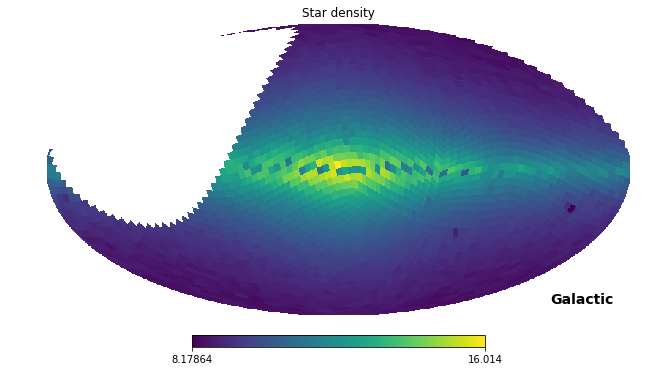

In [69]:
hp.mollview( np.log(starDens), coord=['C', 'G'], title='Star density')

In [36]:
starmap = load_starmap(flt='r', mapname='Tri')

tristarDens = []
for pid in pixIds:
    ra, dec = pix2radec(nside=64, ipix=pid)
    den = get_starDensity(ra=ra, dec=dec, starMap=starmap, nest=True)
    tristarDens.append(den)
    print(pid, ra, dec, den)
tristarDens = np.array(tristarDens)
#np.savez('starDens16.npz', starDens=starDens)


load map  TRIstarDensity_r_nside_64.npz
0 45.0 87.07581964294997 0
1 135.0 87.07581964294997 0
2 225.0 87.07581964294997 0
3 315.0 87.07581964294997 0
4 22.5 84.14973293629666 0
5 67.5 84.14973293629666 0
6 112.5 84.14973293629666 0
7 157.5 84.14973293629666 0
8 202.5 84.14973293629666 0
9 247.49999999999997 84.14973293629666 0
10 292.5 84.14973293629666 0
11 337.5 84.14973293629666 0
12 14.999999999999998 81.21982231598935 0
13 45.0 81.21982231598935 0
14 75.0 81.21982231598935 0
15 105.0 81.21982231598935 0
16 135.0 81.21982231598935 0
17 165.0 81.21982231598935 0
18 195.0 81.21982231598935 0
19 224.99999999999997 81.21982231598935 0
20 255.00000000000003 81.21982231598935 0
21 285.0 81.21982231598935 0
22 315.0 81.21982231598935 0
23 344.99999999999994 81.21982231598935 0
24 11.25 78.28414760510762 0
25 33.75 78.28414760510762 0
26 56.25 78.28414760510762 0
27 78.75 78.28414760510762 0
28 101.25 78.28414760510762 0
29 123.74999999999999 78.28414760510762 0
30 146.25 78.2841476051076

239 159.54545454545453 57.39952353962295 0
240 167.72727272727272 57.39952353962295 0
241 175.9090909090909 57.39952353962295 0
242 184.0909090909091 57.39952353962295 0
243 192.27272727272728 57.39952353962295 0
244 200.45454545454544 57.39952353962295 0
245 208.63636363636363 57.39952353962295 0
246 216.8181818181818 57.39952353962295 0
247 225.00000000000003 57.39952353962295 9485
248 233.1818181818182 57.39952353962295 9954
249 241.36363636363635 57.39952353962295 10203
250 249.54545454545453 57.39952353962295 10220
251 257.72727272727275 57.39952353962295 11090
252 265.9090909090909 57.39952353962295 11653
253 274.09090909090907 57.39952353962295 11896
254 282.2727272727273 57.39952353962295 12611
255 290.45454545454544 57.39952353962295 12984
256 298.6363636363636 57.39952353962295 13738
257 306.8181818181818 57.39952353962295 14539
258 315.0 57.39952353962295 14894
259 323.1818181818182 57.39952353962295 15513
260 331.3636363636364 57.39952353962295 16267
261 339.54545454545456 

441 129.0 44.993880150457116 0
442 135.0 44.993880150457116 0
443 141.0 44.993880150457116 0
444 147.0 44.993880150457116 0
445 153.0 44.993880150457116 0
446 159.0 44.993880150457116 0
447 165.00000000000003 44.993880150457116 0
448 171.0 44.993880150457116 0
449 177.0 44.993880150457116 0
450 183.0 44.993880150457116 0
451 189.0 44.993880150457116 0
452 194.99999999999997 44.993880150457116 0
453 201.0 44.993880150457116 0
454 207.0 44.993880150457116 10748
455 213.0 44.993880150457116 11392
456 219.0 44.993880150457116 11277
457 225.0 44.993880150457116 11703
458 230.99999999999997 44.993880150457116 11936
459 237.00000000000003 44.993880150457116 12309
460 243.0 44.993880150457116 12459
461 249.00000000000003 44.993880150457116 12995
462 255.00000000000003 44.993880150457116 13601
463 261.0 44.993880150457116 14388
464 267.00000000000006 44.993880150457116 14611
465 273.0 44.993880150457116 15639
466 279.0 44.993880150457116 16784
467 285.00000000000006 44.993880150457116 17052
468

661 300.9375 35.68533471265204 27753
662 306.56249999999994 35.68533471265204 28556
663 312.18749999999994 35.68533471265204 31393
664 317.81249999999994 35.68533471265204 33710
665 323.4375 35.68533471265204 36256
666 329.0625 35.68533471265204 37502
667 334.6875 35.68533471265204 39549
668 340.3125 35.68533471265204 41077
669 345.9375 35.68533471265204 41181
670 351.5625 35.68533471265204 41110
671 357.18749999999994 35.68533471265204 42785
672 0.0 32.79716829582364 47138
673 5.625 32.79716829582364 48092
674 11.25 32.79716829582364 52358
675 16.875 32.79716829582364 52670
676 22.5 32.79716829582364 0
677 28.124999999999996 32.79716829582364 0
678 33.75 32.79716829582364 0
679 39.375 32.79716829582364 0
680 45.0 32.79716829582364 0
681 50.62499999999999 32.79716829582364 0
682 56.24999999999999 32.79716829582364 0
683 61.87499999999999 32.79716829582364 0
684 67.5 32.79716829582364 0
685 73.125 32.79716829582364 0
686 78.75 32.79716829582364 0
687 84.37499999999999 32.79716829582364 

875 64.6875 24.624318352164074 0
876 70.31249999999999 24.624318352164074 0
877 75.9375 24.624318352164074 0
878 81.56249999999999 24.624318352164074 0
879 87.18749999999999 24.624318352164074 0
880 92.8125 24.624318352164074 0
881 98.4375 24.624318352164074 0
882 104.0625 24.624318352164074 0
883 109.6875 24.624318352164074 0
884 115.31249999999997 24.624318352164074 0
885 120.9375 24.624318352164074 0
886 126.5625 24.624318352164074 0
887 132.1875 24.624318352164074 0
888 137.8125 24.624318352164074 0
889 143.43749999999997 24.624318352164074 0
890 149.0625 24.624318352164074 0
891 154.6875 24.624318352164074 0
892 160.3125 24.624318352164074 0
893 165.9375 24.624318352164074 0
894 171.56249999999997 24.624318352164074 0
895 177.1875 24.624318352164074 0
896 182.8125 24.624318352164074 0
897 188.4375 24.624318352164074 18687
898 194.06249999999997 24.624318352164074 19178
899 199.68749999999997 24.624318352164074 19210
900 205.31249999999997 24.624318352164074 19780
901 210.9375 24.6

1087 174.37499999999997 16.95776330000414 0
1088 180.0 16.95776330000414 0
1089 185.625 16.95776330000414 28171
1090 191.25 16.95776330000414 28806
1091 196.875 16.95776330000414 29434
1092 202.49999999999997 16.95776330000414 30069
1093 208.125 16.95776330000414 31422
1094 213.75 16.95776330000414 32893
1095 219.375 16.95776330000414 33671
1096 224.99999999999997 16.95776330000414 34353
1097 230.62499999999994 16.95776330000414 35422
1098 236.25 16.95776330000414 37622
1099 241.875 16.95776330000414 39054
1100 247.49999999999997 16.95776330000414 38712
1101 253.125 16.95776330000414 42486
1102 258.75 16.95776330000414 44735
1103 264.375 16.95776330000414 49565
1104 270.0 16.95776330000414 53254
1105 275.625 16.95776330000414 61225
1106 281.24999999999994 16.95776330000414 61994
1107 286.87499999999994 16.95776330000414 68608
1108 292.5 16.95776330000414 72139
1109 298.125 16.95776330000414 84441
1110 303.75 16.95776330000414 93944
1111 309.375 16.95776330000414 103817
1112 315.0 16.95

1293 255.93749999999994 9.59406822686046 86111
1294 261.56249999999994 9.59406822686046 95913
1295 267.1875 9.59406822686046 95880
1296 272.8125 9.59406822686046 126985
1297 278.4375 9.59406822686046 134707
1298 284.0625 9.59406822686046 139130
1299 289.6875 9.59406822686046 166698
1300 295.3125 9.59406822686046 192620
1301 300.9375 9.59406822686046 206692
1302 306.56249999999994 9.59406822686046 181655
1303 312.18749999999994 9.59406822686046 219836
1304 317.81249999999994 9.59406822686046 290340
1305 323.4375 9.59406822686046 346425
1306 329.0625 9.59406822686046 380660
1307 334.6875 9.59406822686046 400207
1308 340.3125 9.59406822686046 237646
1309 345.9375 9.59406822686046 509714
1310 351.5625 9.59406822686046 691383
1311 357.18749999999994 9.59406822686046 796296
1312 0.0 7.180755781458272 2304312
1313 5.625 7.180755781458272 1995948
1314 11.25 7.180755781458272 1420051
1315 16.875 7.180755781458272 768342
1316 22.5 7.180755781458272 424404
1317 28.124999999999996 7.18075578145827

1499 331.875 2.3880154632687733 222340
1500 337.49999999999994 2.3880154632687733 1489024
1501 343.12499999999994 2.3880154632687733 2243795
1502 348.74999999999994 2.3880154632687733 3732470
1503 354.375 2.3880154632687733 3190761
1504 2.8125 0.0 16900280
1505 8.4375 0.0 7011369
1506 14.062499999999998 0.0 3498434
1507 19.6875 0.0 2922246
1508 25.312499999999996 0.0 2214045
1509 30.937499999999996 0.0 2089291
1510 36.5625 0.0 1734723
1511 42.18749999999999 0.0 1998710
1512 47.8125 0.0 2284796
1513 53.4375 0.0 2649013
1514 59.0625 0.0 2118071
1515 64.6875 0.0 2355431
1516 70.31249999999999 0.0 1711402
1517 75.9375 0.0 0
1518 81.56249999999999 0.0 0
1519 87.18749999999999 0.0 0
1520 92.8125 0.0 0
1521 98.4375 0.0 0
1522 104.0625 0.0 0
1523 109.6875 0.0 0
1524 115.31249999999997 0.0 0
1525 120.9375 0.0 0
1526 126.5625 0.0 0
1527 132.1875 0.0 0
1528 137.8125 0.0 0
1529 143.43749999999997 0.0 0
1530 149.0625 0.0 0
1531 154.6875 0.0 0
1532 160.3125 0.0 0
1533 165.9375 0.0 0
1534 171.5624999

1719 129.375 -7.180755781458284 0
1720 135.0 -7.180755781458284 0
1721 140.62499999999997 -7.180755781458284 0
1722 146.25 -7.180755781458284 0
1723 151.875 -7.180755781458284 0
1724 157.5 -7.180755781458284 0
1725 163.12499999999997 -7.180755781458284 0
1726 168.74999999999997 -7.180755781458284 49142
1727 174.37499999999997 -7.180755781458284 57057
1728 180.0 -7.180755781458284 48514
1729 185.625 -7.180755781458284 68377
1730 191.25 -7.180755781458284 67037
1731 196.875 -7.180755781458284 67425
1732 202.49999999999997 -7.180755781458284 69232
1733 208.125 -7.180755781458284 69900
1734 213.75 -7.180755781458284 79342
1735 219.375 -7.180755781458284 70902
1736 224.99999999999997 -7.180755781458284 79560
1737 230.62499999999994 -7.180755781458284 90340
1738 236.25 -7.180755781458284 108448
1739 241.875 -7.180755781458284 122164
1740 247.49999999999997 -7.180755781458284 113364
1741 253.125 -7.180755781458284 103583
1742 258.75 -7.180755781458284 142920
1743 264.375 -7.180755781458284 11

1921 188.4375 -14.477512185929934 30062
1922 194.06249999999997 -14.477512185929934 28908
1923 199.68749999999997 -14.477512185929934 31872
1924 205.31249999999997 -14.477512185929934 12074
1925 210.9375 -14.477512185929934 28861
1926 216.5625 -14.477512185929934 32738
1927 222.1875 -14.477512185929934 40292
1928 227.8125 -14.477512185929934 44190
1929 233.43750000000003 -14.477512185929934 49072
1930 239.0625 -14.477512185929934 50248
1931 244.68749999999997 -14.477512185929934 47510
1932 250.31249999999997 -14.477512185929934 53921
1933 255.93749999999994 -14.477512185929934 57985
1934 261.56249999999994 -14.477512185929934 57304
1935 267.1875 -14.477512185929934 64202
1936 272.8125 -14.477512185929934 70236
1937 278.4375 -14.477512185929934 80128
1938 284.0625 -14.477512185929934 94422
1939 289.6875 -14.477512185929934 96409
1940 295.3125 -14.477512185929934 103954
1941 300.9375 -14.477512185929934 99792
1942 306.56249999999994 -14.477512185929934 124462
1943 312.18749999999994 -14.

2121 230.62499999999994 -22.024312837042167 27663
2122 236.25 -22.024312837042167 29180
2123 241.875 -22.024312837042167 30780
2124 247.49999999999997 -22.024312837042167 31389
2125 253.125 -22.024312837042167 33827
2126 258.75 -22.024312837042167 35942
2127 264.375 -22.024312837042167 36757
2128 270.0 -22.024312837042167 38862
2129 275.625 -22.024312837042167 42831
2130 281.24999999999994 -22.024312837042167 41212
2131 286.87499999999994 -22.024312837042167 39673
2132 292.5 -22.024312837042167 55366
2133 298.125 -22.024312837042167 56816
2134 303.75 -22.024312837042167 59044
2135 309.375 -22.024312837042167 68892
2136 315.0 -22.024312837042167 74034
2137 320.625 -22.024312837042167 90732
2138 326.24999999999994 -22.024312837042167 93491
2139 331.875 -22.024312837042167 100464
2140 337.49999999999994 -22.024312837042167 120828
2141 343.12499999999994 -22.024312837042167 132534
2142 348.74999999999994 -22.024312837042167 137893
2143 354.375 -22.024312837042167 140339
2144 2.8125 -24.624

2319 267.1875 -30.000000000000018 25097
2320 272.8125 -30.000000000000018 27653
2321 278.4375 -30.000000000000018 2365147
2322 284.0625 -30.000000000000018 29828
2323 289.6875 -30.000000000000018 31284
2324 295.3125 -30.000000000000018 33516
2325 300.9375 -30.000000000000018 37023
2326 306.56249999999994 -30.000000000000018 39086
2327 312.18749999999994 -30.000000000000018 39258
2328 317.81249999999994 -30.000000000000018 47333
2329 323.4375 -30.000000000000018 52960
2330 329.0625 -30.000000000000018 56491
2331 334.6875 -30.000000000000018 62180
2332 340.3125 -30.000000000000018 66908
2333 345.9375 -30.000000000000018 69622
2334 351.5625 -30.000000000000018 71512
2335 357.18749999999994 -30.000000000000018 71020
2336 0.0 -32.79716829582364 61623
2337 5.625 -32.79716829582364 60201
2338 11.25 -32.79716829582364 56482
2339 16.875 -32.79716829582364 56063
2340 22.5 -32.79716829582364 53695
2341 28.124999999999996 -32.79716829582364 49485
2342 33.75 -32.79716829582364 46927
2343 39.375 -32

2523 331.875 -38.68218745348945 36708
2524 337.49999999999994 -38.68218745348945 36665
2525 343.12499999999994 -38.68218745348945 39586
2526 348.74999999999994 -38.68218745348945 40750
2527 354.375 -38.68218745348945 41988
2528 2.8125 -41.81031489577861 33549
2529 8.4375 -41.81031489577861 31020
2530 14.062499999999998 -41.81031489577861 30729
2531 19.6875 -41.81031489577861 30946
2532 25.312499999999996 -41.81031489577861 30171
2533 30.937499999999996 -41.81031489577861 29405
2534 36.5625 -41.81031489577861 27736
2535 42.18749999999999 -41.81031489577861 26360
2536 47.8125 -41.81031489577861 25322
2537 53.4375 -41.81031489577861 23685
2538 59.0625 -41.81031489577861 22787
2539 64.6875 -41.81031489577861 21322
2540 70.31249999999999 -41.81031489577861 0
2541 75.9375 -41.81031489577861 0
2542 81.56249999999999 -41.81031489577861 0
2543 87.18749999999999 -41.81031489577861 0
2544 92.8125 -41.81031489577861 0
2545 98.4375 -41.81031489577861 0
2546 104.0625 -41.81031489577861 0
2547 109.68

2717 65.76923076923076 -51.2558069488049 16476
2718 72.6923076923077 -51.2558069488049 15053
2719 79.61538461538461 -51.2558069488049 14169
2720 86.53846153846155 -51.2558069488049 13501
2721 93.46153846153845 -51.2558069488049 12479
2722 100.38461538461539 -51.2558069488049 12352
2723 107.3076923076923 -51.2558069488049 11450
2724 114.23076923076924 -51.2558069488049 11210
2725 121.15384615384615 -51.2558069488049 10900
2726 128.0769230769231 -51.2558069488049 10904
2727 135.0 -51.2558069488049 10510
2728 141.9230769230769 -51.2558069488049 10107
2729 148.84615384615384 -51.2558069488049 10072
2730 155.76923076923077 -51.2558069488049 9724
2731 162.6923076923077 -51.2558069488049 9847
2732 169.6153846153846 -51.2558069488049 9780
2733 176.53846153846152 -51.2558069488049 9535
2734 183.46153846153848 -51.2558069488049 9593
2735 190.3846153846154 -51.2558069488049 9465
2736 197.3076923076923 -51.2558069488049 9362
2737 204.23076923076923 -51.2558069488049 9555
2738 211.15384615384616 -5

2911 194.99999999999997 -63.44828368030105 9005
2912 204.99999999999997 -63.44828368030105 8952
2913 214.99999999999997 -63.44828368030105 9319
2914 225.0 -63.44828368030105 9621
2915 235.00000000000003 -63.44828368030105 9778
2916 244.99999999999997 -63.44828368030105 10233
2917 255.00000000000003 -63.44828368030105 10536
2918 265.0 -63.44828368030105 11130
2919 275.0 -63.44828368030105 11574
2920 285.0 -63.44828368030105 12207
2921 294.99999999999994 -63.44828368030105 12573
2922 305.0 -63.44828368030105 13693
2923 315.0 -63.44828368030105 14072
2924 325.0 -63.44828368030105 14701
2925 335.0 -63.44828368030105 15053
2926 345.0 -63.44828368030105 15770
2927 355.0 -63.44828368030105 15433
2928 5.625 -66.44353569089876 14559
2929 16.875 -66.44353569089876 14409
2930 28.125 -66.44353569089876 13669
2931 39.375 -66.44353569089876 13286
2932 50.625 -66.44353569089876 12709
2933 61.87499999999999 -66.44353569089876 12138
2934 73.125 -66.44353569089876 11697
2935 84.375 -66.44353569089876 10

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


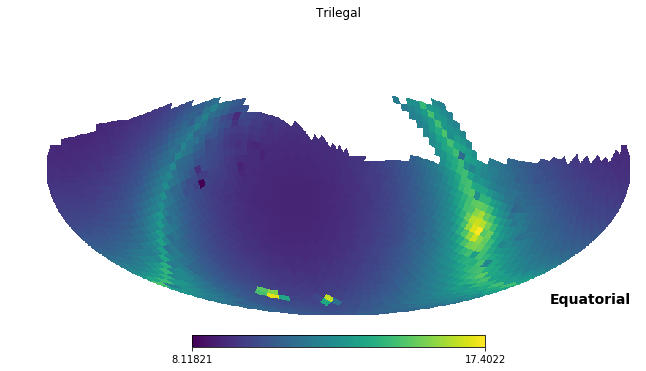

In [84]:
hp.mollview( np.log(tristarDens), coord=['G', 'C'], title='Trilegal' )

In [87]:
def get_dens(df): 
    dens = get_starDensity(ra=df['fieldGl'], dec=df['fieldGb'], starMap=starmap, mag=25, nest=True)
    if df['pixId']%100 == 0:
        print(df['pixId'])
    return dens



In [100]:
starmap = load_starmap(flt='r', mapname='Tri')



load map  TRIstarDensity_r_nside_64.npz


In [105]:
Fields['starDensity_r25'] = starDens
Fields['TRIstarDensity_r25'] = Fields.apply(get_dens, axis=1)

Fields.to_csv("Fields_nside{}.csv".format(nside), index=False)


0.0
100.0
200.0
300.0
400.0
500.0
600.0
700.0
800.0
900.0
1000.0
1100.0
1200.0
1300.0
1400.0
1500.0
1600.0
1700.0
1800.0
1900.0
2000.0
2100.0
2200.0
2300.0
2400.0
2500.0
2600.0
2700.0
2800.0
2900.0
3000.0
3100.0
3200.0
3300.0
3400.0
3500.0
3600.0
3700.0
3800.0
3900.0
4000.0
4100.0
4200.0
4300.0
4400.0
4500.0
4600.0
4700.0
4800.0
4900.0
5000.0
5100.0
5200.0
5300.0
5400.0
5500.0
5600.0
5700.0
5800.0
5900.0
6000.0
6100.0
6200.0
6300.0
6400.0
6500.0
6600.0
6700.0
6800.0
6900.0
7000.0
7100.0
7200.0
7300.0
7400.0
7500.0
7600.0
7700.0
7800.0
7900.0
8000.0
8100.0
8200.0
8300.0
8400.0
8500.0
8600.0
8700.0
8800.0
8900.0
9000.0
9100.0
9200.0
9300.0
9400.0
9500.0
9600.0
9700.0
9800.0
9900.0
10000.0
10100.0
10200.0
10300.0
10400.0
10500.0
10600.0
10700.0
10800.0
10900.0
11000.0
11100.0
11200.0
11300.0
11400.0
11500.0
11600.0
11700.0
11800.0
11900.0
12000.0
12100.0
12200.0
12300.0
12400.0
12500.0
12600.0
12700.0
12800.0
12900.0
13000.0
13100.0
13200.0
13300.0
13400.0
13500.0
13600.0
13700.0
13800.0


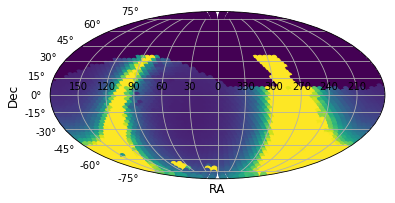

In [95]:
df = Fields
fig, ax = plt.subplots(1, 1, figsize=(6, 6),
                            subplot_kw={'projection': 'mollweide'}); 
#slicer = ( df['inpoly'] == False )
#df = df[slicer]
x = df['fieldRa']
y = df['fieldDec']
c = df['TRIstarDensity_r25']
plot_mwd(ax, x, y, c, title='', colorbar=False, vmax=100000) 

### utils

In [35]:
import os
import healpy as hp
from lsst.utils import getPackageDir
from scipy.interpolate import interp1d
from lsst.sims.maf.utils import radec2pix

def load_starmap(flt='r', mapname='star', nside=64):
    """mapname: 'Tri', 'dust', 'wdstar' """
    # get mapdir '/home/idies/lsst/stack/miniconda3-4.7.10-4d7b902/Linux64/sims_maps/2017.05.08-4-gac432e6/StarMaps'
    sim_map = getPackageDir('sims_maps')
    
    
    if 'Tri' in mapname:
        mapDir = os.path.join(sim_map,'TriMaps') 
        mapfile = 'TRIstarDensity_{}_nside_{}.npz'.format(flt, nside)
    elif 'dust' in mapname:
        # not work for dust map
        mapDir = os.path.join(sim_map,'DustMaps') 
        mapfile = 'dust_nside_{}.npz'.format(nside)
    elif 'wd' in mapname:
        mapDir = os.path.join(sim_map,'StarMaps') 
        mapfile = 'starDensity_{}_wdstars_nside_{}.npz'.format(flt, nside)
    else:
        mapDir = os.path.join(sim_map,'StarMaps') 
        mapfile = 'starDensity_{}_nside_{}.npz'.format(flt, nside)

    starMap = np.load( os.path.join(mapDir, mapfile) )
    print('load map ', mapfile)
    
    return starMap
      
def get_starDensity(ra=0, dec=0, starMap=None, nest=False, mag=25):
    '''get star density of a field, from star density map,
    input ra, dec in degree 
    returns stars / (sq degree)
    '''
    ra = ra * np.pi / 180   # convert to radian
    dec = dec * np.pi / 180

    starMapDensity = starMap['starDensity'].copy()
    starMapBins = starMap['bins'].copy()
    starmapNside = hp.npix2nside( np.size(starMapDensity[:,0]) )
    
    lat = np.pi/2. - dec
    ipix = hp.ang2pix(starmapNside, lat, ra, nest=nest)
    #ipix = radec2pix(starmapNside, ra, dec) # convert from ra/dec to ipix 
    density = interp1d( starMapBins[1:], starMapDensity[ipix, :] ) (mag)
    return int( density )



In [19]:
def plot_mwd(ax, RA, Dec, c, org=0, title='Mollweide projection', projection='mollweide', vmin=None, vmax=None, colorbar=True):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': 'mollweide'}); 
        plot_mwd(ax, x, y, c, title='') 
    '''
    if vmax is None:
        vmax = c.max()
    if vmin is None:
        vmin = c.min()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, marker='o', vmin=vmin, vmax=vmax)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
    #cbar.set_clim(-2.0, 2.0)
# coordinates transform
def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    # default ring, use hp.ring2nest to convert
    theta, phi = hp.pix2ang(nside, ipix) 
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec

def radec2ecliptic(ra, dec):
    '''convert from ra/dec to galactic l/b'''
    from astropy.coordinates import GeocentricTrueEcliptic
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(ra=ra, dec=dec, 
                 unit=(u.degree, u.degree))
    
    lon = c.transform_to(GeocentricTrueEcliptic()).lon.degree
    lat = c.transform_to(GeocentricTrueEcliptic()).lat.degree
    
    return lon, lat

def radec2gal(ra, dec):
    '''convert from ra/dec to galactic l/b'''
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(ra=ra, dec=dec, 
                 unit=(u.degree, u.degree))
    
    l = c.galactic.l.degree
    b = c.galactic.b.degree
    return l, b

def gal2radec(gl, gb):
    '''convert gl/gb to ra/dec'''
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(l=gl, b=gb, frame="galactic",
                unit=(u.degree, u.degree))
    ra = c.icrs.ra.degree
    dec = c.icrs.dec.degree
    return ra, dec

# redefined RADec2pix, default in degree 
def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid
